In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
from sklearn.model_selection import GridSearchCV, cross_val_score

In [2]:
df = pd.read_csv("weekly_consumption.csv")

In [ ]:
# Dictionary to store models for each EAN
models = {}
rmse_values = {}  # Dictionary to store RMSE per EAN

# Train a model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Store model
    models[ean] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    rmse_values[ean] = rmse
    
    print(f"EAN {ean} - RMSE: {rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1.0 - RMSE: 0.0011
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1013544381015.0 - RMSE: 0.7859
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5560


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1019421978364.0 - RMSE: 0.0006
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1024008213369.0 - RMSE: 0.0017
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1037601770462.0 - RMSE: 0.0016
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1042777655048.0 - RMSE: 0.0011
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1048540093755.0 - RMSE: 0.0012
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 105685965293.0 - RMSE: 0.0012
EAN 105685965293.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1062816480982.0 - RMSE: 0.0005
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1067813910580.0 - RMSE: 0.0039
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075583423021.0 - RMSE: 0.0012
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075822791015.0 - RMSE: 0.0140
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0673


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884521517615.0 - RMSE: 0.1764
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884524001043.0 - RMSE: 0.0807
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0906


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1162050286616.0 - RMSE: 0.0011
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 118057573160.0 - RMSE: 0.0065
EAN 118057573160.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1180575731602.0 - RMSE: 0.0025
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 120705031062846.0 - RMSE: 0.0005
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_16816\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1240386749345.0 - RMSE: 0.0011
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0045


Week 1 (2025-02-03) forecast for EAN 1013544381015.0: 43
Week 2 (2025-02-10) forecast for EAN 1013544381015.0: 13
Week 3 (2025-02-17) forecast for EAN 1013544381015.0: 36
Week 4 (2025-02-24) forecast for EAN 1013544381015.0: 40


C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\Dell\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


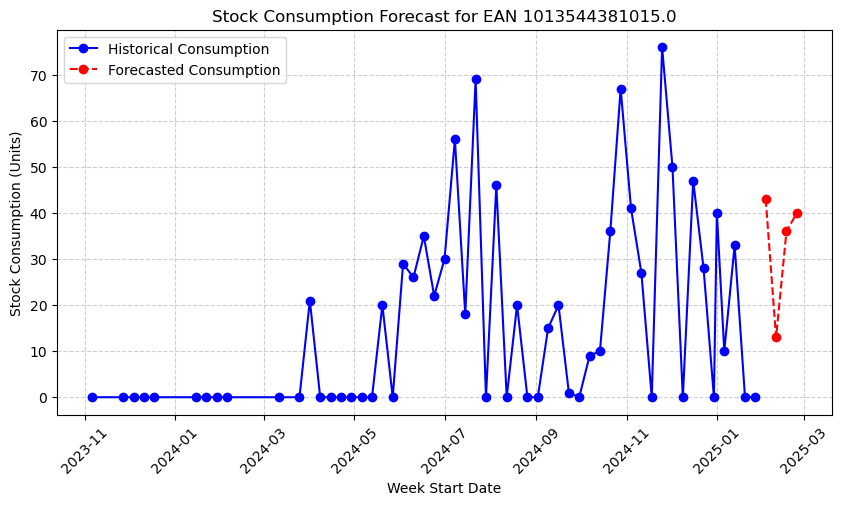

In [5]:
# Load the saved scaler
scaler = joblib.load("scaler.pkl")

# Forecast for a specific EAN
ean = 1013544381015.0 

# Check if the model for this EAN exists
if ean in models:
    model = models[ean]  # Get the pre-trained model for this EAN

    # Filter data for the specific EAN
    ean_data = df[df["EAN"] == ean].copy()

    # Ensure 'Week_Start' is in datetime format
    ean_data["Week_Start"] = pd.to_datetime(ean_data["Week_Start"])

    # Inverse transform past consumption values (if they are scaled)
    past_consumption_scaled = ean_data["Total_Weekly_Consumption"].values.reshape(-1, 1)
    ean_data["Total_Weekly_Consumption"] = scaler.inverse_transform(past_consumption_scaled).flatten()

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Get the last known values for Lag_1 and Lag_2
    last_lag_1 = ean_data["Lag_1"].iloc[-1]
    last_lag_2 = ean_data["Lag_2"].iloc[-1]
    last_week_start = ean_data["Week_Start"].iloc[-1]  # Get last recorded date

    # Create future features for the next 4 weeks
    future_predictions_scaled = []
    future_dates = []  # To store the corresponding future weeks

    for i in range(1, 5):
        # Predict the next week's consumption (scaled)
        future_features = np.array([[last_lag_1, last_lag_2]])
        future_prediction_scaled = model.predict(future_features)[0]
        future_predictions_scaled.append(future_prediction_scaled)

        # Compute next week's start date
        next_week_start = last_week_start + pd.Timedelta(days=7)
        future_dates.append(next_week_start)

        # Update lagged values for the next prediction
        last_lag_2 = last_lag_1
        last_lag_1 = future_prediction_scaled
        last_week_start = next_week_start

    # Inverse transform the predictions to get actual values
    future_predictions = scaler.inverse_transform(
        np.array(future_predictions_scaled).reshape(-1, 1)
    ).flatten()

    # Convert to integer values
    future_predictions = np.round(future_predictions).astype(int)

    # Print the forecasted values
    for i, (date, prediction) in enumerate(zip(future_dates, future_predictions), start=1):
        print(f"Week {i} ({date.date()}) forecast for EAN {ean}: {prediction}")

    # Plot historical and forecasted data
    plt.figure(figsize=(10, 5))

    # Plot past consumption data (already inverse transformed)
    plt.plot(ean_data["Week_Start"], ean_data["Total_Weekly_Consumption"], marker='o', linestyle='-', color='b', label="Historical Consumption")

    # Plot forecasted future consumption data
    plt.plot(future_dates, future_predictions, marker='o', linestyle='--', color='r', label="Forecasted Consumption")

    # Formatting the plot
    plt.xlabel("Week Start Date")
    plt.ylabel("Stock Consumption (Units)")
    plt.title(f"Stock Consumption Forecast for EAN {ean}")
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    
    # Show the plot
    plt.show()

else:
    print(f"No trained model found for EAN {ean}.")


In [6]:
# Convert RMSE values to a NumPy array
rmse_array = np.array(list(rmse_values.values()))
 
# Compute Mean RMSE
mean_rmse = np.mean(rmse_array)
print(f"Mean RMSE: {mean_rmse:.4f}")

# Compute Median RMSE
median_rmse = np.median(rmse_array)
print(f"Median RMSE: {median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
min_rmse = np.min(rmse_array)
max_rmse = np.max(rmse_array)

print(f"Best EAN (lowest RMSE): {min_rmse:.4f}")
print(f"Worst EAN (highest RMSE): {max_rmse:.4f}")

Mean RMSE: 0.0506
Median RMSE: 0.0073
Best EAN (lowest RMSE): 0.0000
Worst EAN (highest RMSE): 9.2696


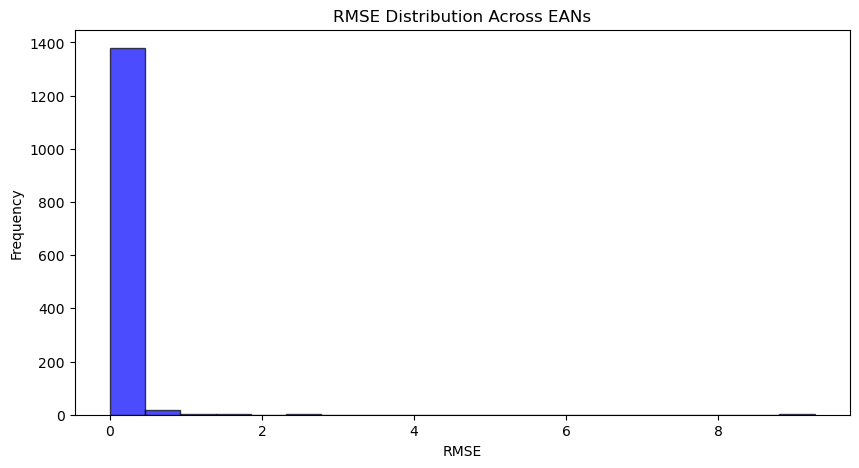

In [7]:
plt.figure(figsize=(10, 5))
plt.hist(rmse_array, bins=20, alpha=0.7, color='blue', edgecolor='black')
plt.xlabel("RMSE")
plt.ylabel("Frequency")
plt.title("RMSE Distribution Across EANs")
plt.show()

### Quick Conclusion on Random Forest Model

In [8]:
# Save the Random Forest models
joblib.dump(models, "random_forest_models.pkl")

# Save the RMSE values
joblib.dump(rmse_values, "random_forest_rmse_values.pkl")

['random_forest_rmse_values.pkl']

### Adding cross validation & Improve perfomance

In [4]:
# Dictionary to store models for each EAN
models = {}
rmse_values = {}  # Dictionary to store RMSE per EAN
cv_rmse_values = {}  # Dictionary to store cross-validation RMSE per EAN

# Train a model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Store model
    models[ean] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    rmse_values[ean] = rmse
    
    # Perform cross-validation to evaluate the model's generalization
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())  # Convert to RMSE

    # Store cross-validation RMSE for this EAN
    cv_rmse_values[ean] = cv_rmse

    print(f"EAN {ean} - RMSE: {rmse:.4f}")
    print(f"EAN {ean} - Cross-Validation RMSE: {cv_rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1.0 - RMSE: 0.0011
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1013544381015.0 - RMSE: 0.7859
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5560


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1019421978364.0 - RMSE: 0.0006
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1024008213369.0 - RMSE: 0.0017
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1037601770462.0 - RMSE: 0.0016
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1042777655048.0 - RMSE: 0.0011
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1048540093755.0 - RMSE: 0.0012
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 105685965293.0 - RMSE: 0.0012
EAN 105685965293.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1062816480982.0 - RMSE: 0.0005
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1067813910580.0 - RMSE: 0.0039
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075583423021.0 - RMSE: 0.0012
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1075822791015.0 - RMSE: 0.0140
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0673


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884521517615.0 - RMSE: 0.1764
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 10884524001043.0 - RMSE: 0.0807
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0906


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1162050286616.0 - RMSE: 0.0011
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 118057573160.0 - RMSE: 0.0065
EAN 118057573160.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1180575731602.0 - RMSE: 0.0025
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 120705031062846.0 - RMSE: 0.0005
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1240386749345.0 - RMSE: 0.0011
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1277815980024.0 - RMSE: 0.0006
EAN 1277815980024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1278912292463.0 - RMSE: 0.0011
EAN 1278912292463.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1284383292626.0 - RMSE: 0.0013
EAN 1284383292626.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1308327941400.0 - RMSE: 0.0055
EAN 1308327941400.0 - Cross-Validation RMSE: 0.0629


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 13661522031237.0 - RMSE: 0.0013
EAN 13661522031237.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1373933301655.0 - RMSE: 0.0007
EAN 1373933301655.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1383480568724.0 - RMSE: 0.0087
EAN 1383480568724.0 - Cross-Validation RMSE: 0.0992


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 14026704196156.0 - RMSE: 0.0013
EAN 14026704196156.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1412759868947.0 - RMSE: 0.0041
EAN 1412759868947.0 - Cross-Validation RMSE: 0.0672


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1450516242969.0 - RMSE: 0.0162
EAN 1450516242969.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1464489984489.0 - RMSE: 0.0016
EAN 1464489984489.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1464675065289.0 - RMSE: 0.0048
EAN 1464675065289.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1470194808801.0 - RMSE: 0.0006
EAN 1470194808801.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1497123284245.0 - RMSE: 0.0006
EAN 1497123284245.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631070.0 - RMSE: 0.0609
EAN 15060179631070.0 - Cross-Validation RMSE: 0.0323


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631087.0 - RMSE: 0.0622
EAN 15060179631087.0 - Cross-Validation RMSE: 0.0325


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631094.0 - RMSE: 0.0475
EAN 15060179631094.0 - Cross-Validation RMSE: 0.0297


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631100.0 - RMSE: 0.0474
EAN 15060179631100.0 - Cross-Validation RMSE: 0.0305


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631117.0 - RMSE: 0.0313
EAN 15060179631117.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631124.0 - RMSE: 0.0243
EAN 15060179631124.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631131.0 - RMSE: 0.0320
EAN 15060179631131.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631148.0 - RMSE: 0.0463
EAN 15060179631148.0 - Cross-Validation RMSE: 0.0304


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631162.0 - RMSE: 0.0401
EAN 15060179631162.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179631186.0 - RMSE: 0.0515
EAN 15060179631186.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179633036.0 - RMSE: 0.0585
EAN 15060179633036.0 - Cross-Validation RMSE: 0.0410


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 15060179633043.0 - RMSE: 0.1001
EAN 15060179633043.0 - Cross-Validation RMSE: 0.0593


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1507939511661.0 - RMSE: 0.0012
EAN 1507939511661.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1510782023292.0 - RMSE: 0.0030
EAN 1510782023292.0 - Cross-Validation RMSE: 0.0510


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1531499223651.0 - RMSE: 0.0047
EAN 1531499223651.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1542326273160.0 - RMSE: 0.0010
EAN 1542326273160.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1546615419003.0 - RMSE: 0.0049
EAN 1546615419003.0 - Cross-Validation RMSE: 0.0177


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1589831494629.0 - RMSE: 0.0014
EAN 1589831494629.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1596260919879.0 - RMSE: 0.0052
EAN 1596260919879.0 - Cross-Validation RMSE: 0.0246


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1598140353749.0 - RMSE: 0.0005
EAN 1598140353749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1609748113961.0 - RMSE: 0.5265
EAN 1609748113961.0 - Cross-Validation RMSE: 1.8981


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1639645577800.0 - RMSE: 0.0088
EAN 1639645577800.0 - Cross-Validation RMSE: 0.1341


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1688332222694.0 - RMSE: 0.0031
EAN 1688332222694.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1688646685289.0 - RMSE: 0.0020
EAN 1688646685289.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1712335957988.0 - RMSE: 0.1052
EAN 1712335957988.0 - Cross-Validation RMSE: 0.6585


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1718200620073.0 - RMSE: 0.0018
EAN 1718200620073.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1738185596114.0 - RMSE: 0.0367
EAN 1738185596114.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 175567822234.0 - RMSE: 0.0027
EAN 175567822234.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1755678222341.0 - RMSE: 0.0066
EAN 1755678222341.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1761479344353.0 - RMSE: 0.0006
EAN 1761479344353.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1767499572952.0 - RMSE: 0.0014
EAN 1767499572952.0 - Cross-Validation RMSE: 0.0482


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1771027390060.0 - RMSE: 0.0006
EAN 1771027390060.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1780331720899.0 - RMSE: 0.0005
EAN 1780331720899.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1800607202019.0 - RMSE: 0.0842
EAN 1800607202019.0 - Cross-Validation RMSE: 0.2344


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1803681209421.0 - RMSE: 0.0019
EAN 1803681209421.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1813728385993.0 - RMSE: 0.0011
EAN 1813728385993.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1832848366992.0 - RMSE: 0.0071
EAN 1832848366992.0 - Cross-Validation RMSE: 0.1166


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1855444883471.0 - RMSE: 0.0024
EAN 1855444883471.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1873020083400.0 - RMSE: 0.0006
EAN 1873020083400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1897429578232.0 - RMSE: 0.5042
EAN 1897429578232.0 - Cross-Validation RMSE: 0.5209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1909219356360.0 - RMSE: 0.0026
EAN 1909219356360.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1915860909735.0 - RMSE: 0.0088
EAN 1915860909735.0 - Cross-Validation RMSE: 0.1600


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1922560030028.0 - RMSE: 0.0019
EAN 1922560030028.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1933851131207.0 - RMSE: 0.0006
EAN 1933851131207.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1943002619665.0 - RMSE: 0.0006
EAN 1943002619665.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1948160534256.0 - RMSE: 0.0173
EAN 1948160534256.0 - Cross-Validation RMSE: 0.0879


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 1982573136792.0 - RMSE: 0.0005
EAN 1982573136792.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2015475403957.0 - RMSE: 0.0037
EAN 2015475403957.0 - Cross-Validation RMSE: 0.0539


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2016298661814.0 - RMSE: 0.0051
EAN 2016298661814.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2057926715649.0 - RMSE: 0.0011
EAN 2057926715649.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 20705031062846.0 - RMSE: 0.0171
EAN 20705031062846.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2100071898239.0 - RMSE: 0.0110
EAN 2100071898239.0 - Cross-Validation RMSE: 0.0491


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2104743992026.0 - RMSE: 0.0253
EAN 2104743992026.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2120360805884.0 - RMSE: 0.0123
EAN 2120360805884.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2123423898713.0 - RMSE: 0.0006
EAN 2123423898713.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 21348801.0 - RMSE: 0.1092
EAN 21348801.0 - Cross-Validation RMSE: 0.0670


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2135291832239.0 - RMSE: 0.0229
EAN 2135291832239.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215010.0 - RMSE: 0.0222
EAN 215010.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215030.0 - RMSE: 0.0147
EAN 215030.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 215050.0 - RMSE: 0.0154
EAN 215050.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2170932740099.0 - RMSE: 0.0041
EAN 2170932740099.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2190959690786.0 - RMSE: 0.0022
EAN 2190959690786.0 - Cross-Validation RMSE: 0.0601


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 21909596907862.0 - RMSE: 0.0012
EAN 21909596907862.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2194804352794.0 - RMSE: 0.0067
EAN 2194804352794.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2205180031087.0 - RMSE: 0.0006
EAN 2205180031087.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2230755547328.0 - RMSE: 0.0049
EAN 2230755547328.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2249239599551.0 - RMSE: 0.0131
EAN 2249239599551.0 - Cross-Validation RMSE: 0.0623


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2257004538693.0 - RMSE: 0.0005
EAN 2257004538693.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2279203890392.0 - RMSE: 0.0032
EAN 2279203890392.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 23010817.0 - RMSE: 0.0024
EAN 23010817.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 23013617.0 - RMSE: 0.0005
EAN 23013617.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2345698653587.0 - RMSE: 0.0030
EAN 2345698653587.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2351360560010.0 - RMSE: 0.0005
EAN 2351360560010.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2374587069991.0 - RMSE: 0.0096
EAN 2374587069991.0 - Cross-Validation RMSE: 0.1539


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2398759984045.0 - RMSE: 0.0832
EAN 2398759984045.0 - Cross-Validation RMSE: 0.1240


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2414340286503.0 - RMSE: 0.0012
EAN 2414340286503.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2420420509598.0 - RMSE: 0.0140
EAN 2420420509598.0 - Cross-Validation RMSE: 0.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2422238865434.0 - RMSE: 0.0027
EAN 2422238865434.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2468949508711.0 - RMSE: 0.0102
EAN 2468949508711.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2476057820077.0 - RMSE: 0.0005
EAN 2476057820077.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2509793612199.0 - RMSE: 0.0929
EAN 2509793612199.0 - Cross-Validation RMSE: 5.0722


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2590927262825.0 - RMSE: 0.0018
EAN 2590927262825.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2632325282942.0 - RMSE: 0.0022
EAN 2632325282942.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2637364127826.0 - RMSE: 0.0036
EAN 2637364127826.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2655604760568.0 - RMSE: 0.0479
EAN 2655604760568.0 - Cross-Validation RMSE: 0.1805


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2665843859264.0 - RMSE: 0.0005
EAN 2665843859264.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2713762021156.0 - RMSE: 0.0012
EAN 2713762021156.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2716291861999.0 - RMSE: 0.0006
EAN 2716291861999.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922480.0 - RMSE: 0.0068
EAN 27290115922480.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922503.0 - RMSE: 0.0007
EAN 27290115922503.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 27290115922671.0 - RMSE: 0.0067
EAN 27290115922671.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2730445327374.0 - RMSE: 0.3306
EAN 2730445327374.0 - Cross-Validation RMSE: 1.2466


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2757317910415.0 - RMSE: 0.0005
EAN 2757317910415.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2768878583544.0 - RMSE: 0.0216
EAN 2768878583544.0 - Cross-Validation RMSE: 0.1139


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2769221109805.0 - RMSE: 0.0007
EAN 2769221109805.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2774774050368.0 - RMSE: 0.0089
EAN 2774774050368.0 - Cross-Validation RMSE: 0.0859


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2775651577713.0 - RMSE: 0.0270
EAN 2775651577713.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2779058193006.0 - RMSE: 0.0011
EAN 2779058193006.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2782562241641.0 - RMSE: 0.0017
EAN 2782562241641.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 279293086221.0 - RMSE: 0.0018
EAN 279293086221.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2797828264419.0 - RMSE: 0.0006
EAN 2797828264419.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 28058090002400.0 - RMSE: 0.3629
EAN 28058090002400.0 - Cross-Validation RMSE: 0.3102


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 28058090002554.0 - RMSE: 0.2873
EAN 28058090002554.0 - Cross-Validation RMSE: 0.2128


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2807785812708.0 - RMSE: 0.0011
EAN 2807785812708.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2807933159895.0 - RMSE: 0.0010
EAN 2807933159895.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2813566598125.0 - RMSE: 0.0033
EAN 2813566598125.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2835848657230.0 - RMSE: 0.0060
EAN 2835848657230.0 - Cross-Validation RMSE: 0.1483


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2842773854504.0 - RMSE: 0.0119
EAN 2842773854504.0 - Cross-Validation RMSE: 0.0774


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2856801777388.0 - RMSE: 0.0069
EAN 2856801777388.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2856973590110.0 - RMSE: 0.0005
EAN 2856973590110.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2859256765910.0 - RMSE: 0.0159
EAN 2859256765910.0 - Cross-Validation RMSE: 0.3028


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2894756090239.0 - RMSE: 0.0006
EAN 2894756090239.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2905918145137.0 - RMSE: 0.0959
EAN 2905918145137.0 - Cross-Validation RMSE: 0.1974


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2918720758953.0 - RMSE: 0.0338
EAN 2918720758953.0 - Cross-Validation RMSE: 0.3304


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2952975683126.0 - RMSE: 0.0007
EAN 2952975683126.0 - Cross-Validation RMSE: 0.0680


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 2962705136569.0 - RMSE: 0.0102
EAN 2962705136569.0 - Cross-Validation RMSE: 0.0621


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 299778137097.0 - RMSE: 0.0278
EAN 299778137097.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3000895104585.0 - RMSE: 0.0840
EAN 3000895104585.0 - Cross-Validation RMSE: 0.0712


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3053241502053.0 - RMSE: 0.0025
EAN 3053241502053.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3058895722676.0 - RMSE: 0.0066
EAN 3058895722676.0 - Cross-Validation RMSE: 0.0161


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031040094.0 - RMSE: 0.1884
EAN 30705031040094.0 - Cross-Validation RMSE: 0.0890


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031056989.0 - RMSE: 0.0096
EAN 30705031056989.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031086610.0 - RMSE: 0.3413
EAN 30705031086610.0 - Cross-Validation RMSE: 0.1974


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031098835.0 - RMSE: 0.2513
EAN 30705031098835.0 - Cross-Validation RMSE: 0.1186


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031104253.0 - RMSE: 0.7676
EAN 30705031104253.0 - Cross-Validation RMSE: 0.4685


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031113170.0 - RMSE: 0.3384
EAN 30705031113170.0 - Cross-Validation RMSE: 0.2375


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114207.0 - RMSE: 0.5547
EAN 30705031114207.0 - Cross-Validation RMSE: 0.3649


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114214.0 - RMSE: 0.2458
EAN 30705031114214.0 - Cross-Validation RMSE: 0.1663


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114221.0 - RMSE: 0.0221
EAN 30705031114221.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031114252.0 - RMSE: 0.2513
EAN 30705031114252.0 - Cross-Validation RMSE: 0.1186


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031115488.0 - RMSE: 0.2514
EAN 30705031115488.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031116553.0 - RMSE: 0.0070
EAN 30705031116553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031119400.0 - RMSE: 0.0795
EAN 30705031119400.0 - Cross-Validation RMSE: 0.1205


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031120871.0 - RMSE: 0.0241
EAN 30705031120871.0 - Cross-Validation RMSE: 0.1186


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031120925.0 - RMSE: 0.2512
EAN 30705031120925.0 - Cross-Validation RMSE: 0.1192


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031238941.0 - RMSE: 0.0607
EAN 30705031238941.0 - Cross-Validation RMSE: 0.2128


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031238965.0 - RMSE: 0.4978
EAN 30705031238965.0 - Cross-Validation RMSE: 0.3543


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031239047.0 - RMSE: 0.2513
EAN 30705031239047.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031239191.0 - RMSE: 0.6964
EAN 30705031239191.0 - Cross-Validation RMSE: 0.3920


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 30705031242122.0 - RMSE: 0.0458
EAN 30705031242122.0 - Cross-Validation RMSE: 0.1568


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3071861206784.0 - RMSE: 0.2059
EAN 3071861206784.0 - Cross-Validation RMSE: 1.0689


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 309755102584.0 - RMSE: 0.0396
EAN 309755102584.0 - Cross-Validation RMSE: 0.1468


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3097551025843.0 - RMSE: 0.0022
EAN 3097551025843.0 - Cross-Validation RMSE: 0.1450


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 309817319436.0 - RMSE: 0.0023
EAN 309817319436.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3098173194362.0 - RMSE: 0.0058
EAN 3098173194362.0 - Cross-Validation RMSE: 0.0604


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3100200724683.0 - RMSE: 0.0072
EAN 3100200724683.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3103870996300.0 - RMSE: 0.0216
EAN 3103870996300.0 - Cross-Validation RMSE: 0.1139


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3112218932935.0 - RMSE: 0.0098
EAN 3112218932935.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3133662344773.0 - RMSE: 0.0006
EAN 3133662344773.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3158659879643.0 - RMSE: 0.0006
EAN 3158659879643.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3161869955261.0 - RMSE: 0.0011
EAN 3161869955261.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3181772299845.0 - RMSE: 0.0005
EAN 3181772299845.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711050.0 - RMSE: 0.0005
EAN 3182550711050.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711159.0 - RMSE: 0.0019
EAN 3182550711159.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550711166.0 - RMSE: 0.0059
EAN 3182550711166.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771054.0 - RMSE: 0.0428
EAN 3182550771054.0 - Cross-Validation RMSE: 0.0283


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771207.0 - RMSE: 0.0381
EAN 3182550771207.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771252.0 - RMSE: 0.0275
EAN 3182550771252.0 - Cross-Validation RMSE: 0.0283


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550771337.0 - RMSE: 0.0417
EAN 3182550771337.0 - Cross-Validation RMSE: 0.0336


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550858854.0 - RMSE: 0.0034
EAN 3182550858854.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550939218.0 - RMSE: 0.0157
EAN 3182550939218.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940528.0 - RMSE: 0.0132
EAN 3182550940528.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940580.0 - RMSE: 0.0118
EAN 3182550940580.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3182550940849.0 - RMSE: 0.0311
EAN 3182550940849.0 - Cross-Validation RMSE: 0.0337


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3188546942934.0 - RMSE: 0.0080
EAN 3188546942934.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3189886286716.0 - RMSE: 0.0020
EAN 3189886286716.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3190181046656.0 - RMSE: 0.0044
EAN 3190181046656.0 - Cross-Validation RMSE: 0.0762


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3192951509759.0 - RMSE: 0.0020
EAN 3192951509759.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3257287493844.0 - RMSE: 0.0012
EAN 3257287493844.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3272963066588.0 - RMSE: 0.0006
EAN 3272963066588.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3274271001036.0 - RMSE: 0.0171
EAN 3274271001036.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3286498723652.0 - RMSE: 0.0018
EAN 3286498723652.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3308532772567.0 - RMSE: 0.0125
EAN 3308532772567.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3318799177516.0 - RMSE: 0.0011
EAN 3318799177516.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3358464175796.0 - RMSE: 0.0029
EAN 3358464175796.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3372085279956.0 - RMSE: 0.0053
EAN 3372085279956.0 - Cross-Validation RMSE: 0.0483


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3389360008923.0 - RMSE: 0.1334
EAN 3389360008923.0 - Cross-Validation RMSE: 0.1287


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3389360008930.0 - RMSE: 0.2015
EAN 3389360008930.0 - Cross-Validation RMSE: 0.1727


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3393804635757.0 - RMSE: 0.0007
EAN 3393804635757.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400892013909.0 - RMSE: 0.1044
EAN 3400892013909.0 - Cross-Validation RMSE: 0.0684


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400892625171.0 - RMSE: 0.0474
EAN 3400892625171.0 - Cross-Validation RMSE: 0.0403


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400921730296.0 - RMSE: 0.0492
EAN 3400921730296.0 - Cross-Validation RMSE: 0.0397


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400921843750.0 - RMSE: 0.0070
EAN 3400921843750.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930038055.0 - RMSE: 0.0806
EAN 3400930038055.0 - Cross-Validation RMSE: 0.0608


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930045220.0 - RMSE: 0.0070
EAN 3400930045220.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930092637.0 - RMSE: 0.0085
EAN 3400930092637.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930099001.0 - RMSE: 0.0066
EAN 3400930099001.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930168370.0 - RMSE: 0.0004
EAN 3400930168370.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930168400.0 - RMSE: 0.0005
EAN 3400930168400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930206454.0 - RMSE: 0.1296
EAN 3400930206454.0 - Cross-Validation RMSE: 0.1279


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930206461.0 - RMSE: 0.2161
EAN 3400930206461.0 - Cross-Validation RMSE: 0.1194


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009302151280.0 - RMSE: 0.0005
EAN 34009302151280.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930267219.0 - RMSE: 0.1140
EAN 3400930267219.0 - Cross-Validation RMSE: 0.0890


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930484500.0 - RMSE: 0.0213
EAN 3400930484500.0 - Cross-Validation RMSE: 0.0229


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930632192.0 - RMSE: 0.0027
EAN 3400930632192.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930822401.0 - RMSE: 0.0164
EAN 3400930822401.0 - Cross-Validation RMSE: 0.0174


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930849255.0 - RMSE: 0.0143
EAN 3400930849255.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930853795.0 - RMSE: 0.0036
EAN 3400930853795.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009308537950.0 - RMSE: 0.0011
EAN 34009308537950.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930870365.0 - RMSE: 0.0080
EAN 3400930870365.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400930985830.0 - RMSE: 0.0068
EAN 3400930985830.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931087267.0 - RMSE: 0.0106
EAN 3400931087267.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931112433.0 - RMSE: 0.0761
EAN 3400931112433.0 - Cross-Validation RMSE: 0.0484


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931136385.0 - RMSE: 0.0330
EAN 3400931136385.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931152705.0 - RMSE: 0.0026
EAN 3400931152705.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931157618.0 - RMSE: 0.0931
EAN 3400931157618.0 - Cross-Validation RMSE: 0.0768


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931316947.0 - RMSE: 0.0067
EAN 3400931316947.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931828693.0 - RMSE: 0.0442
EAN 3400931828693.0 - Cross-Validation RMSE: 0.0385


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931922827.0 - RMSE: 0.0092
EAN 3400931922827.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319228270.0 - RMSE: 0.0005
EAN 34009319228270.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931923138.0 - RMSE: 0.0262
EAN 3400931923138.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319231382.0 - RMSE: 0.0327
EAN 34009319231382.0 - Cross-Validation RMSE: 0.1895


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931953173.0 - RMSE: 0.0532
EAN 3400931953173.0 - Cross-Validation RMSE: 0.0425


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009319531732.0 - RMSE: 0.0007
EAN 34009319531732.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400931988014.0 - RMSE: 0.0124
EAN 3400931988014.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932070268.0 - RMSE: 0.0202
EAN 3400932070268.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932172146.0 - RMSE: 0.0005
EAN 3400932172146.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932299386.0 - RMSE: 0.0138
EAN 3400932299386.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932341641.0 - RMSE: 0.0134
EAN 3400932341641.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932459087.0 - RMSE: 0.0079
EAN 3400932459087.0 - Cross-Validation RMSE: 0.0220


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932805433.0 - RMSE: 0.0208
EAN 3400932805433.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932862092.0 - RMSE: 0.3602
EAN 3400932862092.0 - Cross-Validation RMSE: 0.1684


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932884506.0 - RMSE: 0.0068
EAN 3400932884506.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400932953615.0 - RMSE: 0.4740
EAN 3400932953615.0 - Cross-Validation RMSE: 0.5536


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933016012.0 - RMSE: 0.0155
EAN 3400933016012.0 - Cross-Validation RMSE: 0.0160


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933040253.0 - RMSE: 0.0704
EAN 3400933040253.0 - Cross-Validation RMSE: 0.0513


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933283919.0 - RMSE: 0.0441
EAN 3400933283919.0 - Cross-Validation RMSE: 0.0316


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933397562.0 - RMSE: 0.0190
EAN 3400933397562.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933619510.0 - RMSE: 0.0006
EAN 3400933619510.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933670665.0 - RMSE: 0.0013
EAN 3400933670665.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933737535.0 - RMSE: 0.0214
EAN 3400933737535.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933785499.0 - RMSE: 0.0571
EAN 3400933785499.0 - Cross-Validation RMSE: 0.0560


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933789862.0 - RMSE: 0.0131
EAN 3400933789862.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933790172.0 - RMSE: 0.0170
EAN 3400933790172.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400933979089.0 - RMSE: 0.0027
EAN 3400933979089.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934194788.0 - RMSE: 0.0005
EAN 3400934194788.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934213571.0 - RMSE: 0.0070
EAN 3400934213571.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400934606182.0 - RMSE: 0.1703
EAN 3400934606182.0 - Cross-Validation RMSE: 0.1350


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935073433.0 - RMSE: 0.0006
EAN 3400935073433.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935073723.0 - RMSE: 0.0006
EAN 3400935073723.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935201256.0 - RMSE: 0.0694
EAN 3400935201256.0 - Cross-Validation RMSE: 0.0514


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935235145.0 - RMSE: 0.0111
EAN 3400935235145.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009352351452.0 - RMSE: 0.0011
EAN 34009352351452.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935322982.0 - RMSE: 0.0006
EAN 3400935322982.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935445452.0 - RMSE: 0.0107
EAN 3400935445452.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935541185.0 - RMSE: 0.6548
EAN 3400935541185.0 - Cross-Validation RMSE: 0.7147


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009355411852.0 - RMSE: 0.0006
EAN 34009355411852.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935601360.0 - RMSE: 0.0068
EAN 3400935601360.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935847638.0 - RMSE: 0.0070
EAN 3400935847638.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400935952936.0 - RMSE: 0.0013
EAN 3400935952936.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936075764.0 - RMSE: 0.0018
EAN 3400936075764.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936120112.0 - RMSE: 0.0025
EAN 3400936120112.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936206779.0 - RMSE: 0.0027
EAN 3400936206779.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936299801.0 - RMSE: 0.0026
EAN 3400936299801.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936300323.0 - RMSE: 0.0795
EAN 3400936300323.0 - Cross-Validation RMSE: 0.0609


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936341074.0 - RMSE: 0.0121
EAN 3400936341074.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936678514.0 - RMSE: 0.0006
EAN 3400936678514.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936695481.0 - RMSE: 0.0005
EAN 3400936695481.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400936863637.0 - RMSE: 0.0234
EAN 3400936863637.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937013413.0 - RMSE: 0.0313
EAN 3400937013413.0 - Cross-Validation RMSE: 0.0361


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34009370134130.0 - RMSE: 0.0013
EAN 34009370134130.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937014472.0 - RMSE: 0.0019
EAN 3400937014472.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400937669269.0 - RMSE: 0.0780
EAN 3400937669269.0 - Cross-Validation RMSE: 0.0447


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400938022209.0 - RMSE: 0.0068
EAN 3400938022209.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400938838336.0 - RMSE: 0.0068
EAN 3400938838336.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939215747.0 - RMSE: 0.0080
EAN 3400939215747.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939482316.0 - RMSE: 0.0013
EAN 3400939482316.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400939827599.0 - RMSE: 0.0012
EAN 3400939827599.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400941626913.0 - RMSE: 0.0006
EAN 3400941626913.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400949757381.0 - RMSE: 0.0029
EAN 3400949757381.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400949758791.0 - RMSE: 0.0013
EAN 3400949758791.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400956311651.0 - RMSE: 0.0027
EAN 3400956311651.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3400957068974.0 - RMSE: 0.0474
EAN 3400957068974.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401054069888.0 - RMSE: 0.9981
EAN 3401054069888.0 - Cross-Validation RMSE: 0.9460


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401144846443.0 - RMSE: 0.0067
EAN 3401144846443.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401151738861.0 - RMSE: 0.0090
EAN 3401151738861.0 - Cross-Validation RMSE: 0.0078


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401160387715.0 - RMSE: 0.0151
EAN 3401160387715.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401179221222.0 - RMSE: 0.0132
EAN 3401179221222.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196161747.0 - RMSE: 0.0550
EAN 3401196161747.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196492742.0 - RMSE: 0.0196
EAN 3401196492742.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401196492971.0 - RMSE: 0.0192
EAN 3401196492971.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3401360266841.0 - RMSE: 0.0066
EAN 3401360266841.0 - Cross-Validation RMSE: 0.0405


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3404115417517.0 - RMSE: 0.0053
EAN 3404115417517.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110003534.0 - RMSE: 0.2749
EAN 3411110003534.0 - Cross-Validation RMSE: 0.1765


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110006191.0 - RMSE: 0.1288
EAN 3411110006191.0 - Cross-Validation RMSE: 0.1386


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110033203.0 - RMSE: 0.0128
EAN 3411110033203.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110033210.0 - RMSE: 0.0126
EAN 3411110033210.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110107348.0 - RMSE: 0.0172
EAN 3411110107348.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411110107355.0 - RMSE: 0.0137
EAN 3411110107355.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411111914365.0 - RMSE: 0.4066
EAN 3411111914365.0 - Cross-Validation RMSE: 0.2699


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112027958.0 - RMSE: 0.0448
EAN 3411112027958.0 - Cross-Validation RMSE: 0.0302


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112132096.0 - RMSE: 0.0088
EAN 3411112132096.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112168798.0 - RMSE: 0.0134
EAN 3411112168798.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112168811.0 - RMSE: 0.0154
EAN 3411112168811.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112251285.0 - RMSE: 0.0018
EAN 3411112251285.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112251377.0 - RMSE: 0.0044
EAN 3411112251377.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112264049.0 - RMSE: 0.0141
EAN 3411112264049.0 - Cross-Validation RMSE: 0.0160


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112264100.0 - RMSE: 0.0128
EAN 3411112264100.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961481.0 - RMSE: 0.0108
EAN 3411112961481.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961740.0 - RMSE: 0.0275
EAN 3411112961740.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112961771.0 - RMSE: 0.0171
EAN 3411112961771.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411112977291.0 - RMSE: 0.0179
EAN 3411112977291.0 - Cross-Validation RMSE: 0.0694


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007201.0 - RMSE: 0.0227
EAN 3411113007201.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007225.0 - RMSE: 0.0194
EAN 3411113007225.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007232.0 - RMSE: 0.0515
EAN 3411113007232.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113007256.0 - RMSE: 0.0168
EAN 3411113007256.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113021276.0 - RMSE: 0.0340
EAN 3411113021276.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030537.0 - RMSE: 0.0071
EAN 3411113030537.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030568.0 - RMSE: 0.0068
EAN 3411113030568.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113030605.0 - RMSE: 0.0059
EAN 3411113030605.0 - Cross-Validation RMSE: 0.0297


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3411113101381.0 - RMSE: 0.0388
EAN 3411113101381.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3424051378148.0 - RMSE: 0.0013
EAN 3424051378148.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 34264416512.0 - RMSE: 0.0581
EAN 34264416512.0 - Cross-Validation RMSE: 0.0607


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3426441651233.0 - RMSE: 0.0011
EAN 3426441651233.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3442806995097.0 - RMSE: 0.0011
EAN 3442806995097.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3445116407667.0 - RMSE: 0.0006
EAN 3445116407667.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3456789098766.0 - RMSE: 0.0012
EAN 3456789098766.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3457298507451.0 - RMSE: 0.0006
EAN 3457298507451.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3471220606698.0 - RMSE: 0.0018
EAN 3471220606698.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3515650460465.0 - RMSE: 0.0136
EAN 3515650460465.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3515652002007.0 - RMSE: 0.0152
EAN 3515652002007.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3518646126611.0 - RMSE: 0.0562
EAN 3518646126611.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3532296736242.0 - RMSE: 0.0432
EAN 3532296736242.0 - Cross-Validation RMSE: 0.2278


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3546225501997.0 - RMSE: 0.0006
EAN 3546225501997.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3550455474317.0 - RMSE: 0.0041
EAN 3550455474317.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552791573944.0 - RMSE: 1.6587
EAN 3552791573944.0 - Cross-Validation RMSE: 1.1109


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552791910527.0 - RMSE: 0.0771
EAN 3552791910527.0 - Cross-Validation RMSE: 0.0698


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552792272501.0 - RMSE: 0.0006
EAN 3552792272501.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552792272525.0 - RMSE: 0.0006
EAN 3552792272525.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063009.0 - RMSE: 0.0116
EAN 3552793063009.0 - Cross-Validation RMSE: 0.0388


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063023.0 - RMSE: 0.0265
EAN 3552793063023.0 - Cross-Validation RMSE: 0.1742


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063047.0 - RMSE: 0.0292
EAN 3552793063047.0 - Cross-Validation RMSE: 0.1351


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063061.0 - RMSE: 0.0191
EAN 3552793063061.0 - Cross-Validation RMSE: 0.1122


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063085.0 - RMSE: 0.0182
EAN 3552793063085.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063108.0 - RMSE: 0.0250
EAN 3552793063108.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793063122.0 - RMSE: 0.0259
EAN 3552793063122.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069001.0 - RMSE: 0.1190
EAN 3552793069001.0 - Cross-Validation RMSE: 0.0691


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069025.0 - RMSE: 0.0671
EAN 3552793069025.0 - Cross-Validation RMSE: 0.0538


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793069049.0 - RMSE: 0.0503
EAN 3552793069049.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072025.0 - RMSE: 0.7941
EAN 3552793072025.0 - Cross-Validation RMSE: 0.5737


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072087.0 - RMSE: 0.1845
EAN 3552793072087.0 - Cross-Validation RMSE: 0.1783


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793072148.0 - RMSE: 0.1841
EAN 3552793072148.0 - Cross-Validation RMSE: 0.1442


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078010.0 - RMSE: 0.0629
EAN 3552793078010.0 - Cross-Validation RMSE: 0.0339


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078065.0 - RMSE: 0.0187
EAN 3552793078065.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078119.0 - RMSE: 0.0170
EAN 3552793078119.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078300.0 - RMSE: 0.0070
EAN 3552793078300.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3552793078348.0 - RMSE: 0.0070
EAN 3552793078348.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3553379035862.0 - RMSE: 0.0011
EAN 3553379035862.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3581735512559.0 - RMSE: 0.0006
EAN 3581735512559.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132000086.0 - RMSE: 0.0064
EAN 3597132000086.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001458.0 - RMSE: 0.0137
EAN 3597132001458.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001465.0 - RMSE: 0.0111
EAN 3597132001465.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001472.0 - RMSE: 0.0151
EAN 3597132001472.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132001489.0 - RMSE: 0.0138
EAN 3597132001489.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132101110.0 - RMSE: 0.0140
EAN 3597132101110.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132103305.0 - RMSE: 0.0032
EAN 3597132103305.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132103404.0 - RMSE: 0.0037
EAN 3597132103404.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132106108.0 - RMSE: 0.0007
EAN 3597132106108.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132108034.0 - RMSE: 0.0136
EAN 3597132108034.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132201056.0 - RMSE: 0.0067
EAN 3597132201056.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132202213.0 - RMSE: 0.0007
EAN 3597132202213.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597132216043.0 - RMSE: 0.0068
EAN 3597132216043.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133047790.0 - RMSE: 0.0497
EAN 3597133047790.0 - Cross-Validation RMSE: 0.0520


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133071504.0 - RMSE: 0.0033
EAN 3597133071504.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133082531.0 - RMSE: 0.0186
EAN 3597133082531.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133086836.0 - RMSE: 0.0722
EAN 3597133086836.0 - Cross-Validation RMSE: 0.0717


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133087673.0 - RMSE: 0.0208
EAN 3597133087673.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133095913.0 - RMSE: 0.0074
EAN 3597133095913.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097221.0 - RMSE: 0.1119
EAN 3597133097221.0 - Cross-Validation RMSE: 0.0796


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097740.0 - RMSE: 0.0069
EAN 3597133097740.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133097832.0 - RMSE: 0.0068
EAN 3597133097832.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133099010.0 - RMSE: 0.0012
EAN 3597133099010.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597133099027.0 - RMSE: 0.0067
EAN 3597133099027.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610007729.0 - RMSE: 0.0742
EAN 3597610007729.0 - Cross-Validation RMSE: 0.0529


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610273360.0 - RMSE: 0.0437
EAN 3597610273360.0 - Cross-Validation RMSE: 0.0481


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610277146.0 - RMSE: 0.0041
EAN 3597610277146.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610427367.0 - RMSE: 0.1285
EAN 3597610427367.0 - Cross-Validation RMSE: 0.0845


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 35976104273670.0 - RMSE: 0.0016
EAN 35976104273670.0 - Cross-Validation RMSE: 0.1013


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3597610428951.0 - RMSE: 0.1040
EAN 3597610428951.0 - Cross-Validation RMSE: 0.0857


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000166.0 - RMSE: 0.0006
EAN 3605870000166.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000296.0 - RMSE: 0.0005
EAN 3605870000296.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000388.0 - RMSE: 0.0006
EAN 3605870000388.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870000517.0 - RMSE: 0.0006
EAN 3605870000517.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001057.0 - RMSE: 0.0017
EAN 3605870001057.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001101.0 - RMSE: 0.0067
EAN 3605870001101.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001163.0 - RMSE: 0.0025
EAN 3605870001163.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001309.0 - RMSE: 0.0018
EAN 3605870001309.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870001866.0 - RMSE: 0.0006
EAN 3605870001866.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870002313.0 - RMSE: 0.0682
EAN 3605870002313.0 - Cross-Validation RMSE: 0.0644


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605870002351.0 - RMSE: 0.0047
EAN 3605870002351.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874094468.0 - RMSE: 0.0134
EAN 3605874094468.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874173910.0 - RMSE: 0.0013
EAN 3605874173910.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874232020.0 - RMSE: 0.0025
EAN 3605874232020.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874350847.0 - RMSE: 0.0006
EAN 3605874350847.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874350854.0 - RMSE: 0.0067
EAN 3605874350854.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403123.0 - RMSE: 0.0021
EAN 3605874403123.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403130.0 - RMSE: 0.0205
EAN 3605874403130.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403178.0 - RMSE: 0.0027
EAN 3605874403178.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403185.0 - RMSE: 0.0020
EAN 3605874403185.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403789.0 - RMSE: 0.0066
EAN 3605874403789.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403888.0 - RMSE: 0.0096
EAN 3605874403888.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874403932.0 - RMSE: 0.0070
EAN 3605874403932.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565483.0 - RMSE: 0.0011
EAN 3605874565483.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565487.0 - RMSE: 0.0066
EAN 3605874565487.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874565494.0 - RMSE: 0.0048
EAN 3605874565494.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605874615328.0 - RMSE: 0.0006
EAN 3605874615328.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877020815.0 - RMSE: 0.0633
EAN 3605877020815.0 - Cross-Validation RMSE: 0.0457


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877309941.0 - RMSE: 0.0092
EAN 3605877309941.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877310060.0 - RMSE: 0.0115
EAN 3605877310060.0 - Cross-Validation RMSE: 0.1056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877310145.0 - RMSE: 0.0167
EAN 3605877310145.0 - Cross-Validation RMSE: 0.0656


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3605877486413.0 - RMSE: 0.0100
EAN 3605877486413.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3613093196938.0 - RMSE: 0.0025
EAN 3613093196938.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3630486218564.0 - RMSE: 0.0006
EAN 3630486218564.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3646084345799.0 - RMSE: 0.0527
EAN 3646084345799.0 - Cross-Validation RMSE: 0.3097


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3652305282037.0 - RMSE: 0.3676
EAN 3652305282037.0 - Cross-Validation RMSE: 0.5406


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 36523052820372.0 - RMSE: 0.0033
EAN 36523052820372.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3654899254980.0 - RMSE: 0.2763
EAN 3654899254980.0 - Cross-Validation RMSE: 0.2606


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660144118824.0 - RMSE: 0.0020
EAN 3660144118824.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011582.0 - RMSE: 0.0250
EAN 3660176011582.0 - Cross-Validation RMSE: 0.0786


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011605.0 - RMSE: 0.0194
EAN 3660176011605.0 - Cross-Validation RMSE: 0.0701


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011636.0 - RMSE: 0.0638
EAN 3660176011636.0 - Cross-Validation RMSE: 0.3632


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011667.0 - RMSE: 0.0177
EAN 3660176011667.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011704.0 - RMSE: 0.0072
EAN 3660176011704.0 - Cross-Validation RMSE: 0.0468


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176011759.0 - RMSE: 0.0095
EAN 3660176011759.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176013371.0 - RMSE: 0.0220
EAN 3660176013371.0 - Cross-Validation RMSE: 0.1907


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176013470.0 - RMSE: 0.0219
EAN 3660176013470.0 - Cross-Validation RMSE: 0.1280


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015313.0 - RMSE: 0.0138
EAN 3660176015313.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015320.0 - RMSE: 0.0138
EAN 3660176015320.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176015580.0 - RMSE: 0.0068
EAN 3660176015580.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176016655.0 - RMSE: 0.0212
EAN 3660176016655.0 - Cross-Validation RMSE: 0.2525


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176017058.0 - RMSE: 0.0112
EAN 3660176017058.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176017065.0 - RMSE: 0.0097
EAN 3660176017065.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176020102.0 - RMSE: 0.0238
EAN 3660176020102.0 - Cross-Validation RMSE: 0.0939


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176020119.0 - RMSE: 0.0086
EAN 3660176020119.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660176503223.0 - RMSE: 0.0026
EAN 3660176503223.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3660812099202.0 - RMSE: 0.0095
EAN 3660812099202.0 - Cross-Validation RMSE: 0.0619


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103000174.0 - RMSE: 0.0067
EAN 3661103000174.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103002819.0 - RMSE: 0.0007
EAN 3661103002819.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3661103068723.0 - RMSE: 0.0103
EAN 3661103068723.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3664499000292.0 - RMSE: 0.1339
EAN 3664499000292.0 - Cross-Validation RMSE: 0.0789


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3664499000353.0 - RMSE: 0.0085
EAN 3664499000353.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3666560026415.0 - RMSE: 0.0019
EAN 3666560026415.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3666560026422.0 - RMSE: 0.0019
EAN 3666560026422.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3669548909765.0 - RMSE: 0.0006
EAN 3669548909765.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3676975864464.0 - RMSE: 0.0014
EAN 3676975864464.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3683524019642.0 - RMSE: 0.0005
EAN 3683524019642.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37000085019250.0 - RMSE: 0.0067
EAN 37000085019250.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700178223740.0 - RMSE: 0.1131
EAN 3700178223740.0 - Cross-Validation RMSE: 0.1006


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700178235903.0 - RMSE: 0.0007
EAN 3700178235903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37002013036300.0 - RMSE: 0.0070
EAN 37002013036300.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37002013039200.0 - RMSE: 0.0007
EAN 37002013039200.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700201304231.0 - RMSE: 0.0057
EAN 3700201304231.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454500800.0 - RMSE: 0.0169
EAN 3700454500800.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501456.0 - RMSE: 0.0007
EAN 3700454501456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501555.0 - RMSE: 0.0585
EAN 3700454501555.0 - Cross-Validation RMSE: 0.0553


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454501746.0 - RMSE: 0.0006
EAN 3700454501746.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502378.0 - RMSE: 0.0662
EAN 3700454502378.0 - Cross-Validation RMSE: 0.0505


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502392.0 - RMSE: 0.0174
EAN 3700454502392.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37004545023922.0 - RMSE: 0.0010
EAN 37004545023922.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502507.0 - RMSE: 0.0006
EAN 3700454502507.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454502804.0 - RMSE: 0.0214
EAN 3700454502804.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454504181.0 - RMSE: 0.0140
EAN 3700454504181.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505058.0 - RMSE: 0.0162
EAN 3700454505058.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505423.0 - RMSE: 0.0271
EAN 3700454505423.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505447.0 - RMSE: 0.1549
EAN 3700454505447.0 - Cross-Validation RMSE: 0.0951


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505614.0 - RMSE: 0.0484
EAN 3700454505614.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505621.0 - RMSE: 0.0892
EAN 3700454505621.0 - Cross-Validation RMSE: 0.1159


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454505706.0 - RMSE: 0.0496
EAN 3700454505706.0 - Cross-Validation RMSE: 0.0470


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454506512.0 - RMSE: 0.0033
EAN 3700454506512.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454506536.0 - RMSE: 0.0219
EAN 3700454506536.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507151.0 - RMSE: 0.0383
EAN 3700454507151.0 - Cross-Validation RMSE: 0.0389


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507328.0 - RMSE: 0.0068
EAN 3700454507328.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507502.0 - RMSE: 0.0011
EAN 3700454507502.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507724.0 - RMSE: 0.0041
EAN 3700454507724.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454507755.0 - RMSE: 0.0363
EAN 3700454507755.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550171.0 - RMSE: 0.0332
EAN 3700454550171.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550355.0 - RMSE: 0.0066
EAN 3700454550355.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700454550485.0 - RMSE: 0.1074
EAN 3700454550485.0 - Cross-Validation RMSE: 0.0505


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700567704379.0 - RMSE: 0.5302
EAN 3700567704379.0 - Cross-Validation RMSE: 0.4707


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700572800028.0 - RMSE: 0.0066
EAN 3700572800028.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3700572800035.0 - RMSE: 0.0116
EAN 3700572800035.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701126705547.0 - RMSE: 0.0463
EAN 3701126705547.0 - Cross-Validation RMSE: 0.0384


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37011267111074.0 - RMSE: 0.0320
EAN 37011267111074.0 - Cross-Validation RMSE: 0.0277


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701362101356.0 - RMSE: 0.0203
EAN 3701362101356.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701541300181.0 - RMSE: 0.0010
EAN 3701541300181.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3701637286109.0 - RMSE: 0.0191
EAN 3701637286109.0 - Cross-Validation RMSE: 1.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3723618082180.0 - RMSE: 0.0919
EAN 3723618082180.0 - Cross-Validation RMSE: 0.1616


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760087151572.0 - RMSE: 0.0036
EAN 3760087151572.0 - Cross-Validation RMSE: 0.0402


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760087153798.0 - RMSE: 0.0563
EAN 3760087153798.0 - Cross-Validation RMSE: 0.0396


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110018.0 - RMSE: 0.0097
EAN 3760098110018.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110032.0 - RMSE: 0.0037
EAN 3760098110032.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110049.0 - RMSE: 0.0072
EAN 3760098110049.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110094.0 - RMSE: 0.0118
EAN 3760098110094.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110209.0 - RMSE: 0.0214
EAN 3760098110209.0 - Cross-Validation RMSE: 0.0182


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110353.0 - RMSE: 0.0134
EAN 3760098110353.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110476.0 - RMSE: 0.0153
EAN 3760098110476.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760098110575.0 - RMSE: 0.0075
EAN 3760098110575.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730025.0 - RMSE: 0.0067
EAN 3760302730025.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730032.0 - RMSE: 0.0067
EAN 3760302730032.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730049.0 - RMSE: 0.0130
EAN 3760302730049.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3760302730056.0 - RMSE: 0.0137
EAN 3760302730056.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3762623297887.0 - RMSE: 0.0030
EAN 3762623297887.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 37700102420310.0 - RMSE: 0.0216
EAN 37700102420310.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3802564845474.0 - RMSE: 0.0041
EAN 3802564845474.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3826631283060.0 - RMSE: 0.0046
EAN 3826631283060.0 - Cross-Validation RMSE: 1.7480


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 382900801032.0 - RMSE: 0.0154
EAN 382900801032.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3829756071174.0 - RMSE: 0.0017
EAN 3829756071174.0 - Cross-Validation RMSE: 0.0077


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3852637877416.0 - RMSE: 0.0006
EAN 3852637877416.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888794385.0 - RMSE: 0.0145
EAN 3858888794385.0 - Cross-Validation RMSE: 0.0597


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888794408.0 - RMSE: 0.0066
EAN 3858888794408.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795023.0 - RMSE: 0.0420
EAN 3858888795023.0 - Cross-Validation RMSE: 0.1486


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795320.0 - RMSE: 0.0368
EAN 3858888795320.0 - Cross-Validation RMSE: 0.0876


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795337.0 - RMSE: 0.0323
EAN 3858888795337.0 - Cross-Validation RMSE: 0.1043


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795627.0 - RMSE: 0.0382
EAN 3858888795627.0 - Cross-Validation RMSE: 0.0584


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3858888795634.0 - RMSE: 0.0353
EAN 3858888795634.0 - Cross-Validation RMSE: 0.0938


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3867390025060.0 - RMSE: 0.0139
EAN 3867390025060.0 - Cross-Validation RMSE: 0.1974


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3882066618017.0 - RMSE: 0.0234
EAN 3882066618017.0 - Cross-Validation RMSE: 0.1064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3889790881236.0 - RMSE: 0.0058
EAN 3889790881236.0 - Cross-Validation RMSE: 0.0278


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3920371640704.0 - RMSE: 0.0006
EAN 3920371640704.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3920371641503.0 - RMSE: 0.0234
EAN 3920371641503.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3935523597273.0 - RMSE: 0.0423
EAN 3935523597273.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 394109056526.0 - RMSE: 0.0068
EAN 394109056526.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3941090565265.0 - RMSE: 0.2261
EAN 3941090565265.0 - Cross-Validation RMSE: 1.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3954167287856.0 - RMSE: 0.0728
EAN 3954167287856.0 - Cross-Validation RMSE: 4.7371


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 39541672878562.0 - RMSE: 0.0585
EAN 39541672878562.0 - Cross-Validation RMSE: 0.3163


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3956117032742.0 - RMSE: 0.0005
EAN 3956117032742.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3978722224639.0 - RMSE: 0.0034
EAN 3978722224639.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3982678663251.0 - RMSE: 0.1898
EAN 3982678663251.0 - Cross-Validation RMSE: 1.4004


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3983834449523.0 - RMSE: 0.0005
EAN 3983834449523.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 3988059171112.0 - RMSE: 0.0007
EAN 3988059171112.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4000007012888.0 - RMSE: 0.0070
EAN 4000007012888.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4000007012889.0 - RMSE: 0.0070
EAN 4000007012889.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009702.0 - RMSE: 0.0006
EAN 4007221009702.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009726.0 - RMSE: 0.0005
EAN 4007221009726.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221009740.0 - RMSE: 0.0164
EAN 4007221009740.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012405.0 - RMSE: 0.0026
EAN 4007221012405.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012412.0 - RMSE: 0.0021
EAN 4007221012412.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221012429.0 - RMSE: 0.0025
EAN 4007221012429.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016649.0 - RMSE: 0.0179
EAN 4007221016649.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016656.0 - RMSE: 0.0083
EAN 4007221016656.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016663.0 - RMSE: 0.0139
EAN 4007221016663.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016670.0 - RMSE: 0.0134
EAN 4007221016670.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016687.0 - RMSE: 0.0388
EAN 4007221016687.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016694.0 - RMSE: 0.0415
EAN 4007221016694.0 - Cross-Validation RMSE: 0.0459


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016700.0 - RMSE: 0.0067
EAN 4007221016700.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016830.0 - RMSE: 0.0102
EAN 4007221016830.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016847.0 - RMSE: 0.0088
EAN 4007221016847.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221016854.0 - RMSE: 0.0068
EAN 4007221016854.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221031291.0 - RMSE: 0.0067
EAN 4007221031291.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221032229.0 - RMSE: 0.0271
EAN 4007221032229.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221040057.0 - RMSE: 0.0166
EAN 4007221040057.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4007221046349.0 - RMSE: 0.0097
EAN 4007221046349.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4015630019069.0 - RMSE: 0.0095
EAN 4015630019069.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 40156300190690.0 - RMSE: 0.0008
EAN 40156300190690.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4018653208854.0 - RMSE: 0.0020
EAN 4018653208854.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4018653208861.0 - RMSE: 0.0066
EAN 4018653208861.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447169453.0 - RMSE: 0.1107
EAN 4021447169453.0 - Cross-Validation RMSE: 0.2347


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939360.0 - RMSE: 0.0476
EAN 4021447939360.0 - Cross-Validation RMSE: 0.0881


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939384.0 - RMSE: 0.0416
EAN 4021447939384.0 - Cross-Validation RMSE: 0.0541


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4021447939407.0 - RMSE: 0.0546
EAN 4021447939407.0 - Cross-Validation RMSE: 0.0679


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4022495257062.0 - RMSE: 0.0342
EAN 4022495257062.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032631.0 - RMSE: 0.0447
EAN 4026704032631.0 - Cross-Validation RMSE: 0.0325


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032648.0 - RMSE: 0.0290
EAN 4026704032648.0 - Cross-Validation RMSE: 0.0258


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032655.0 - RMSE: 0.0403
EAN 4026704032655.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704032662.0 - RMSE: 0.0496
EAN 4026704032662.0 - Cross-Validation RMSE: 0.0362


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4026704196194.0 - RMSE: 0.0006
EAN 4026704196194.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028163050485.0 - RMSE: 0.0019
EAN 4028163050485.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511069.0 - RMSE: 0.0185
EAN 4028691511069.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511168.0 - RMSE: 0.1059
EAN 4028691511168.0 - Cross-Validation RMSE: 0.1397


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511182.0 - RMSE: 0.0460
EAN 4028691511182.0 - Cross-Validation RMSE: 0.0567


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511434.0 - RMSE: 0.1219
EAN 4028691511434.0 - Cross-Validation RMSE: 0.1084


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691511670.0 - RMSE: 0.0557
EAN 4028691511670.0 - Cross-Validation RMSE: 0.0452


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691534204.0 - RMSE: 0.0007
EAN 4028691534204.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691536352.0 - RMSE: 0.0936
EAN 4028691536352.0 - Cross-Validation RMSE: 0.0808


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691548478.0 - RMSE: 0.0146
EAN 4028691548478.0 - Cross-Validation RMSE: 0.0469


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691553991.0 - RMSE: 0.0313
EAN 4028691553991.0 - Cross-Validation RMSE: 0.1336


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691554196.0 - RMSE: 0.2489
EAN 4028691554196.0 - Cross-Validation RMSE: 0.1393


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691562238.0 - RMSE: 0.0108
EAN 4028691562238.0 - Cross-Validation RMSE: 0.1102


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4028691562979.0 - RMSE: 0.0137
EAN 4028691562979.0 - Cross-Validation RMSE: 0.0871


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047036.0 - RMSE: 0.2293
EAN 4030539047036.0 - Cross-Validation RMSE: 0.3029


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047050.0 - RMSE: 0.1725
EAN 4030539047050.0 - Cross-Validation RMSE: 0.1717


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047074.0 - RMSE: 0.2249
EAN 4030539047074.0 - Cross-Validation RMSE: 0.1566


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047098.0 - RMSE: 0.2022
EAN 4030539047098.0 - Cross-Validation RMSE: 0.2136


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047159.0 - RMSE: 0.0271
EAN 4030539047159.0 - Cross-Validation RMSE: 0.0225


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047173.0 - RMSE: 0.2752
EAN 4030539047173.0 - Cross-Validation RMSE: 0.2465


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047197.0 - RMSE: 0.2901
EAN 4030539047197.0 - Cross-Validation RMSE: 0.2622


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047210.0 - RMSE: 0.7465
EAN 4030539047210.0 - Cross-Validation RMSE: 0.5899


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539047258.0 - RMSE: 0.0070
EAN 4030539047258.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539060165.0 - RMSE: 0.0659
EAN 4030539060165.0 - Cross-Validation RMSE: 0.0578


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4030539107082.0 - RMSE: 0.0515
EAN 4030539107082.0 - Cross-Validation RMSE: 0.0411


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4038372384266.0 - RMSE: 1.4555
EAN 4038372384266.0 - Cross-Validation RMSE: 0.9289


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809044997.0 - RMSE: 0.1542
EAN 4042809044997.0 - Cross-Validation RMSE: 0.1395


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084573.0 - RMSE: 0.0007
EAN 4042809084573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084603.0 - RMSE: 0.0019
EAN 4042809084603.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042809084665.0 - RMSE: 0.0013
EAN 4042809084665.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4042927072856.0 - RMSE: 0.0005
EAN 4042927072856.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279470.0 - RMSE: 0.0367
EAN 4046955279470.0 - Cross-Validation RMSE: 0.2588


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279487.0 - RMSE: 0.0106
EAN 4046955279487.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279500.0 - RMSE: 0.0557
EAN 4046955279500.0 - Cross-Validation RMSE: 0.5811


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279517.0 - RMSE: 0.0310
EAN 4046955279517.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279531.0 - RMSE: 0.0007
EAN 4046955279531.0 - Cross-Validation RMSE: 0.3322


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279548.0 - RMSE: 0.0199
EAN 4046955279548.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279562.0 - RMSE: 0.0007
EAN 4046955279562.0 - Cross-Validation RMSE: 0.3488


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279579.0 - RMSE: 0.0183
EAN 4046955279579.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279593.0 - RMSE: 0.0006
EAN 4046955279593.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279609.0 - RMSE: 0.0059
EAN 4046955279609.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955279630.0 - RMSE: 0.0012
EAN 4046955279630.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046955661329.0 - RMSE: 0.0134
EAN 4046955661329.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4046963734794.0 - RMSE: 0.0975
EAN 4046963734794.0 - Cross-Validation RMSE: 0.0497


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4051711192960.0 - RMSE: 0.0005
EAN 4051711192960.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4060263225357.0 - RMSE: 0.0006
EAN 4060263225357.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4070319619398.0 - RMSE: 0.0025
EAN 4070319619398.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 408444413780.0 - RMSE: 0.0248
EAN 408444413780.0 - Cross-Validation RMSE: 0.2848


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4084444137804.0 - RMSE: 0.0128
EAN 4084444137804.0 - Cross-Validation RMSE: 0.3198


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 41054316501.0 - RMSE: 0.0020
EAN 41054316501.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4105431650134.0 - RMSE: 0.0006
EAN 4105431650134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4110752636553.0 - RMSE: 0.0005
EAN 4110752636553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4117605456446.0 - RMSE: 0.0005
EAN 4117605456446.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4118175158100.0 - RMSE: 0.0031
EAN 4118175158100.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4143784581829.0 - RMSE: 0.0070
EAN 4143784581829.0 - Cross-Validation RMSE: 0.0425


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4150156233336.0 - RMSE: 0.0046
EAN 4150156233336.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4151440532561.0 - RMSE: 0.0060
EAN 4151440532561.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4162627151329.0 - RMSE: 0.0109
EAN 4162627151329.0 - Cross-Validation RMSE: 0.0494


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4223952571628.0 - RMSE: 0.0071
EAN 4223952571628.0 - Cross-Validation RMSE: 0.0533


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4231814815510.0 - RMSE: 9.2696
EAN 4231814815510.0 - Cross-Validation RMSE: 5.3499


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4274587416402.0 - RMSE: 0.0016
EAN 4274587416402.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4275786578234.0 - RMSE: 0.0021
EAN 4275786578234.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4278321394637.0 - RMSE: 0.0012
EAN 4278321394637.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4285378105493.0 - RMSE: 0.0050
EAN 4285378105493.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4306543712228.0 - RMSE: 0.0472
EAN 4306543712228.0 - Cross-Validation RMSE: 0.2289


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4332789564692.0 - RMSE: 0.0035
EAN 4332789564692.0 - Cross-Validation RMSE: 0.1707


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4361563956869.0 - RMSE: 0.0006
EAN 4361563956869.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4362729393847.0 - RMSE: 0.0030
EAN 4362729393847.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4367592547185.0 - RMSE: 0.0005
EAN 4367592547185.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4368293746374.0 - RMSE: 0.0029
EAN 4368293746374.0 - Cross-Validation RMSE: 0.0379


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4378825409951.0 - RMSE: 0.0025
EAN 4378825409951.0 - Cross-Validation RMSE: 0.0187


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4389346819491.0 - RMSE: 0.0005
EAN 4389346819491.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4389968126916.0 - RMSE: 0.0006
EAN 4389968126916.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4393589654226.0 - RMSE: 0.0066
EAN 4393589654226.0 - Cross-Validation RMSE: 0.5081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4422297466315.0 - RMSE: 0.0005
EAN 4422297466315.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 446637714881.0 - RMSE: 0.0077
EAN 446637714881.0 - Cross-Validation RMSE: 0.0318


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4466377148816.0 - RMSE: 0.0011
EAN 4466377148816.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4480378875730.0 - RMSE: 0.0054
EAN 4480378875730.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4483889538343.0 - RMSE: 0.0017
EAN 4483889538343.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4499000292.0 - RMSE: 0.0131
EAN 4499000292.0 - Cross-Validation RMSE: 0.0565


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4499000292765.0 - RMSE: 0.0071
EAN 4499000292765.0 - Cross-Validation RMSE: 0.0632


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 45048381.0 - RMSE: 0.0015
EAN 45048381.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 45048382.0 - RMSE: 0.0016
EAN 45048382.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4559428504601.0 - RMSE: 0.0250
EAN 4559428504601.0 - Cross-Validation RMSE: 0.1475


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4599560038680.0 - RMSE: 0.0013
EAN 4599560038680.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4615671743527.0 - RMSE: 0.0006
EAN 4615671743527.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4644672775341.0 - RMSE: 0.0048
EAN 4644672775341.0 - Cross-Validation RMSE: 0.0235


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4663973143894.0 - RMSE: 0.0011
EAN 4663973143894.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4683468931053.0 - RMSE: 0.0210
EAN 4683468931053.0 - Cross-Validation RMSE: 0.0195


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4696482295003.0 - RMSE: 0.0017
EAN 4696482295003.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4703709293285.0 - RMSE: 0.0033
EAN 4703709293285.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4708698643423.0 - RMSE: 0.0006
EAN 4708698643423.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4714116476994.0 - RMSE: 0.0018
EAN 4714116476994.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4719842159386.0 - RMSE: 0.0023
EAN 4719842159386.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4729298919537.0 - RMSE: 0.0138
EAN 4729298919537.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4731777992446.0 - RMSE: 0.0127
EAN 4731777992446.0 - Cross-Validation RMSE: 0.0487


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4747402540592.0 - RMSE: 0.0231
EAN 4747402540592.0 - Cross-Validation RMSE: 0.1140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 475925670937.0 - RMSE: 0.0093
EAN 475925670937.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4759256709375.0 - RMSE: 0.0011
EAN 4759256709375.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4761879043052.0 - RMSE: 0.0902
EAN 4761879043052.0 - Cross-Validation RMSE: 0.1558


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4769582168359.0 - RMSE: 0.0208
EAN 4769582168359.0 - Cross-Validation RMSE: 0.0869


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4777155500226.0 - RMSE: 0.0018
EAN 4777155500226.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4781708287391.0 - RMSE: 0.0006
EAN 4781708287391.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4786658826200.0 - RMSE: 0.0013
EAN 4786658826200.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4802172878928.0 - RMSE: 0.0024
EAN 4802172878928.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4810343953997.0 - RMSE: 0.0011
EAN 4810343953997.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4825356319636.0 - RMSE: 0.1235
EAN 4825356319636.0 - Cross-Validation RMSE: 0.1374


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4856174562284.0 - RMSE: 0.0005
EAN 4856174562284.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4924950354271.0 - RMSE: 0.0576
EAN 4924950354271.0 - Cross-Validation RMSE: 0.2360


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4938337679751.0 - RMSE: 0.0598
EAN 4938337679751.0 - Cross-Validation RMSE: 0.6732


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4951590588601.0 - RMSE: 0.0179
EAN 4951590588601.0 - Cross-Validation RMSE: 0.0760


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4977774456334.0 - RMSE: 0.0006
EAN 4977774456334.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 4999555131138.0 - RMSE: 0.0045
EAN 4999555131138.0 - Cross-Validation RMSE: 0.0456


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5000223435356.0 - RMSE: 0.0013
EAN 5000223435356.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363022919.0 - RMSE: 0.0246
EAN 5017363022919.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520064.0 - RMSE: 0.0012
EAN 5017363520064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520088.0 - RMSE: 0.0128
EAN 5017363520088.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5017363520484.0 - RMSE: 0.0067
EAN 5017363520484.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5021791001316.0 - RMSE: 0.0932
EAN 5021791001316.0 - Cross-Validation RMSE: 0.0770


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5022852400715.0 - RMSE: 0.0006
EAN 5022852400715.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5023534029502.0 - RMSE: 0.0194
EAN 5023534029502.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497314.0 - RMSE: 0.0483
EAN 5027314497314.0 - Cross-Validation RMSE: 0.0444


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497321.0 - RMSE: 0.0513
EAN 5027314497321.0 - Cross-Validation RMSE: 0.0468


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497338.0 - RMSE: 0.0842
EAN 5027314497338.0 - Cross-Validation RMSE: 0.0648


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314497345.0 - RMSE: 0.0360
EAN 5027314497345.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5027314498779.0 - RMSE: 0.0816
EAN 5027314498779.0 - Cross-Validation RMSE: 0.0586


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051373.0 - RMSE: 0.0279
EAN 5030267051373.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051397.0 - RMSE: 0.0279
EAN 5030267051397.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051465.0 - RMSE: 0.0487
EAN 5030267051465.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267051557.0 - RMSE: 0.0698
EAN 5030267051557.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267057085.0 - RMSE: 0.0025
EAN 5030267057085.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5030267062188.0 - RMSE: 0.0006
EAN 5030267062188.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 50302670636420.0 - RMSE: 0.0070
EAN 50302670636420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5044335368599.0 - RMSE: 0.0112
EAN 5044335368599.0 - Cross-Validation RMSE: 0.0659


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5045985815802.0 - RMSE: 0.0005
EAN 5045985815802.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631070.0 - RMSE: 0.0022
EAN 5060179631070.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631087.0 - RMSE: 0.0035
EAN 5060179631087.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631100.0 - RMSE: 0.0047
EAN 5060179631100.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631117.0 - RMSE: 0.0050
EAN 5060179631117.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631124.0 - RMSE: 0.0026
EAN 5060179631124.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631131.0 - RMSE: 0.0024
EAN 5060179631131.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631148.0 - RMSE: 0.0046
EAN 5060179631148.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631162.0 - RMSE: 0.0038
EAN 5060179631162.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179631186.0 - RMSE: 0.0041
EAN 5060179631186.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179633036.0 - RMSE: 0.0105
EAN 5060179633036.0 - Cross-Validation RMSE: 0.0414


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060179633043.0 - RMSE: 0.0146
EAN 5060179633043.0 - Cross-Validation RMSE: 0.0675


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5060337262194.0 - RMSE: 0.0279
EAN 5060337262194.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5073577116107.0 - RMSE: 0.0011
EAN 5073577116107.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5094790917602.0 - RMSE: 0.0235
EAN 5094790917602.0 - Cross-Validation RMSE: 0.1286


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 510404491573.0 - RMSE: 0.0006
EAN 510404491573.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5104044915733.0 - RMSE: 0.0006
EAN 5104044915733.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5110414000361.0 - RMSE: 0.0026
EAN 5110414000361.0 - Cross-Validation RMSE: 0.0389


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5128237652078.0 - RMSE: 0.0050
EAN 5128237652078.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5134350974431.0 - RMSE: 0.0012
EAN 5134350974431.0 - Cross-Validation RMSE: 0.0642


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5146766243901.0 - RMSE: 0.0016
EAN 5146766243901.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5165739223375.0 - RMSE: 0.0011
EAN 5165739223375.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5187685929606.0 - RMSE: 0.0006
EAN 5187685929606.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5207557731034.0 - RMSE: 0.0073
EAN 5207557731034.0 - Cross-Validation RMSE: 0.0380


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5228977063426.0 - RMSE: 0.0006
EAN 5228977063426.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5235761218149.0 - RMSE: 0.0006
EAN 5235761218149.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742000626.0 - RMSE: 0.0035
EAN 52742000626.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274200062612.0 - RMSE: 0.0006
EAN 5274200062612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742001371.0 - RMSE: 0.1582
EAN 52742001371.0 - Cross-Validation RMSE: 0.1467


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742021386.0 - RMSE: 0.0528
EAN 52742021386.0 - Cross-Validation RMSE: 0.0538


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742021522.0 - RMSE: 0.1562
EAN 52742021522.0 - Cross-Validation RMSE: 0.1349


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026275.0 - RMSE: 0.0019
EAN 52742026275.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026770.0 - RMSE: 0.0069
EAN 52742026770.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420267700.0 - RMSE: 0.0097
EAN 527420267700.0 - Cross-Validation RMSE: 0.0538


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420267703.0 - RMSE: 0.0029
EAN 527420267703.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274202677031.0 - RMSE: 0.0096
EAN 5274202677031.0 - Cross-Validation RMSE: 0.2695


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742026862.0 - RMSE: 0.0243
EAN 52742026862.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274202686233.0 - RMSE: 0.0023
EAN 5274202686233.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742027005.0 - RMSE: 0.0519
EAN 52742027005.0 - Cross-Validation RMSE: 0.0311


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742037950.0 - RMSE: 0.2010
EAN 52742037950.0 - Cross-Validation RMSE: 0.1533


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039268.0 - RMSE: 0.4198
EAN 52742039268.0 - Cross-Validation RMSE: 0.3352


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203926812.0 - RMSE: 0.0246
EAN 5274203926812.0 - Cross-Validation RMSE: 0.1404


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203931233.0 - RMSE: 0.0038
EAN 5274203931233.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039336.0 - RMSE: 0.0017
EAN 52742039336.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039732.0 - RMSE: 0.0774
EAN 52742039732.0 - Cross-Validation RMSE: 0.0516


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039756.0 - RMSE: 0.1031
EAN 52742039756.0 - Cross-Validation RMSE: 0.0700


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039855.0 - RMSE: 0.1696
EAN 52742039855.0 - Cross-Validation RMSE: 0.1800


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203985523.0 - RMSE: 0.0072
EAN 5274203985523.0 - Cross-Validation RMSE: 0.0829


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039879.0 - RMSE: 0.1625
EAN 52742039879.0 - Cross-Validation RMSE: 0.1077


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742039916.0 - RMSE: 0.2704
EAN 52742039916.0 - Cross-Validation RMSE: 0.2240


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274203991665.0 - RMSE: 0.0007
EAN 5274203991665.0 - Cross-Validation RMSE: 0.0727


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420399169.0 - RMSE: 0.0058
EAN 527420399169.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742040578.0 - RMSE: 0.0241
EAN 52742040578.0 - Cross-Validation RMSE: 0.0292


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742040745.0 - RMSE: 0.3241
EAN 52742040745.0 - Cross-Validation RMSE: 0.3064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041230.0 - RMSE: 0.0233
EAN 52742041230.0 - Cross-Validation RMSE: 0.0226


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204123011.0 - RMSE: 0.0014
EAN 5274204123011.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041667.0 - RMSE: 0.0099
EAN 52742041667.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742041780.0 - RMSE: 0.0068
EAN 52742041780.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204178011.0 - RMSE: 0.0005
EAN 5274204178011.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042237.0 - RMSE: 0.0095
EAN 52742042237.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204223733.0 - RMSE: 0.0020
EAN 5274204223733.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042275.0 - RMSE: 0.0220
EAN 52742042275.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204227544.0 - RMSE: 0.0006
EAN 5274204227544.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742042350.0 - RMSE: 0.0136
EAN 52742042350.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204235022.0 - RMSE: 0.0011
EAN 5274204235022.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742043616.0 - RMSE: 0.0066
EAN 52742043616.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742044378.0 - RMSE: 0.0027
EAN 52742044378.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204437822.0 - RMSE: 0.0006
EAN 5274204437822.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742046846.0 - RMSE: 0.0168
EAN 52742046846.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742047317.0 - RMSE: 0.0990
EAN 52742047317.0 - Cross-Validation RMSE: 0.0749


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742047553.0 - RMSE: 0.0457
EAN 52742047553.0 - Cross-Validation RMSE: 0.0365


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274204755361.0 - RMSE: 0.0036
EAN 5274204755361.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742048154.0 - RMSE: 0.2881
EAN 52742048154.0 - Cross-Validation RMSE: 0.2210


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742048352.0 - RMSE: 0.0068
EAN 52742048352.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742050874.0 - RMSE: 0.0962
EAN 52742050874.0 - Cross-Validation RMSE: 0.1125


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420508749.0 - RMSE: 0.0007
EAN 527420508749.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742053059.0 - RMSE: 0.0718
EAN 52742053059.0 - Cross-Validation RMSE: 0.0534


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274205305911.0 - RMSE: 0.0025
EAN 5274205305911.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742053073.0 - RMSE: 0.0227
EAN 52742053073.0 - Cross-Validation RMSE: 0.0661


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527420530739.0 - RMSE: 0.0015
EAN 527420530739.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742055671.0 - RMSE: 0.1578
EAN 52742055671.0 - Cross-Validation RMSE: 0.1557


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742057132.0 - RMSE: 0.0303
EAN 52742057132.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742058276.0 - RMSE: 0.0239
EAN 52742058276.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742065076.0 - RMSE: 0.3224
EAN 52742065076.0 - Cross-Validation RMSE: 0.2975


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742067254.0 - RMSE: 0.3449
EAN 52742067254.0 - Cross-Validation RMSE: 0.3295


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742069395.0 - RMSE: 0.0450
EAN 52742069395.0 - Cross-Validation RMSE: 0.0235


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742118710.0 - RMSE: 0.1511
EAN 52742118710.0 - Cross-Validation RMSE: 0.1173


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742168005.0 - RMSE: 0.0094
EAN 52742168005.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274216800544.0 - RMSE: 0.0010
EAN 5274216800544.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742209708.0 - RMSE: 0.0160
EAN 52742209708.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274220970844.0 - RMSE: 0.0005
EAN 5274220970844.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742211206.0 - RMSE: 0.0022
EAN 52742211206.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274221120612.0 - RMSE: 0.0025
EAN 5274221120612.0 - Cross-Validation RMSE: 0.0540


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527422112063.0 - RMSE: 0.0058
EAN 527422112063.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742212005.0 - RMSE: 0.1675
EAN 52742212005.0 - Cross-Validation RMSE: 0.1142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742214702.0 - RMSE: 0.0354
EAN 52742214702.0 - Cross-Validation RMSE: 0.0352


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274221470233.0 - RMSE: 0.0031
EAN 5274221470233.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742284200.0 - RMSE: 0.0194
EAN 52742284200.0 - Cross-Validation RMSE: 0.0242


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742286204.0 - RMSE: 0.1719
EAN 52742286204.0 - Cross-Validation RMSE: 0.1511


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742301013.0 - RMSE: 0.0773
EAN 52742301013.0 - Cross-Validation RMSE: 0.0742


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742343808.0 - RMSE: 0.2039
EAN 52742343808.0 - Cross-Validation RMSE: 0.1500


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742567006.0 - RMSE: 0.0000
EAN 52742567006.0 - Cross-Validation RMSE: 0.1039


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527425670065.0 - RMSE: 0.0058
EAN 527425670065.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274256700651.0 - RMSE: 0.0144
EAN 5274256700651.0 - Cross-Validation RMSE: 0.1347


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 527425670069.0 - RMSE: 0.0044
EAN 527425670069.0 - Cross-Validation RMSE: 0.0191


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742665603.0 - RMSE: 0.0075
EAN 52742665603.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274280100111.0 - RMSE: 0.0006
EAN 5274280100111.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742868509.0 - RMSE: 0.0119
EAN 52742868509.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274286850955.0 - RMSE: 0.0012
EAN 5274286850955.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742918600.0 - RMSE: 0.0238
EAN 52742918600.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274291860022.0 - RMSE: 0.0012
EAN 5274291860022.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742918907.0 - RMSE: 0.0149
EAN 52742918907.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5274291890788.0 - RMSE: 0.0011
EAN 5274291890788.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 52742945101.0 - RMSE: 0.0857
EAN 52742945101.0 - Cross-Validation RMSE: 0.0938


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5285591654251.0 - RMSE: 0.0018
EAN 5285591654251.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5290105467219.0 - RMSE: 0.0025
EAN 5290105467219.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5293419278281.0 - RMSE: 0.0025
EAN 5293419278281.0 - Cross-Validation RMSE: 0.0393


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5303224920740.0 - RMSE: 0.0013
EAN 5303224920740.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5314402194949.0 - RMSE: 0.0410
EAN 5314402194949.0 - Cross-Validation RMSE: 0.0296


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5330357384556.0 - RMSE: 0.0019
EAN 5330357384556.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5330902360560.0 - RMSE: 0.1165
EAN 5330902360560.0 - Cross-Validation RMSE: 0.0938


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5331006549995.0 - RMSE: 0.3127
EAN 5331006549995.0 - Cross-Validation RMSE: 1.5848


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 53310065499957.0 - RMSE: 0.0091
EAN 53310065499957.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5353623744230.0 - RMSE: 0.0006
EAN 5353623744230.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5355709759485.0 - RMSE: 0.0012
EAN 5355709759485.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5404020034628.0 - RMSE: 0.1410
EAN 5404020034628.0 - Cross-Validation RMSE: 0.0923


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5404020034642.0 - RMSE: 0.0735
EAN 5404020034642.0 - Cross-Validation RMSE: 0.0618


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002675.0 - RMSE: 0.3427
EAN 5414736002675.0 - Cross-Validation RMSE: 0.2444


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002750.0 - RMSE: 0.1140
EAN 5414736002750.0 - Cross-Validation RMSE: 0.1141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002835.0 - RMSE: 0.1100
EAN 5414736002835.0 - Cross-Validation RMSE: 0.0939


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736002910.0 - RMSE: 0.0645
EAN 5414736002910.0 - Cross-Validation RMSE: 0.0499


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736003474.0 - RMSE: 0.0067
EAN 5414736003474.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736006857.0 - RMSE: 0.0306
EAN 5414736006857.0 - Cross-Validation RMSE: 0.0234


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007687.0 - RMSE: 0.0290
EAN 5414736007687.0 - Cross-Validation RMSE: 0.1298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007700.0 - RMSE: 0.0486
EAN 5414736007700.0 - Cross-Validation RMSE: 0.7476


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007724.0 - RMSE: 0.1083
EAN 5414736007724.0 - Cross-Validation RMSE: 0.3368


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736007748.0 - RMSE: 0.0442
EAN 5414736007748.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011691.0 - RMSE: 0.0270
EAN 5414736011691.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011707.0 - RMSE: 0.0126
EAN 5414736011707.0 - Cross-Validation RMSE: 0.0260


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736011721.0 - RMSE: 0.0511
EAN 5414736011721.0 - Cross-Validation RMSE: 0.0392


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018133.0 - RMSE: 0.0067
EAN 5414736018133.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018140.0 - RMSE: 0.0066
EAN 5414736018140.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736018195.0 - RMSE: 0.0262
EAN 5414736018195.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030234.0 - RMSE: 0.0143
EAN 5414736030234.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030272.0 - RMSE: 0.0529
EAN 5414736030272.0 - Cross-Validation RMSE: 0.0337


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030319.0 - RMSE: 0.0530
EAN 5414736030319.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030357.0 - RMSE: 0.0091
EAN 5414736030357.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030395.0 - RMSE: 0.0534
EAN 5414736030395.0 - Cross-Validation RMSE: 0.0401


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736030586.0 - RMSE: 0.0284
EAN 5414736030586.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034775.0 - RMSE: 0.0138
EAN 5414736034775.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034782.0 - RMSE: 0.0069
EAN 5414736034782.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034799.0 - RMSE: 0.0012
EAN 5414736034799.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736034805.0 - RMSE: 0.0088
EAN 5414736034805.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045504.0 - RMSE: 0.0083
EAN 5414736045504.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045511.0 - RMSE: 0.0150
EAN 5414736045511.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045528.0 - RMSE: 0.0119
EAN 5414736045528.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045535.0 - RMSE: 0.0161
EAN 5414736045535.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736045542.0 - RMSE: 0.0066
EAN 5414736045542.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736047065.0 - RMSE: 0.0191
EAN 5414736047065.0 - Cross-Validation RMSE: 0.0186


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736052984.0 - RMSE: 0.0198
EAN 5414736052984.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736053004.0 - RMSE: 0.0139
EAN 5414736053004.0 - Cross-Validation RMSE: 0.0327


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736053028.0 - RMSE: 0.0248
EAN 5414736053028.0 - Cross-Validation RMSE: 0.0767


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5414736066554.0 - RMSE: 0.0529
EAN 5414736066554.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5416659728631.0 - RMSE: 0.0041
EAN 5416659728631.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036906858.0 - RMSE: 0.0338
EAN 5420036906858.0 - Cross-Validation RMSE: 0.0353


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036906957.0 - RMSE: 0.0259
EAN 5420036906957.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907060.0 - RMSE: 0.0372
EAN 5420036907060.0 - Cross-Validation RMSE: 0.0364


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907282.0 - RMSE: 0.0275
EAN 5420036907282.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036907411.0 - RMSE: 0.0390
EAN 5420036907411.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036918011.0 - RMSE: 0.0154
EAN 5420036918011.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036918370.0 - RMSE: 0.0336
EAN 5420036918370.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922520.0 - RMSE: 0.0005
EAN 5420036922520.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922605.0 - RMSE: 0.0068
EAN 5420036922605.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922636.0 - RMSE: 0.0022
EAN 5420036922636.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036922995.0 - RMSE: 0.0030
EAN 5420036922995.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923398.0 - RMSE: 0.0006
EAN 5420036923398.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923473.0 - RMSE: 0.0012
EAN 5420036923473.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036923558.0 - RMSE: 0.0097
EAN 5420036923558.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036925026.0 - RMSE: 0.0098
EAN 5420036925026.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036926382.0 - RMSE: 0.0329
EAN 5420036926382.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036926948.0 - RMSE: 0.0169
EAN 5420036926948.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036927556.0 - RMSE: 0.0212
EAN 5420036927556.0 - Cross-Validation RMSE: 0.0271


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036927891.0 - RMSE: 0.0071
EAN 5420036927891.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036935971.0 - RMSE: 0.0436
EAN 5420036935971.0 - Cross-Validation RMSE: 0.0447


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036937883.0 - RMSE: 0.0007
EAN 5420036937883.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5420036975519.0 - RMSE: 0.0137
EAN 5420036975519.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425023854365.0 - RMSE: 0.0075
EAN 5425023854365.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425025650033.0 - RMSE: 0.1065
EAN 5425025650033.0 - Cross-Validation RMSE: 0.1297


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5425030911181.0 - RMSE: 0.0013
EAN 5425030911181.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5441642904434.0 - RMSE: 0.0232
EAN 5441642904434.0 - Cross-Validation RMSE: 0.1140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5460349241812.0 - RMSE: 0.0011
EAN 5460349241812.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5461895132456.0 - RMSE: 0.0006
EAN 5461895132456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5463762534124.0 - RMSE: 0.0761
EAN 5463762534124.0 - Cross-Validation RMSE: 0.0591


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5479823651238.0 - RMSE: 0.0012
EAN 5479823651238.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5484320654760.0 - RMSE: 0.0006
EAN 5484320654760.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5504042600927.0 - RMSE: 0.0006
EAN 5504042600927.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5517556469233.0 - RMSE: 0.0708
EAN 5517556469233.0 - Cross-Validation RMSE: 2.2205


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5552895201970.0 - RMSE: 0.0102
EAN 5552895201970.0 - Cross-Validation RMSE: 0.0941


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5568929199815.0 - RMSE: 0.0006
EAN 5568929199815.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5569734111765.0 - RMSE: 0.0113
EAN 5569734111765.0 - Cross-Validation RMSE: 0.0462


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5587748130387.0 - RMSE: 0.0006
EAN 5587748130387.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5592990384561.0 - RMSE: 0.0005
EAN 5592990384561.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 559518615936.0 - RMSE: 0.0055
EAN 559518615936.0 - Cross-Validation RMSE: 0.0324


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5595186159364.0 - RMSE: 0.0068
EAN 5595186159364.0 - Cross-Validation RMSE: 0.0287


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5595318647925.0 - RMSE: 0.0170
EAN 5595318647925.0 - Cross-Validation RMSE: 0.0706


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5598009994024.0 - RMSE: 0.0006
EAN 5598009994024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5624272715907.0 - RMSE: 0.0552
EAN 5624272715907.0 - Cross-Validation RMSE: 0.0685


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 564934240455.0 - RMSE: 0.0005
EAN 564934240455.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5674829026191.0 - RMSE: 0.0027
EAN 5674829026191.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5698460004059.0 - RMSE: 0.0018
EAN 5698460004059.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170110319.0 - RMSE: 0.0139
EAN 5701170110319.0 - Cross-Validation RMSE: 0.0249


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170112214.0 - RMSE: 0.0050
EAN 5701170112214.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120424.0 - RMSE: 0.0026
EAN 5701170120424.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120851.0 - RMSE: 0.3654
EAN 5701170120851.0 - Cross-Validation RMSE: 0.3675


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170120868.0 - RMSE: 0.0255
EAN 5701170120868.0 - Cross-Validation RMSE: 0.1786


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170210231.0 - RMSE: 0.0333
EAN 5701170210231.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170233186.0 - RMSE: 0.0269
EAN 5701170233186.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170313291.0 - RMSE: 0.0171
EAN 5701170313291.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170318159.0 - RMSE: 0.0627
EAN 5701170318159.0 - Cross-Validation RMSE: 0.0676


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 57011703410965.0 - RMSE: 0.0012
EAN 57011703410965.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 57011703411027.0 - RMSE: 0.0070
EAN 57011703411027.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170420906.0 - RMSE: 0.0109
EAN 5701170420906.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421163.0 - RMSE: 0.0029
EAN 5701170421163.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421422.0 - RMSE: 0.0006
EAN 5701170421422.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421514.0 - RMSE: 0.0012
EAN 5701170421514.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421781.0 - RMSE: 0.0086
EAN 5701170421781.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170421859.0 - RMSE: 0.0023
EAN 5701170421859.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170429374.0 - RMSE: 0.0155
EAN 5701170429374.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170431971.0 - RMSE: 0.0107
EAN 5701170431971.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170449051.0 - RMSE: 0.2724
EAN 5701170449051.0 - Cross-Validation RMSE: 0.1274


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170820423.0 - RMSE: 0.0745
EAN 5701170820423.0 - Cross-Validation RMSE: 0.0467


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5701170823424.0 - RMSE: 0.0859
EAN 5701170823424.0 - Cross-Validation RMSE: 0.0986


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5703188233714.0 - RMSE: 0.0516
EAN 5703188233714.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5761848909169.0 - RMSE: 0.0006
EAN 5761848909169.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5764934599362.0 - RMSE: 0.0111
EAN 5764934599362.0 - Cross-Validation RMSE: 0.0523


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5796314483655.0 - RMSE: 0.0707
EAN 5796314483655.0 - Cross-Validation RMSE: 0.0697


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5797956320389.0 - RMSE: 0.0018
EAN 5797956320389.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5800911966695.0 - RMSE: 0.0006
EAN 5800911966695.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 581643914911.0 - RMSE: 0.0011
EAN 581643914911.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5816439149114.0 - RMSE: 0.0005
EAN 5816439149114.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5817205397894.0 - RMSE: 0.0021
EAN 5817205397894.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5820210219059.0 - RMSE: 0.0192
EAN 5820210219059.0 - Cross-Validation RMSE: 0.1136


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5853036398412.0 - RMSE: 0.0005
EAN 5853036398412.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5874437342136.0 - RMSE: 0.0077
EAN 5874437342136.0 - Cross-Validation RMSE: 0.0557


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5875866124400.0 - RMSE: 0.0006
EAN 5875866124400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5885317512320.0 - RMSE: 0.0012
EAN 5885317512320.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5902414202030.0 - RMSE: 0.0602
EAN 5902414202030.0 - Cross-Validation RMSE: 0.0574


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5924340529714.0 - RMSE: 0.0016
EAN 5924340529714.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5929147979134.0 - RMSE: 0.0006
EAN 5929147979134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5965788953385.0 - RMSE: 0.0028
EAN 5965788953385.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5970130466061.0 - RMSE: 0.0108
EAN 5970130466061.0 - Cross-Validation RMSE: 0.0673


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5976235206453.0 - RMSE: 0.0022
EAN 5976235206453.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5978599494077.0 - RMSE: 0.0319
EAN 5978599494077.0 - Cross-Validation RMSE: 0.4919


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5996649002039.0 - RMSE: 0.1438
EAN 5996649002039.0 - Cross-Validation RMSE: 0.0823


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 5996845113276.0 - RMSE: 0.0955
EAN 5996845113276.0 - Cross-Validation RMSE: 0.0899


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6016322046344.0 - RMSE: 0.0716
EAN 6016322046344.0 - Cross-Validation RMSE: 0.3496


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6028576273694.0 - RMSE: 2.4990
EAN 6028576273694.0 - Cross-Validation RMSE: 12.9322


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 60285762736942.0 - RMSE: 0.0012
EAN 60285762736942.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6042033898077.0 - RMSE: 0.0017
EAN 6042033898077.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6048176824939.0 - RMSE: 0.0243
EAN 6048176824939.0 - Cross-Validation RMSE: 0.1141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6099644370084.0 - RMSE: 0.0178
EAN 6099644370084.0 - Cross-Validation RMSE: 0.1086


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6112108859352.0 - RMSE: 0.0121
EAN 6112108859352.0 - Cross-Validation RMSE: 0.0999


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6167668015588.0 - RMSE: 0.0012
EAN 6167668015588.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6204579952721.0 - RMSE: 0.0023
EAN 6204579952721.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6238074712630.0 - RMSE: 0.0530
EAN 6238074712630.0 - Cross-Validation RMSE: 0.0693


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6243819569495.0 - RMSE: 0.0192
EAN 6243819569495.0 - Cross-Validation RMSE: 0.1790


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 62438195694952.0 - RMSE: 0.0036
EAN 62438195694952.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6272403527370.0 - RMSE: 0.0623
EAN 6272403527370.0 - Cross-Validation RMSE: 3.5554


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6273636223630.0 - RMSE: 0.0034
EAN 6273636223630.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6273743240909.0 - RMSE: 0.0067
EAN 6273743240909.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6298299968249.0 - RMSE: 0.0015
EAN 6298299968249.0 - Cross-Validation RMSE: 0.0927


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6363809265829.0 - RMSE: 0.0012
EAN 6363809265829.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6384034017732.0 - RMSE: 0.0574
EAN 6384034017732.0 - Cross-Validation RMSE: 0.2693


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6393728334057.0 - RMSE: 0.0125
EAN 6393728334057.0 - Cross-Validation RMSE: 0.3426


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6398236798450.0 - RMSE: 0.0006
EAN 6398236798450.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6412370769647.0 - RMSE: 0.0006
EAN 6412370769647.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6423209699733.0 - RMSE: 0.0271
EAN 6423209699733.0 - Cross-Validation RMSE: 0.0276


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6423317669420.0 - RMSE: 0.0005
EAN 6423317669420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6432100060235.0 - RMSE: 0.0160
EAN 6432100060235.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6432100100559.0 - RMSE: 0.0040
EAN 6432100100559.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6455443905219.0 - RMSE: 0.0108
EAN 6455443905219.0 - Cross-Validation RMSE: 0.0923


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6477959943179.0 - RMSE: 0.0041
EAN 6477959943179.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6482958737154.0 - RMSE: 0.0006
EAN 6482958737154.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6487539063789.0 - RMSE: 0.0090
EAN 6487539063789.0 - Cross-Validation RMSE: 0.1070


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6489595179803.0 - RMSE: 0.0062
EAN 6489595179803.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 649786737220.0 - RMSE: 0.0011
EAN 649786737220.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6497867372203.0 - RMSE: 0.0489
EAN 6497867372203.0 - Cross-Validation RMSE: 0.2226


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6499635170998.0 - RMSE: 0.0068
EAN 6499635170998.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6500284257916.0 - RMSE: 0.0381
EAN 6500284257916.0 - Cross-Validation RMSE: 11.3287


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6502951229671.0 - RMSE: 0.0006
EAN 6502951229671.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6515723466351.0 - RMSE: 0.0011
EAN 6515723466351.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6549035791476.0 - RMSE: 0.0013
EAN 6549035791476.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6572072902922.0 - RMSE: 0.0216
EAN 6572072902922.0 - Cross-Validation RMSE: 0.1139


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6574352789871.0 - RMSE: 0.2676
EAN 6574352789871.0 - Cross-Validation RMSE: 0.2076


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6578966789083.0 - RMSE: 0.0016
EAN 6578966789083.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6593217371678.0 - RMSE: 0.1271
EAN 6593217371678.0 - Cross-Validation RMSE: 11.3385


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6598032007603.0 - RMSE: 0.0145
EAN 6598032007603.0 - Cross-Validation RMSE: 0.4237


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6608278279631.0 - RMSE: 0.0019
EAN 6608278279631.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613319047167.0 - RMSE: 0.0006
EAN 6613319047167.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613343150018.0 - RMSE: 0.0005
EAN 6613343150018.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6613845208887.0 - RMSE: 0.0508
EAN 6613845208887.0 - Cross-Validation RMSE: 0.0615


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 66167966023.0 - RMSE: 0.0018
EAN 66167966023.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 661679660235.0 - RMSE: 0.0714
EAN 661679660235.0 - Cross-Validation RMSE: 0.0535


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6616796602354.0 - RMSE: 0.0321
EAN 6616796602354.0 - Cross-Validation RMSE: 0.8156


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6617516548601.0 - RMSE: 0.0039
EAN 6617516548601.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6622609160298.0 - RMSE: 0.7009
EAN 6622609160298.0 - Cross-Validation RMSE: 0.5815


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6634548636848.0 - RMSE: 0.0012
EAN 6634548636848.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6635420084072.0 - RMSE: 0.0006
EAN 6635420084072.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6637840994850.0 - RMSE: 0.0026
EAN 6637840994850.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6641981786242.0 - RMSE: 0.0224
EAN 6641981786242.0 - Cross-Validation RMSE: 0.1220


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6669610715877.0 - RMSE: 0.0066
EAN 6669610715877.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 669128167414.0 - RMSE: 0.0085
EAN 669128167414.0 - Cross-Validation RMSE: 0.0258


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6691281674141.0 - RMSE: 0.0006
EAN 6691281674141.0 - Cross-Validation RMSE: 0.0401


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6715860134022.0 - RMSE: 0.9735
EAN 6715860134022.0 - Cross-Validation RMSE: 0.8104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6730910166030.0 - RMSE: 0.0029
EAN 6730910166030.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6735837591057.0 - RMSE: 0.0011
EAN 6735837591057.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6740982376497.0 - RMSE: 0.0047
EAN 6740982376497.0 - Cross-Validation RMSE: 0.0693


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6741162670497.0 - RMSE: 0.0011
EAN 6741162670497.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6791620550157.0 - RMSE: 0.0341
EAN 6791620550157.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6795502014448.0 - RMSE: 0.0013
EAN 6795502014448.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6798468516433.0 - RMSE: 0.0036
EAN 6798468516433.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6803326345283.0 - RMSE: 0.0017
EAN 6803326345283.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6837546379448.0 - RMSE: 0.0006
EAN 6837546379448.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6885232090303.0 - RMSE: 0.0006
EAN 6885232090303.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6906442338434.0 - RMSE: 0.0039
EAN 6906442338434.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6918300686459.0 - RMSE: 0.0031
EAN 6918300686459.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6921284539386.0 - RMSE: 0.0070
EAN 6921284539386.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6931717141672.0 - RMSE: 0.0006
EAN 6931717141672.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6947734260303.0 - RMSE: 0.3206
EAN 6947734260303.0 - Cross-Validation RMSE: 9.8010


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 69477342603032.0 - RMSE: 0.0751
EAN 69477342603032.0 - Cross-Validation RMSE: 0.4464


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6964944849021.0 - RMSE: 0.0012
EAN 6964944849021.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6970405802261.0 - RMSE: 0.2476
EAN 6970405802261.0 - Cross-Validation RMSE: 0.1910


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 697482000866.0 - RMSE: 0.0055
EAN 697482000866.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6985434565543.0 - RMSE: 0.0314
EAN 6985434565543.0 - Cross-Validation RMSE: 0.0285


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 69903579.0 - RMSE: 0.0011
EAN 69903579.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 6995284724064.0 - RMSE: 0.0005
EAN 6995284724064.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7012973058880.0 - RMSE: 0.0020
EAN 7012973058880.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7020621267393.0 - RMSE: 0.0012
EAN 7020621267393.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7022828352028.0 - RMSE: 0.0007
EAN 7022828352028.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7043724779142.0 - RMSE: 0.0067
EAN 7043724779142.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031062846.0 - RMSE: 0.0006
EAN 705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031086610.0 - RMSE: 0.0096
EAN 705031086610.0 - Cross-Validation RMSE: 0.3356


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031104253.0 - RMSE: 0.0455
EAN 705031104253.0 - Cross-Validation RMSE: 0.2040


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114207.0 - RMSE: 0.0409
EAN 705031114207.0 - Cross-Validation RMSE: 0.2201


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114214.0 - RMSE: 0.0434
EAN 705031114214.0 - Cross-Validation RMSE: 0.2375


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031114252.0 - RMSE: 0.0210
EAN 705031114252.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031115488.0 - RMSE: 0.0235
EAN 705031115488.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031119400.0 - RMSE: 0.0068
EAN 705031119400.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031120925.0 - RMSE: 0.0665
EAN 705031120925.0 - Cross-Validation RMSE: 0.2685


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031121298.0 - RMSE: 0.0166
EAN 705031121298.0 - Cross-Validation RMSE: 0.1183


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031238941.0 - RMSE: 0.0005
EAN 705031238941.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031238965.0 - RMSE: 0.0006
EAN 705031238965.0 - Cross-Validation RMSE: 0.0788


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 705031239191.0 - RMSE: 0.0600
EAN 705031239191.0 - Cross-Validation RMSE: 0.2042


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7052520311014.0 - RMSE: 0.0022
EAN 7052520311014.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7055829083113.0 - RMSE: 0.0072
EAN 7055829083113.0 - Cross-Validation RMSE: 0.0964


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7064697303385.0 - RMSE: 0.0012
EAN 7064697303385.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7091702754798.0 - RMSE: 0.0065
EAN 7091702754798.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7110008188037.0 - RMSE: 0.0142
EAN 7110008188037.0 - Cross-Validation RMSE: 0.1298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7129336644900.0 - RMSE: 0.0033
EAN 7129336644900.0 - Cross-Validation RMSE: 0.0439


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7142012259356.0 - RMSE: 0.0006
EAN 7142012259356.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7158112455521.0 - RMSE: 0.0202
EAN 7158112455521.0 - Cross-Validation RMSE: 0.1187


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7173233665976.0 - RMSE: 0.0029
EAN 7173233665976.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7183763532188.0 - RMSE: 0.0013
EAN 7183763532188.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7192856885418.0 - RMSE: 0.0019
EAN 7192856885418.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7194691702929.0 - RMSE: 0.0058
EAN 7194691702929.0 - Cross-Validation RMSE: 0.0437


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7222351620918.0 - RMSE: 0.0019
EAN 7222351620918.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7224933521361.0 - RMSE: 0.0006
EAN 7224933521361.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7233580976350.0 - RMSE: 0.0012
EAN 7233580976350.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7255977493343.0 - RMSE: 0.0192
EAN 7255977493343.0 - Cross-Validation RMSE: 0.1392


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7296915312150.0 - RMSE: 0.0020
EAN 7296915312150.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7322540138719.0 - RMSE: 0.3047
EAN 7322540138719.0 - Cross-Validation RMSE: 0.2062


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7328214109368.0 - RMSE: 0.0131
EAN 7328214109368.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7358130354876.0 - RMSE: 0.0023
EAN 7358130354876.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7361620417152.0 - RMSE: 0.0006
EAN 7361620417152.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7369361286265.0 - RMSE: 0.0006
EAN 7369361286265.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7369437514992.0 - RMSE: 0.0013
EAN 7369437514992.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7379999525570.0 - RMSE: 0.0019
EAN 7379999525570.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7382058283654.0 - RMSE: 0.0437
EAN 7382058283654.0 - Cross-Validation RMSE: 0.1625


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435662837.0 - RMSE: 0.0279
EAN 738435662837.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663049.0 - RMSE: 0.0171
EAN 738435663049.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663056.0 - RMSE: 0.0369
EAN 738435663056.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663063.0 - RMSE: 0.0104
EAN 738435663063.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663070.0 - RMSE: 0.0145
EAN 738435663070.0 - Cross-Validation RMSE: 0.0161


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663087.0 - RMSE: 0.0071
EAN 738435663087.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738435663094.0 - RMSE: 0.0658
EAN 738435663094.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 738520291515.0 - RMSE: 0.0243
EAN 738520291515.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7385523905730.0 - RMSE: 0.0024
EAN 7385523905730.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7420613780310.0 - RMSE: 0.0017
EAN 7420613780310.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7433921393666.0 - RMSE: 0.0223
EAN 7433921393666.0 - Cross-Validation RMSE: 0.0670


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 744845701035.0 - RMSE: 0.0044
EAN 744845701035.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 744845931241.0 - RMSE: 0.0258
EAN 744845931241.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7450923775628.0 - RMSE: 0.1167
EAN 7450923775628.0 - Cross-Validation RMSE: 10.3332


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 74509237756282.0 - RMSE: 0.0731
EAN 74509237756282.0 - Cross-Validation RMSE: 0.3187


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7479124494031.0 - RMSE: 0.0005
EAN 7479124494031.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7483799569758.0 - RMSE: 0.0017
EAN 7483799569758.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7492367190623.0 - RMSE: 0.0005
EAN 7492367190623.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7502189007479.0 - RMSE: 0.0018
EAN 7502189007479.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7513761462276.0 - RMSE: 0.0178
EAN 7513761462276.0 - Cross-Validation RMSE: 0.2199


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7556092749528.0 - RMSE: 0.0032
EAN 7556092749528.0 - Cross-Validation RMSE: 0.0756


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7566001842270.0 - RMSE: 0.2485
EAN 7566001842270.0 - Cross-Validation RMSE: 9.6600


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 75660018422702.0 - RMSE: 0.0545
EAN 75660018422702.0 - Cross-Validation RMSE: 0.3158


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7589381207574.0 - RMSE: 0.0006
EAN 7589381207574.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7599174099000.0 - RMSE: 0.0011
EAN 7599174099000.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7605810914914.0 - RMSE: 0.0006
EAN 7605810914914.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613034995193.0 - RMSE: 0.0069
EAN 7613034995193.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035152885.0 - RMSE: 0.0222
EAN 7613035152885.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035153509.0 - RMSE: 0.1029
EAN 7613035153509.0 - Cross-Validation RMSE: 0.0743


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035154506.0 - RMSE: 0.0632
EAN 7613035154506.0 - Cross-Validation RMSE: 0.0490


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035159181.0 - RMSE: 0.0112
EAN 7613035159181.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035159822.0 - RMSE: 0.0076
EAN 7613035159822.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613035180376.0 - RMSE: 0.0621
EAN 7613035180376.0 - Cross-Validation RMSE: 0.0818


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7613036689397.0 - RMSE: 0.3015
EAN 7613036689397.0 - Cross-Validation RMSE: 0.2387


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7620836891256.0 - RMSE: 0.0011
EAN 7620836891256.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7627253879452.0 - RMSE: 0.0155
EAN 7627253879452.0 - Cross-Validation RMSE: 0.0754


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 762860230019.0 - RMSE: 0.0011
EAN 762860230019.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7630509304499.0 - RMSE: 0.0136
EAN 7630509304499.0 - Cross-Validation RMSE: 0.1069


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 764094053008.0 - RMSE: 0.0185
EAN 764094053008.0 - Cross-Validation RMSE: 0.1148


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7711150792229.0 - RMSE: 0.0006
EAN 7711150792229.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7714407324591.0 - RMSE: 0.0031
EAN 7714407324591.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 774530460013.0 - RMSE: 0.0012
EAN 774530460013.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7745304600138.0 - RMSE: 0.0029
EAN 7745304600138.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7745415138081.0 - RMSE: 0.0030
EAN 7745415138081.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7756644187883.0 - RMSE: 0.0692
EAN 7756644187883.0 - Cross-Validation RMSE: 1.0447


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7776529458813.0 - RMSE: 0.0096
EAN 7776529458813.0 - Cross-Validation RMSE: 0.1714


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7777375627215.0 - RMSE: 0.6064
EAN 7777375627215.0 - Cross-Validation RMSE: 0.5823


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7782554350172.0 - RMSE: 0.0999
EAN 7782554350172.0 - Cross-Validation RMSE: 1.8313


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 77825543501722.0 - RMSE: 0.0327
EAN 77825543501722.0 - Cross-Validation RMSE: 0.1895


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7782554350174.0 - RMSE: 0.1504
EAN 7782554350174.0 - Cross-Validation RMSE: 2.5689


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7799445777820.0 - RMSE: 0.0005
EAN 7799445777820.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7801771969442.0 - RMSE: 0.0098
EAN 7801771969442.0 - Cross-Validation RMSE: 0.0292


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7811199046858.0 - RMSE: 0.0032
EAN 7811199046858.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7818728273754.0 - RMSE: 0.0248
EAN 7818728273754.0 - Cross-Validation RMSE: 0.2561


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7835770546474.0 - RMSE: 0.0097
EAN 7835770546474.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7841534967639.0 - RMSE: 0.0006
EAN 7841534967639.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7844723421010.0 - RMSE: 0.0156
EAN 7844723421010.0 - Cross-Validation RMSE: 0.0492


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7849707255669.0 - RMSE: 0.0036
EAN 7849707255669.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7898467668298.0 - RMSE: 0.0011
EAN 7898467668298.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7898973656160.0 - RMSE: 0.0056
EAN 7898973656160.0 - Cross-Validation RMSE: 0.0445


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7936381531672.0 - RMSE: 0.0011
EAN 7936381531672.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7941754688376.0 - RMSE: 0.0005
EAN 7941754688376.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7956120213059.0 - RMSE: 0.0066
EAN 7956120213059.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7961299078947.0 - RMSE: 0.0007
EAN 7961299078947.0 - Cross-Validation RMSE: 0.0660


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7964139877300.0 - RMSE: 0.0012
EAN 7964139877300.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7981593474533.0 - RMSE: 0.0048
EAN 7981593474533.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7982072585524.0 - RMSE: 0.0691
EAN 7982072585524.0 - Cross-Validation RMSE: 0.7853


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 7989041260877.0 - RMSE: 0.0851
EAN 7989041260877.0 - Cross-Validation RMSE: 0.0632


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722000802.0 - RMSE: 0.0256
EAN 8009722000802.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722002622.0 - RMSE: 0.0737
EAN 8009722002622.0 - Cross-Validation RMSE: 0.0784


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722003001.0 - RMSE: 0.1247
EAN 8009722003001.0 - Cross-Validation RMSE: 0.1176


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722003025.0 - RMSE: 0.0231
EAN 8009722003025.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722012171.0 - RMSE: 0.0285
EAN 8009722012171.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8009722013345.0 - RMSE: 0.0610
EAN 8009722013345.0 - Cross-Validation RMSE: 0.0644


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8015262020115.0 - RMSE: 0.0289
EAN 8015262020115.0 - Cross-Validation RMSE: 0.1314


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 80527421.0 - RMSE: 0.0007
EAN 80527421.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8075390244054.0 - RMSE: 0.0275
EAN 8075390244054.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8117564597699.0 - RMSE: 0.0013
EAN 8117564597699.0 - Cross-Validation RMSE: 0.0301


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8122122911010.0 - RMSE: 0.0011
EAN 8122122911010.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8131815446143.0 - RMSE: 0.0006
EAN 8131815446143.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8131927731669.0 - RMSE: 0.0837
EAN 8131927731669.0 - Cross-Validation RMSE: 0.3673


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8140316442595.0 - RMSE: 0.0052
EAN 8140316442595.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8174786064867.0 - RMSE: 0.0011
EAN 8174786064867.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8243049537662.0 - RMSE: 0.0049
EAN 8243049537662.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8265713197935.0 - RMSE: 0.0037
EAN 8265713197935.0 - Cross-Validation RMSE: 0.0571


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8271296151350.0 - RMSE: 0.0006
EAN 8271296151350.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8296326186786.0 - RMSE: 0.1036
EAN 8296326186786.0 - Cross-Validation RMSE: 0.1125


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8299885422103.0 - RMSE: 0.0005
EAN 8299885422103.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8312893180855.0 - RMSE: 0.0011
EAN 8312893180855.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8329858038839.0 - RMSE: 0.0043
EAN 8329858038839.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8338959364202.0 - RMSE: 0.0175
EAN 8338959364202.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8360929725262.0 - RMSE: 0.0005
EAN 8360929725262.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8365015386283.0 - RMSE: 0.0070
EAN 8365015386283.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8367025482761.0 - RMSE: 0.0070
EAN 8367025482761.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8389042994808.0 - RMSE: 0.0012
EAN 8389042994808.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8414687707359.0 - RMSE: 0.0031
EAN 8414687707359.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820017374.0 - RMSE: 2.4687
EAN 8428820017374.0 - Cross-Validation RMSE: 1.8770


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820029179.0 - RMSE: 0.0883
EAN 8428820029179.0 - Cross-Validation RMSE: 0.0424


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034197.0 - RMSE: 0.2814
EAN 8428820034197.0 - Cross-Validation RMSE: 0.2085


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034265.0 - RMSE: 0.1409
EAN 8428820034265.0 - Cross-Validation RMSE: 0.1659


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8428820034296.0 - RMSE: 0.8707
EAN 8428820034296.0 - Cross-Validation RMSE: 0.3758


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290025234.0 - RMSE: 0.0451
EAN 8445290025234.0 - Cross-Validation RMSE: 0.0431


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290041012.0 - RMSE: 0.0785
EAN 8445290041012.0 - Cross-Validation RMSE: 0.0752


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8445290105233.0 - RMSE: 0.2219
EAN 8445290105233.0 - Cross-Validation RMSE: 0.1330


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8449030522027.0 - RMSE: 0.0026
EAN 8449030522027.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8454531843426.0 - RMSE: 0.0203
EAN 8454531843426.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8459022866064.0 - RMSE: 0.0011
EAN 8459022866064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8491043064602.0 - RMSE: 0.0044
EAN 8491043064602.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8496182068242.0 - RMSE: 0.0020
EAN 8496182068242.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8506382958174.0 - RMSE: 0.0012
EAN 8506382958174.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 850646000021.0 - RMSE: 0.0070
EAN 850646000021.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8509265789312.0 - RMSE: 0.0006
EAN 8509265789312.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8511446210357.0 - RMSE: 0.0074
EAN 8511446210357.0 - Cross-Validation RMSE: 0.0527


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8513363606983.0 - RMSE: 0.0033
EAN 8513363606983.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8532093471338.0 - RMSE: 0.0012
EAN 8532093471338.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8549220555804.0 - RMSE: 0.0021
EAN 8549220555804.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8553947275658.0 - RMSE: 0.0510
EAN 8553947275658.0 - Cross-Validation RMSE: 0.0460


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8554469872684.0 - RMSE: 0.0054
EAN 8554469872684.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8570936782504.0 - RMSE: 0.0014
EAN 8570936782504.0 - Cross-Validation RMSE: 0.0941


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8571860683375.0 - RMSE: 0.0019
EAN 8571860683375.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8584785487690.0 - RMSE: 0.1361
EAN 8584785487690.0 - Cross-Validation RMSE: 0.1504


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8605871688312.0 - RMSE: 0.0011
EAN 8605871688312.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8607856378489.0 - RMSE: 0.0054
EAN 8607856378489.0 - Cross-Validation RMSE: 0.0462


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8662539230451.0 - RMSE: 0.0247
EAN 8662539230451.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8663972506431.0 - RMSE: 0.0024
EAN 8663972506431.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8674456200456.0 - RMSE: 0.0099
EAN 8674456200456.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8678250364429.0 - RMSE: 0.1382
EAN 8678250364429.0 - Cross-Validation RMSE: 0.3370


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8680889529670.0 - RMSE: 0.0185
EAN 8680889529670.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8688245253711.0 - RMSE: 0.0006
EAN 8688245253711.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 868849108391.0 - RMSE: 0.0074
EAN 868849108391.0 - Cross-Validation RMSE: 0.1119


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8688491083914.0 - RMSE: 0.0216
EAN 8688491083914.0 - Cross-Validation RMSE: 0.0881


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8706769500164.0 - RMSE: 0.0017
EAN 8706769500164.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8707094659464.0 - RMSE: 0.0012
EAN 8707094659464.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8711642011812.0 - RMSE: 0.0303
EAN 8711642011812.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8712789333444.0 - RMSE: 0.0637
EAN 8712789333444.0 - Cross-Validation RMSE: 0.0572


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184043658.0 - RMSE: 0.0006
EAN 8713184043658.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184045294.0 - RMSE: 0.0276
EAN 8713184045294.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184046819.0 - RMSE: 0.0067
EAN 8713184046819.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184047175.0 - RMSE: 0.0698
EAN 8713184047175.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184047236.0 - RMSE: 0.1004
EAN 8713184047236.0 - Cross-Validation RMSE: 0.0697


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184056962.0 - RMSE: 0.0012
EAN 8713184056962.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184079053.0 - RMSE: 0.0158
EAN 8713184079053.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184079077.0 - RMSE: 0.0112
EAN 8713184079077.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8713184154095.0 - RMSE: 0.0094
EAN 8713184154095.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714076004733.0 - RMSE: 0.0848
EAN 8714076004733.0 - Cross-Validation RMSE: 0.0524


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225151301.0 - RMSE: 0.0087
EAN 8714225151301.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225151479.0 - RMSE: 0.0250
EAN 8714225151479.0 - Cross-Validation RMSE: 0.0256


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155323.0 - RMSE: 0.0099
EAN 8714225155323.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155347.0 - RMSE: 0.0100
EAN 8714225155347.0 - Cross-Validation RMSE: 0.0400


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225155354.0 - RMSE: 0.0067
EAN 8714225155354.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8714225156207.0 - RMSE: 0.0262
EAN 8714225156207.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885001708.0 - RMSE: 0.0012
EAN 8715885001708.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885001722.0 - RMSE: 0.0006
EAN 8715885001722.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002736.0 - RMSE: 0.0005
EAN 8715885002736.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002743.0 - RMSE: 0.0018
EAN 8715885002743.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002750.0 - RMSE: 0.0031
EAN 8715885002750.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002774.0 - RMSE: 0.0030
EAN 8715885002774.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002804.0 - RMSE: 0.0028
EAN 8715885002804.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002897.0 - RMSE: 0.0035
EAN 8715885002897.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002903.0 - RMSE: 0.0005
EAN 8715885002903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885002910.0 - RMSE: 0.0005
EAN 8715885002910.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885003344.0 - RMSE: 0.0006
EAN 8715885003344.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8715885003351.0 - RMSE: 0.0011
EAN 8715885003351.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8717973568841.0 - RMSE: 0.0872
EAN 8717973568841.0 - Cross-Validation RMSE: 0.1762


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250013.0 - RMSE: 0.0200
EAN 8718375250013.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250020.0 - RMSE: 0.0253
EAN 8718375250020.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250037.0 - RMSE: 0.0382
EAN 8718375250037.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250044.0 - RMSE: 0.0178
EAN 8718375250044.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250051.0 - RMSE: 0.0312
EAN 8718375250051.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250068.0 - RMSE: 0.0162
EAN 8718375250068.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250075.0 - RMSE: 0.0182
EAN 8718375250075.0 - Cross-Validation RMSE: 0.0157


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250082.0 - RMSE: 0.0096
EAN 8718375250082.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250099.0 - RMSE: 0.0115
EAN 8718375250099.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250112.0 - RMSE: 0.0409
EAN 8718375250112.0 - Cross-Validation RMSE: 0.0277


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375250129.0 - RMSE: 0.0299
EAN 8718375250129.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375251614.0 - RMSE: 0.0145
EAN 8718375251614.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718375253502.0 - RMSE: 0.0207
EAN 8718375253502.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469440375.0 - RMSE: 0.0475
EAN 8718469440375.0 - Cross-Validation RMSE: 0.0504


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469441099.0 - RMSE: 0.0070
EAN 8718469441099.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469441754.0 - RMSE: 0.0145
EAN 8718469441754.0 - Cross-Validation RMSE: 0.0220


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8718469446063.0 - RMSE: 0.0388
EAN 8718469446063.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874710015.0 - RMSE: 0.0206
EAN 8719874710015.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874710022.0 - RMSE: 0.0317
EAN 8719874710022.0 - Cross-Validation RMSE: 0.0310


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8719874711999.0 - RMSE: 0.0826
EAN 8719874711999.0 - Cross-Validation RMSE: 0.0863


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87219133477.0 - RMSE: 0.0033
EAN 87219133477.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87219711767.0 - RMSE: 0.0246
EAN 87219711767.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8721982330478.0 - RMSE: 0.0019
EAN 8721982330478.0 - Cross-Validation RMSE: 0.0551


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8747372903556.0 - RMSE: 0.0006
EAN 8747372903556.0 - Cross-Validation RMSE: 0.0045


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8750066535226.0 - RMSE: 0.0012
EAN 8750066535226.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8753206295318.0 - RMSE: 0.0081
EAN 8753206295318.0 - Cross-Validation RMSE: 0.2523


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8758204159649.0 - RMSE: 0.1797
EAN 8758204159649.0 - Cross-Validation RMSE: 0.7456


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8765442387534.0 - RMSE: 0.0006
EAN 8765442387534.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8771061987574.0 - RMSE: 0.0025
EAN 8771061987574.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8782579954347.0 - RMSE: 0.0007
EAN 8782579954347.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 87825799543472.0 - RMSE: 0.0011
EAN 87825799543472.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8783092598679.0 - RMSE: 0.0022
EAN 8783092598679.0 - Cross-Validation RMSE: 0.1469


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8789962736209.0 - RMSE: 0.0130
EAN 8789962736209.0 - Cross-Validation RMSE: 0.1077


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8792468686619.0 - RMSE: 0.0433
EAN 8792468686619.0 - Cross-Validation RMSE: 0.1179


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8827898770828.0 - RMSE: 0.0159
EAN 8827898770828.0 - Cross-Validation RMSE: 0.0793


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 884521517615.0 - RMSE: 0.0229
EAN 884521517615.0 - Cross-Validation RMSE: 0.2114


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 884524001043.0 - RMSE: 0.0062
EAN 884524001043.0 - Cross-Validation RMSE: 0.0363


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8859130616825.0 - RMSE: 0.0088
EAN 8859130616825.0 - Cross-Validation RMSE: 6.2350


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8866362001897.0 - RMSE: 0.0093
EAN 8866362001897.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8883192979488.0 - RMSE: 0.0012
EAN 8883192979488.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317117.0 - RMSE: 0.0090
EAN 888361317117.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317216.0 - RMSE: 0.0118
EAN 888361317216.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361317315.0 - RMSE: 0.0231
EAN 888361317315.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 888361318213.0 - RMSE: 0.0213
EAN 888361318213.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8886533578009.0 - RMSE: 0.0005
EAN 8886533578009.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8887228448753.0 - RMSE: 0.0006
EAN 8887228448753.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8895998023714.0 - RMSE: 0.0006
EAN 8895998023714.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8902538432842.0 - RMSE: 0.0024
EAN 8902538432842.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8903734385260.0 - RMSE: 0.0005
EAN 8903734385260.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8904026636712.0 - RMSE: 0.1199
EAN 8904026636712.0 - Cross-Validation RMSE: 0.1066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8906025962373.0 - RMSE: 0.0183
EAN 8906025962373.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8919106822930.0 - RMSE: 0.0041
EAN 8919106822930.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8920286593069.0 - RMSE: 0.0006
EAN 8920286593069.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8924510085938.0 - RMSE: 0.0012
EAN 8924510085938.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8973079606854.0 - RMSE: 0.0019
EAN 8973079606854.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 8999917905299.0 - RMSE: 0.0105
EAN 8999917905299.0 - Cross-Validation RMSE: 0.0351


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579023778.0 - RMSE: 0.2549
EAN 9003579023778.0 - Cross-Validation RMSE: 0.1954


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579024515.0 - RMSE: 0.1979
EAN 9003579024515.0 - Cross-Validation RMSE: 0.1671


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579026595.0 - RMSE: 0.1452
EAN 9003579026595.0 - Cross-Validation RMSE: 0.1635


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579307717.0 - RMSE: 0.0060
EAN 9003579307717.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579309445.0 - RMSE: 0.2384
EAN 9003579309445.0 - Cross-Validation RMSE: 0.1991


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579309452.0 - RMSE: 0.0069
EAN 9003579309452.0 - Cross-Validation RMSE: 0.0730


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9003579311615.0 - RMSE: 0.0654
EAN 9003579311615.0 - Cross-Validation RMSE: 0.0577


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9004114000254.0 - RMSE: 0.0023
EAN 9004114000254.0 - Cross-Validation RMSE: 0.2949


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 90041140002542.0 - RMSE: 0.0000
EAN 90041140002542.0 - Cross-Validation RMSE: 0.1497


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9010854000515.0 - RMSE: 0.5039
EAN 9010854000515.0 - Cross-Validation RMSE: 0.3275


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9061138397950.0 - RMSE: 0.0030
EAN 9061138397950.0 - Cross-Validation RMSE: 0.0579


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884464638.0 - RMSE: 0.0011
EAN 9088884464638.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884984907.0 - RMSE: 0.0005
EAN 9088884984907.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9088884989360.0 - RMSE: 0.0209
EAN 9088884989360.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9117820215917.0 - RMSE: 0.0037
EAN 9117820215917.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9140460077191.0 - RMSE: 0.0005
EAN 9140460077191.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9186352781453.0 - RMSE: 0.0013
EAN 9186352781453.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9189653278930.0 - RMSE: 0.0208
EAN 9189653278930.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9246428660142.0 - RMSE: 0.0064
EAN 9246428660142.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9260094559695.0 - RMSE: 0.0076
EAN 9260094559695.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9262407115211.0 - RMSE: 0.0412
EAN 9262407115211.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 926719857591.0 - RMSE: 0.0006
EAN 926719857591.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9267198575911.0 - RMSE: 0.0228
EAN 9267198575911.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9275547236860.0 - RMSE: 0.2102
EAN 9275547236860.0 - Cross-Validation RMSE: 10.6587


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9284805056778.0 - RMSE: 0.0044
EAN 9284805056778.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 928545107021.0 - RMSE: 0.0022
EAN 928545107021.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9285451070214.0 - RMSE: 0.0024
EAN 9285451070214.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9288555584051.0 - RMSE: 0.0116
EAN 9288555584051.0 - Cross-Validation RMSE: 0.0765


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9304999507432.0 - RMSE: 0.0183
EAN 9304999507432.0 - Cross-Validation RMSE: 0.1651


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 931206356371.0 - RMSE: 0.0005
EAN 931206356371.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9312063563713.0 - RMSE: 0.0031
EAN 9312063563713.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9321313458383.0 - RMSE: 0.0006
EAN 9321313458383.0 - Cross-Validation RMSE: 0.0032


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9332818507098.0 - RMSE: 0.0017
EAN 9332818507098.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9338094030087.0 - RMSE: 0.0213
EAN 9338094030087.0 - Cross-Validation RMSE: 0.0449


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9394190583526.0 - RMSE: 0.0430
EAN 9394190583526.0 - Cross-Validation RMSE: 0.1733


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9401142619235.0 - RMSE: 0.1495
EAN 9401142619235.0 - Cross-Validation RMSE: 0.1965


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9402595907749.0 - RMSE: 0.0041
EAN 9402595907749.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9418162109543.0 - RMSE: 0.0124
EAN 9418162109543.0 - Cross-Validation RMSE: 0.2095


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9452859747225.0 - RMSE: 0.0011
EAN 9452859747225.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9463233609349.0 - RMSE: 0.0006
EAN 9463233609349.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9488492865846.0 - RMSE: 0.0030
EAN 9488492865846.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9490295549535.0 - RMSE: 0.0006
EAN 9490295549535.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9497938388805.0 - RMSE: 0.0037
EAN 9497938388805.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9504368371992.0 - RMSE: 0.0005
EAN 9504368371992.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9524794161836.0 - RMSE: 0.0144
EAN 9524794161836.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9531239722975.0 - RMSE: 0.1236
EAN 9531239722975.0 - Cross-Validation RMSE: 8.6061


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9567296061439.0 - RMSE: 0.0048
EAN 9567296061439.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9575285739196.0 - RMSE: 0.0005
EAN 9575285739196.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9580744756965.0 - RMSE: 0.0012
EAN 9580744756965.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9585175104919.0 - RMSE: 0.0026
EAN 9585175104919.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9610518080944.0 - RMSE: 0.0012
EAN 9610518080944.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 961362638304.0 - RMSE: 0.0015
EAN 961362638304.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9649023837306.0 - RMSE: 0.0105
EAN 9649023837306.0 - Cross-Validation RMSE: 0.0452


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9649435255352.0 - RMSE: 0.0020
EAN 9649435255352.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9726098311441.0 - RMSE: 0.0022
EAN 9726098311441.0 - Cross-Validation RMSE: 0.1246


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9736190538612.0 - RMSE: 0.0005
EAN 9736190538612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9741539291662.0 - RMSE: 0.0061
EAN 9741539291662.0 - Cross-Validation RMSE: 2.3218


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9784567456749.0 - RMSE: 0.0226
EAN 9784567456749.0 - Cross-Validation RMSE: 0.1027


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9815761176148.0 - RMSE: 0.0018
EAN 9815761176148.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9839349280032.0 - RMSE: 0.0564
EAN 9839349280032.0 - Cross-Validation RMSE: 0.5035


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9841149251226.0 - RMSE: 0.0005
EAN 9841149251226.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9864093776123.0 - RMSE: 0.0684
EAN 9864093776123.0 - Cross-Validation RMSE: 0.0413


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9876123478645.0 - RMSE: 0.0021
EAN 9876123478645.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9898656700692.0 - RMSE: 0.0026
EAN 9898656700692.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9905233174228.0 - RMSE: 0.0254
EAN 9905233174228.0 - Cross-Validation RMSE: 0.3267


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9908943620794.0 - RMSE: 0.0011
EAN 9908943620794.0 - Cross-Validation RMSE: 0.0055


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9910058125538.0 - RMSE: 0.0009
EAN 9910058125538.0 - Cross-Validation RMSE: 0.0884


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9916069162034.0 - RMSE: 0.0007
EAN 9916069162034.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 99160691620342.0 - RMSE: 0.0010
EAN 99160691620342.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9921840007780.0 - RMSE: 0.0034
EAN 9921840007780.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9923546294747.0 - RMSE: 0.0006
EAN 9923546294747.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_9992\2726768098.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)


EAN 9977824134961.0 - RMSE: 0.0432
EAN 9977824134961.0 - Cross-Validation RMSE: 0.2278


In [5]:
# Convert RMSE values to NumPy arrays
rmse_array = np.array(list(rmse_values.values()))  # Test RMSE
cv_rmse_array = np.array(list(cv_rmse_values.values()))  # Cross-Validation RMSE

# Compute Mean RMSE
mean_rmse = np.mean(rmse_array)
cv_mean_rmse = np.mean(cv_rmse_array)
print(f"Random Forest Mean Test RMSE: {mean_rmse:.4f}")
print(f"Random Forest Mean Cross-Validation RMSE: {cv_mean_rmse:.4f}")

# Compute Median RMSE
median_rmse = np.median(rmse_array)
cv_median_rmse = np.median(cv_rmse_array)
print(f"Random Forest Median Test RMSE: {median_rmse:.4f}")
print(f"Random Forest Median Cross-Validation RMSE: {cv_median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
min_rmse = np.min(rmse_array)
max_rmse = np.max(rmse_array)
cv_min_rmse = np.min(cv_rmse_array)
cv_max_rmse = np.max(cv_rmse_array)

print(f"Random Forest Best EAN (lowest Test RMSE): {min_rmse:.4f}")
print(f"Random Forest Worst EAN (highest Test RMSE): {max_rmse:.4f}")
print(f"Random Forest Best EAN (lowest Cross-Validation RMSE): {cv_min_rmse:.4f}")
print(f"Random Forest Worst EAN (highest Cross-Validation RMSE): {cv_max_rmse:.4f}")

Random Forest Mean Test RMSE: 0.0506
Random Forest Mean Cross-Validation RMSE: 0.1502
Random Forest Median Test RMSE: 0.0073
Random Forest Median Cross-Validation RMSE: 0.0167
Random Forest Best EAN (lowest Test RMSE): 0.0000
Random Forest Worst EAN (highest Test RMSE): 9.2696
Random Forest Best EAN (lowest Cross-Validation RMSE): 0.0032
Random Forest Worst EAN (highest Cross-Validation RMSE): 12.9322


#### Feature Engineering

In [3]:
# Dictionary to store models for each EAN
models = {}
rmse_values = {}  # Dictionary to store RMSE per EAN
cv_rmse_values = {}  # Dictionary to store cross-validation RMSE per EAN

# Train a model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data["Lag_3"] = ean_data["Total_Weekly_Consumption"].shift(3)
    ean_data["Lag_4"] = ean_data["Total_Weekly_Consumption"].shift(4)
    
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2","Lag_3","Lag_4"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train Random Forest model
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Store model
    models[ean] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    rmse_values[ean] = rmse
    
    # Perform cross-validation to evaluate the model's generalization
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())  # Convert to RMSE

    # Store cross-validation RMSE for this EAN
    cv_rmse_values[ean] = cv_rmse

    print(f"EAN {ean} - RMSE: {rmse:.4f}")
    print(f"EAN {ean} - Cross-Validation RMSE: {cv_rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1.0 - RMSE: 0.0014
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1013544381015.0 - RMSE: 0.6986
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5210


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1019421978364.0 - RMSE: 0.0006
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1024008213369.0 - RMSE: 0.0020
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1037601770462.0 - RMSE: 0.0016
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1042777655048.0 - RMSE: 0.0011
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1048540093755.0 - RMSE: 0.0015
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 105685965293.0 - RMSE: 0.0007
EAN 105685965293.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1062816480982.0 - RMSE: 0.0006
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1067813910580.0 - RMSE: 0.0038
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075583423021.0 - RMSE: 0.0011
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075822791015.0 - RMSE: 0.0021
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0783


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884521517615.0 - RMSE: 0.1957
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1464


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884524001043.0 - RMSE: 0.0840
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0922


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1162050286616.0 - RMSE: 0.0012
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 118057573160.0 - RMSE: 0.0028
EAN 118057573160.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1180575731602.0 - RMSE: 0.0021
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 120705031062846.0 - RMSE: 0.0006
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1240386749345.0 - RMSE: 0.0006
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1277815980024.0 - RMSE: 0.0006
EAN 1277815980024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1278912292463.0 - RMSE: 0.0011
EAN 1278912292463.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1284383292626.0 - RMSE: 0.0014
EAN 1284383292626.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1308327941400.0 - RMSE: 0.0066
EAN 1308327941400.0 - Cross-Validation RMSE: 0.0618


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 13661522031237.0 - RMSE: 0.0014
EAN 13661522031237.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1373933301655.0 - RMSE: 0.0006
EAN 1373933301655.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1383480568724.0 - RMSE: 0.0094
EAN 1383480568724.0 - Cross-Validation RMSE: 0.1187


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 14026704196156.0 - RMSE: 0.0012
EAN 14026704196156.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1412759868947.0 - RMSE: 0.0050
EAN 1412759868947.0 - Cross-Validation RMSE: 0.0631


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1450516242969.0 - RMSE: 0.0199
EAN 1450516242969.0 - Cross-Validation RMSE: 0.0675


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464489984489.0 - RMSE: 0.0018
EAN 1464489984489.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464675065289.0 - RMSE: 0.0062
EAN 1464675065289.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1470194808801.0 - RMSE: 0.0006
EAN 1470194808801.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1497123284245.0 - RMSE: 0.0007
EAN 1497123284245.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631070.0 - RMSE: 0.0627
EAN 15060179631070.0 - Cross-Validation RMSE: 0.0334


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631087.0 - RMSE: 0.0596
EAN 15060179631087.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631094.0 - RMSE: 0.0550
EAN 15060179631094.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631100.0 - RMSE: 0.0525
EAN 15060179631100.0 - Cross-Validation RMSE: 0.0318


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631117.0 - RMSE: 0.0293
EAN 15060179631117.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631124.0 - RMSE: 0.0242
EAN 15060179631124.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631131.0 - RMSE: 0.0362
EAN 15060179631131.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631148.0 - RMSE: 0.0387
EAN 15060179631148.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631162.0 - RMSE: 0.0459
EAN 15060179631162.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631186.0 - RMSE: 0.0403
EAN 15060179631186.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633036.0 - RMSE: 0.0557
EAN 15060179633036.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633043.0 - RMSE: 0.0884
EAN 15060179633043.0 - Cross-Validation RMSE: 0.0640


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1507939511661.0 - RMSE: 0.0013
EAN 1507939511661.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1510782023292.0 - RMSE: 0.0034
EAN 1510782023292.0 - Cross-Validation RMSE: 0.0423


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1531499223651.0 - RMSE: 0.0054
EAN 1531499223651.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1542326273160.0 - RMSE: 0.0011
EAN 1542326273160.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1546615419003.0 - RMSE: 0.0008
EAN 1546615419003.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1589831494629.0 - RMSE: 0.0015
EAN 1589831494629.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1596260919879.0 - RMSE: 0.0059
EAN 1596260919879.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1598140353749.0 - RMSE: 0.0006
EAN 1598140353749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1609748113961.0 - RMSE: 0.4701
EAN 1609748113961.0 - Cross-Validation RMSE: 1.8633


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1639645577800.0 - RMSE: 0.0100
EAN 1639645577800.0 - Cross-Validation RMSE: 0.1286


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688332222694.0 - RMSE: 0.0029
EAN 1688332222694.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688646685289.0 - RMSE: 0.0013
EAN 1688646685289.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1712335957988.0 - RMSE: 0.1093
EAN 1712335957988.0 - Cross-Validation RMSE: 0.6593


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1718200620073.0 - RMSE: 0.0019
EAN 1718200620073.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1738185596114.0 - RMSE: 0.0385
EAN 1738185596114.0 - Cross-Validation RMSE: 0.0242


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 175567822234.0 - RMSE: 0.0029
EAN 175567822234.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1755678222341.0 - RMSE: 0.0038
EAN 1755678222341.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1761479344353.0 - RMSE: 0.0006
EAN 1761479344353.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1767499572952.0 - RMSE: 0.0017
EAN 1767499572952.0 - Cross-Validation RMSE: 0.0558


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1771027390060.0 - RMSE: 0.0006
EAN 1771027390060.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1780331720899.0 - RMSE: 0.0006
EAN 1780331720899.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1800607202019.0 - RMSE: 0.1004
EAN 1800607202019.0 - Cross-Validation RMSE: 0.2355


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1803681209421.0 - RMSE: 0.0022
EAN 1803681209421.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1813728385993.0 - RMSE: 0.0014
EAN 1813728385993.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1832848366992.0 - RMSE: 0.0085
EAN 1832848366992.0 - Cross-Validation RMSE: 0.1149


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1855444883471.0 - RMSE: 0.0023
EAN 1855444883471.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1873020083400.0 - RMSE: 0.0006
EAN 1873020083400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1897429578232.0 - RMSE: 0.4923
EAN 1897429578232.0 - Cross-Validation RMSE: 0.4961


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1909219356360.0 - RMSE: 0.0022
EAN 1909219356360.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1915860909735.0 - RMSE: 0.0069
EAN 1915860909735.0 - Cross-Validation RMSE: 0.1472


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1922560030028.0 - RMSE: 0.0013
EAN 1922560030028.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1933851131207.0 - RMSE: 0.0007
EAN 1933851131207.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1943002619665.0 - RMSE: 0.0006
EAN 1943002619665.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1948160534256.0 - RMSE: 0.0104
EAN 1948160534256.0 - Cross-Validation RMSE: 0.0656


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1982573136792.0 - RMSE: 0.0006
EAN 1982573136792.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2015475403957.0 - RMSE: 0.0039
EAN 2015475403957.0 - Cross-Validation RMSE: 0.0516


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2016298661814.0 - RMSE: 0.0058
EAN 2016298661814.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2057926715649.0 - RMSE: 0.0013
EAN 2057926715649.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 20705031062846.0 - RMSE: 0.0099
EAN 20705031062846.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2100071898239.0 - RMSE: 0.0106
EAN 2100071898239.0 - Cross-Validation RMSE: 0.0452


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2104743992026.0 - RMSE: 0.0277
EAN 2104743992026.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2120360805884.0 - RMSE: 0.0137
EAN 2120360805884.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2123423898713.0 - RMSE: 0.0007
EAN 2123423898713.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21348801.0 - RMSE: 0.1009
EAN 21348801.0 - Cross-Validation RMSE: 0.0618


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2135291832239.0 - RMSE: 0.0203
EAN 2135291832239.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215010.0 - RMSE: 0.0302
EAN 215010.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215030.0 - RMSE: 0.0140
EAN 215030.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215050.0 - RMSE: 0.0142
EAN 215050.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2170932740099.0 - RMSE: 0.0016
EAN 2170932740099.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2190959690786.0 - RMSE: 0.0017
EAN 2190959690786.0 - Cross-Validation RMSE: 0.0554


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21909596907862.0 - RMSE: 0.0012
EAN 21909596907862.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2194804352794.0 - RMSE: 0.0027
EAN 2194804352794.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2205180031087.0 - RMSE: 0.0006
EAN 2205180031087.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2230755547328.0 - RMSE: 0.0036
EAN 2230755547328.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2249239599551.0 - RMSE: 0.0000
EAN 2249239599551.0 - Cross-Validation RMSE: 0.0589


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2257004538693.0 - RMSE: 0.0006
EAN 2257004538693.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2279203890392.0 - RMSE: 0.0033
EAN 2279203890392.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23010817.0 - RMSE: 0.0031
EAN 23010817.0 - Cross-Validation RMSE: 0.0256


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23013617.0 - RMSE: 0.0007
EAN 23013617.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2345698653587.0 - RMSE: 0.0031
EAN 2345698653587.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2351360560010.0 - RMSE: 0.0006
EAN 2351360560010.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2374587069991.0 - RMSE: 0.0084
EAN 2374587069991.0 - Cross-Validation RMSE: 0.1441


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2398759984045.0 - RMSE: 0.0725
EAN 2398759984045.0 - Cross-Validation RMSE: 0.1666


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2414340286503.0 - RMSE: 0.0012
EAN 2414340286503.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2420420509598.0 - RMSE: 0.0157
EAN 2420420509598.0 - Cross-Validation RMSE: 0.0806


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2422238865434.0 - RMSE: 0.0025
EAN 2422238865434.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2468949508711.0 - RMSE: 0.0112
EAN 2468949508711.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2476057820077.0 - RMSE: 0.0006
EAN 2476057820077.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2509793612199.0 - RMSE: 0.0760
EAN 2509793612199.0 - Cross-Validation RMSE: 5.0600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2590927262825.0 - RMSE: 0.0017
EAN 2590927262825.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2632325282942.0 - RMSE: 0.0025
EAN 2632325282942.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2637364127826.0 - RMSE: 0.0033
EAN 2637364127826.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2655604760568.0 - RMSE: 0.0736
EAN 2655604760568.0 - Cross-Validation RMSE: 0.1742


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2665843859264.0 - RMSE: 0.0005
EAN 2665843859264.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2713762021156.0 - RMSE: 0.0007
EAN 2713762021156.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2716291861999.0 - RMSE: 0.0006
EAN 2716291861999.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922480.0 - RMSE: 0.0071
EAN 27290115922480.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922503.0 - RMSE: 0.0007
EAN 27290115922503.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922671.0 - RMSE: 0.0069
EAN 27290115922671.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2730445327374.0 - RMSE: 0.1052
EAN 2730445327374.0 - Cross-Validation RMSE: 1.3813


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2757317910415.0 - RMSE: 0.0006
EAN 2757317910415.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2768878583544.0 - RMSE: 0.0224
EAN 2768878583544.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2769221109805.0 - RMSE: 0.0006
EAN 2769221109805.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2774774050368.0 - RMSE: 0.0094
EAN 2774774050368.0 - Cross-Validation RMSE: 0.0639


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2775651577713.0 - RMSE: 0.0274
EAN 2775651577713.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2779058193006.0 - RMSE: 0.0012
EAN 2779058193006.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2782562241641.0 - RMSE: 0.0007
EAN 2782562241641.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 279293086221.0 - RMSE: 0.0019
EAN 279293086221.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2797828264419.0 - RMSE: 0.0006
EAN 2797828264419.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002400.0 - RMSE: 0.3793
EAN 28058090002400.0 - Cross-Validation RMSE: 0.3063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002554.0 - RMSE: 0.2575
EAN 28058090002554.0 - Cross-Validation RMSE: 0.2030


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807785812708.0 - RMSE: 0.0011
EAN 2807785812708.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807933159895.0 - RMSE: 0.0013
EAN 2807933159895.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2813566598125.0 - RMSE: 0.0028
EAN 2813566598125.0 - Cross-Validation RMSE: 0.0167


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2835848657230.0 - RMSE: 0.0067
EAN 2835848657230.0 - Cross-Validation RMSE: 0.1754


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2842773854504.0 - RMSE: 0.0087
EAN 2842773854504.0 - Cross-Validation RMSE: 0.0764


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856801777388.0 - RMSE: 0.0062
EAN 2856801777388.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856973590110.0 - RMSE: 0.0006
EAN 2856973590110.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2859256765910.0 - RMSE: 0.0168
EAN 2859256765910.0 - Cross-Validation RMSE: 0.2987


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2894756090239.0 - RMSE: 0.0006
EAN 2894756090239.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2905918145137.0 - RMSE: 0.1225
EAN 2905918145137.0 - Cross-Validation RMSE: 0.1406


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2918720758953.0 - RMSE: 0.0213
EAN 2918720758953.0 - Cross-Validation RMSE: 0.3606


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2952975683126.0 - RMSE: 0.0009
EAN 2952975683126.0 - Cross-Validation RMSE: 0.0658


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2962705136569.0 - RMSE: 0.0097
EAN 2962705136569.0 - Cross-Validation RMSE: 0.0621


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 299778137097.0 - RMSE: 0.0187
EAN 299778137097.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3000895104585.0 - RMSE: 0.0859
EAN 3000895104585.0 - Cross-Validation RMSE: 0.0744


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3053241502053.0 - RMSE: 0.0021
EAN 3053241502053.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3058895722676.0 - RMSE: 0.0051
EAN 3058895722676.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031040094.0 - RMSE: 0.0159
EAN 30705031040094.0 - Cross-Validation RMSE: 0.0893


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031056989.0 - RMSE: 0.0101
EAN 30705031056989.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031086610.0 - RMSE: 0.3496
EAN 30705031086610.0 - Cross-Validation RMSE: 0.2234


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031098835.0 - RMSE: 0.2624
EAN 30705031098835.0 - Cross-Validation RMSE: 0.1250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031104253.0 - RMSE: 0.6991
EAN 30705031104253.0 - Cross-Validation RMSE: 0.3971


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031113170.0 - RMSE: 0.3614
EAN 30705031113170.0 - Cross-Validation RMSE: 0.2142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114207.0 - RMSE: 0.2598
EAN 30705031114207.0 - Cross-Validation RMSE: 0.3745


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114214.0 - RMSE: 0.2558
EAN 30705031114214.0 - Cross-Validation RMSE: 0.1707


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114221.0 - RMSE: 0.0233
EAN 30705031114221.0 - Cross-Validation RMSE: 0.1195


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114252.0 - RMSE: 0.2624
EAN 30705031114252.0 - Cross-Validation RMSE: 0.1250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031115488.0 - RMSE: 0.2625
EAN 30705031115488.0 - Cross-Validation RMSE: 0.1249


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031116553.0 - RMSE: 0.0073
EAN 30705031116553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031119400.0 - RMSE: 0.0831
EAN 30705031119400.0 - Cross-Validation RMSE: 0.1206


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120871.0 - RMSE: 0.0224
EAN 30705031120871.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120925.0 - RMSE: 0.2623
EAN 30705031120925.0 - Cross-Validation RMSE: 0.1255


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238941.0 - RMSE: 0.2215
EAN 30705031238941.0 - Cross-Validation RMSE: 0.2294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238965.0 - RMSE: 0.6398
EAN 30705031238965.0 - Cross-Validation RMSE: 0.3605


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239047.0 - RMSE: 0.2624
EAN 30705031239047.0 - Cross-Validation RMSE: 0.1252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239191.0 - RMSE: 0.7052
EAN 30705031239191.0 - Cross-Validation RMSE: 0.4558


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031242122.0 - RMSE: 0.1636
EAN 30705031242122.0 - Cross-Validation RMSE: 0.1542


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3071861206784.0 - RMSE: 0.2524
EAN 3071861206784.0 - Cross-Validation RMSE: 1.1108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309755102584.0 - RMSE: 0.0416
EAN 309755102584.0 - Cross-Validation RMSE: 0.1523


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3097551025843.0 - RMSE: 0.0023
EAN 3097551025843.0 - Cross-Validation RMSE: 0.1401


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309817319436.0 - RMSE: 0.0017
EAN 309817319436.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3098173194362.0 - RMSE: 0.0030
EAN 3098173194362.0 - Cross-Validation RMSE: 0.0832


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3100200724683.0 - RMSE: 0.0092
EAN 3100200724683.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3103870996300.0 - RMSE: 0.0224
EAN 3103870996300.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3112218932935.0 - RMSE: 0.0069
EAN 3112218932935.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3133662344773.0 - RMSE: 0.0008
EAN 3133662344773.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3158659879643.0 - RMSE: 0.0006
EAN 3158659879643.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3161869955261.0 - RMSE: 0.0013
EAN 3161869955261.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3181772299845.0 - RMSE: 0.0005
EAN 3181772299845.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711050.0 - RMSE: 0.0006
EAN 3182550711050.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711159.0 - RMSE: 0.0021
EAN 3182550711159.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711166.0 - RMSE: 0.0067
EAN 3182550711166.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771054.0 - RMSE: 0.0443
EAN 3182550771054.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771207.0 - RMSE: 0.0410
EAN 3182550771207.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771252.0 - RMSE: 0.0219
EAN 3182550771252.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771337.0 - RMSE: 0.0464
EAN 3182550771337.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550858854.0 - RMSE: 0.0036
EAN 3182550858854.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550939218.0 - RMSE: 0.0211
EAN 3182550939218.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940528.0 - RMSE: 0.0157
EAN 3182550940528.0 - Cross-Validation RMSE: 0.0177


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940580.0 - RMSE: 0.0117
EAN 3182550940580.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940849.0 - RMSE: 0.0312
EAN 3182550940849.0 - Cross-Validation RMSE: 0.0353


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3188546942934.0 - RMSE: 0.0095
EAN 3188546942934.0 - Cross-Validation RMSE: 0.0336


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3189886286716.0 - RMSE: 0.0024
EAN 3189886286716.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3190181046656.0 - RMSE: 0.0044
EAN 3190181046656.0 - Cross-Validation RMSE: 0.0955


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3192951509759.0 - RMSE: 0.0019
EAN 3192951509759.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3257287493844.0 - RMSE: 0.0007
EAN 3257287493844.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3272963066588.0 - RMSE: 0.0006
EAN 3272963066588.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3274271001036.0 - RMSE: 0.0179
EAN 3274271001036.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3286498723652.0 - RMSE: 0.0015
EAN 3286498723652.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3308532772567.0 - RMSE: 0.0121
EAN 3308532772567.0 - Cross-Validation RMSE: 0.0410


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3318799177516.0 - RMSE: 0.0007
EAN 3318799177516.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3358464175796.0 - RMSE: 0.0028
EAN 3358464175796.0 - Cross-Validation RMSE: 0.0360


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3372085279956.0 - RMSE: 0.0064
EAN 3372085279956.0 - Cross-Validation RMSE: 0.0505


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008923.0 - RMSE: 0.1258
EAN 3389360008923.0 - Cross-Validation RMSE: 0.1283


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008930.0 - RMSE: 0.1939
EAN 3389360008930.0 - Cross-Validation RMSE: 0.1749


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3393804635757.0 - RMSE: 0.0006
EAN 3393804635757.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892013909.0 - RMSE: 0.1044
EAN 3400892013909.0 - Cross-Validation RMSE: 0.0687


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892625171.0 - RMSE: 0.0460
EAN 3400892625171.0 - Cross-Validation RMSE: 0.0378


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921730296.0 - RMSE: 0.0506
EAN 3400921730296.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921843750.0 - RMSE: 0.0073
EAN 3400921843750.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930038055.0 - RMSE: 0.0738
EAN 3400930038055.0 - Cross-Validation RMSE: 0.0607


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930045220.0 - RMSE: 0.0073
EAN 3400930045220.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930092637.0 - RMSE: 0.0091
EAN 3400930092637.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930099001.0 - RMSE: 0.0027
EAN 3400930099001.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168370.0 - RMSE: 0.0006
EAN 3400930168370.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168400.0 - RMSE: 0.0006
EAN 3400930168400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206454.0 - RMSE: 0.1372
EAN 3400930206454.0 - Cross-Validation RMSE: 0.1427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206461.0 - RMSE: 0.1612
EAN 3400930206461.0 - Cross-Validation RMSE: 0.0922


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009302151280.0 - RMSE: 0.0006
EAN 34009302151280.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930267219.0 - RMSE: 0.0911
EAN 3400930267219.0 - Cross-Validation RMSE: 0.0708


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930484500.0 - RMSE: 0.0268
EAN 3400930484500.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930632192.0 - RMSE: 0.0030
EAN 3400930632192.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930822401.0 - RMSE: 0.0176
EAN 3400930822401.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930849255.0 - RMSE: 0.0130
EAN 3400930849255.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930853795.0 - RMSE: 0.0038
EAN 3400930853795.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009308537950.0 - RMSE: 0.0012
EAN 34009308537950.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930870365.0 - RMSE: 0.0101
EAN 3400930870365.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930985830.0 - RMSE: 0.0070
EAN 3400930985830.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931087267.0 - RMSE: 0.0101
EAN 3400931087267.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931112433.0 - RMSE: 0.0364
EAN 3400931112433.0 - Cross-Validation RMSE: 0.0478


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931136385.0 - RMSE: 0.0341
EAN 3400931136385.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931152705.0 - RMSE: 0.0045
EAN 3400931152705.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931157618.0 - RMSE: 0.0960
EAN 3400931157618.0 - Cross-Validation RMSE: 0.0787


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931316947.0 - RMSE: 0.0069
EAN 3400931316947.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931828693.0 - RMSE: 0.0421
EAN 3400931828693.0 - Cross-Validation RMSE: 0.0378


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931922827.0 - RMSE: 0.0092
EAN 3400931922827.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319228270.0 - RMSE: 0.0006
EAN 34009319228270.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931923138.0 - RMSE: 0.0275
EAN 3400931923138.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319231382.0 - RMSE: 0.0349
EAN 34009319231382.0 - Cross-Validation RMSE: 0.1981


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931953173.0 - RMSE: 0.0589
EAN 3400931953173.0 - Cross-Validation RMSE: 0.0485


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319531732.0 - RMSE: 0.0006
EAN 34009319531732.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931988014.0 - RMSE: 0.0141
EAN 3400931988014.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932070268.0 - RMSE: 0.0222
EAN 3400932070268.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932172146.0 - RMSE: 0.0006
EAN 3400932172146.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932299386.0 - RMSE: 0.0144
EAN 3400932299386.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932341641.0 - RMSE: 0.0144
EAN 3400932341641.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932459087.0 - RMSE: 0.0075
EAN 3400932459087.0 - Cross-Validation RMSE: 0.0227


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932805433.0 - RMSE: 0.0218
EAN 3400932805433.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932862092.0 - RMSE: 0.3763
EAN 3400932862092.0 - Cross-Validation RMSE: 0.1766


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932884506.0 - RMSE: 0.0071
EAN 3400932884506.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932953615.0 - RMSE: 0.5298
EAN 3400932953615.0 - Cross-Validation RMSE: 0.5834


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933016012.0 - RMSE: 0.0178
EAN 3400933016012.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933040253.0 - RMSE: 0.0432
EAN 3400933040253.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933283919.0 - RMSE: 0.0477
EAN 3400933283919.0 - Cross-Validation RMSE: 0.0361


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933397562.0 - RMSE: 0.0192
EAN 3400933397562.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933619510.0 - RMSE: 0.0006
EAN 3400933619510.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933670665.0 - RMSE: 0.0005
EAN 3400933670665.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933737535.0 - RMSE: 0.0287
EAN 3400933737535.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933785499.0 - RMSE: 0.0522
EAN 3400933785499.0 - Cross-Validation RMSE: 0.0570


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933789862.0 - RMSE: 0.0149
EAN 3400933789862.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933790172.0 - RMSE: 0.0181
EAN 3400933790172.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933979089.0 - RMSE: 0.0038
EAN 3400933979089.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934194788.0 - RMSE: 0.0007
EAN 3400934194788.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934213571.0 - RMSE: 0.0073
EAN 3400934213571.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934606182.0 - RMSE: 0.1688
EAN 3400934606182.0 - Cross-Validation RMSE: 0.1287


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073433.0 - RMSE: 0.0006
EAN 3400935073433.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073723.0 - RMSE: 0.0007
EAN 3400935073723.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935201256.0 - RMSE: 0.0660
EAN 3400935201256.0 - Cross-Validation RMSE: 0.0569


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935235145.0 - RMSE: 0.0116
EAN 3400935235145.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009352351452.0 - RMSE: 0.0012
EAN 34009352351452.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935322982.0 - RMSE: 0.0006
EAN 3400935322982.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935445452.0 - RMSE: 0.0076
EAN 3400935445452.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935541185.0 - RMSE: 0.5466
EAN 3400935541185.0 - Cross-Validation RMSE: 0.5578


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009355411852.0 - RMSE: 0.0006
EAN 34009355411852.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935601360.0 - RMSE: 0.0071
EAN 3400935601360.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935847638.0 - RMSE: 0.0073
EAN 3400935847638.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935952936.0 - RMSE: 0.0015
EAN 3400935952936.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936075764.0 - RMSE: 0.0020
EAN 3400936075764.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936120112.0 - RMSE: 0.0031
EAN 3400936120112.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936206779.0 - RMSE: 0.0032
EAN 3400936206779.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936299801.0 - RMSE: 0.0032
EAN 3400936299801.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936300323.0 - RMSE: 0.0747
EAN 3400936300323.0 - Cross-Validation RMSE: 0.0569


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936341074.0 - RMSE: 0.0126
EAN 3400936341074.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936678514.0 - RMSE: 0.0006
EAN 3400936678514.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936695481.0 - RMSE: 0.0006
EAN 3400936695481.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936863637.0 - RMSE: 0.0182
EAN 3400936863637.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937013413.0 - RMSE: 0.0311
EAN 3400937013413.0 - Cross-Validation RMSE: 0.0352


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009370134130.0 - RMSE: 0.0007
EAN 34009370134130.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937014472.0 - RMSE: 0.0034
EAN 3400937014472.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937669269.0 - RMSE: 0.0804
EAN 3400937669269.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938022209.0 - RMSE: 0.0072
EAN 3400938022209.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938838336.0 - RMSE: 0.0071
EAN 3400938838336.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939215747.0 - RMSE: 0.0084
EAN 3400939215747.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939482316.0 - RMSE: 0.0012
EAN 3400939482316.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939827599.0 - RMSE: 0.0015
EAN 3400939827599.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400941626913.0 - RMSE: 0.0005
EAN 3400941626913.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949757381.0 - RMSE: 0.0009
EAN 3400949757381.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949758791.0 - RMSE: 0.0014
EAN 3400949758791.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400956311651.0 - RMSE: 0.0032
EAN 3400956311651.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400957068974.0 - RMSE: 0.0490
EAN 3400957068974.0 - Cross-Validation RMSE: 0.0414


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401054069888.0 - RMSE: 0.9290
EAN 3401054069888.0 - Cross-Validation RMSE: 0.8611


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401144846443.0 - RMSE: 0.0068
EAN 3401144846443.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401151738861.0 - RMSE: 0.0103
EAN 3401151738861.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401160387715.0 - RMSE: 0.0197
EAN 3401160387715.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401179221222.0 - RMSE: 0.0172
EAN 3401179221222.0 - Cross-Validation RMSE: 0.0205


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196161747.0 - RMSE: 0.0566
EAN 3401196161747.0 - Cross-Validation RMSE: 0.0400


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492742.0 - RMSE: 0.0196
EAN 3401196492742.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492971.0 - RMSE: 0.0229
EAN 3401196492971.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401360266841.0 - RMSE: 0.0048
EAN 3401360266841.0 - Cross-Validation RMSE: 0.0407


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3404115417517.0 - RMSE: 0.0033
EAN 3404115417517.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110003534.0 - RMSE: 0.2648
EAN 3411110003534.0 - Cross-Validation RMSE: 0.1714


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110006191.0 - RMSE: 0.1206
EAN 3411110006191.0 - Cross-Validation RMSE: 0.1337


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033203.0 - RMSE: 0.0149
EAN 3411110033203.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033210.0 - RMSE: 0.0142
EAN 3411110033210.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107348.0 - RMSE: 0.0159
EAN 3411110107348.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107355.0 - RMSE: 0.0145
EAN 3411110107355.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411111914365.0 - RMSE: 0.4257
EAN 3411111914365.0 - Cross-Validation RMSE: 0.2870


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112027958.0 - RMSE: 0.0373
EAN 3411112027958.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112132096.0 - RMSE: 0.0090
EAN 3411112132096.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168798.0 - RMSE: 0.0144
EAN 3411112168798.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168811.0 - RMSE: 0.0139
EAN 3411112168811.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251285.0 - RMSE: 0.0016
EAN 3411112251285.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251377.0 - RMSE: 0.0053
EAN 3411112251377.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264049.0 - RMSE: 0.0142
EAN 3411112264049.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264100.0 - RMSE: 0.0138
EAN 3411112264100.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961481.0 - RMSE: 0.0106
EAN 3411112961481.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961740.0 - RMSE: 0.0294
EAN 3411112961740.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961771.0 - RMSE: 0.0172
EAN 3411112961771.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112977291.0 - RMSE: 0.0195
EAN 3411112977291.0 - Cross-Validation RMSE: 0.0812


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007201.0 - RMSE: 0.0278
EAN 3411113007201.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007225.0 - RMSE: 0.0270
EAN 3411113007225.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007232.0 - RMSE: 0.0535
EAN 3411113007232.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007256.0 - RMSE: 0.0167
EAN 3411113007256.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113021276.0 - RMSE: 0.0166
EAN 3411113021276.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030537.0 - RMSE: 0.0074
EAN 3411113030537.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030568.0 - RMSE: 0.0071
EAN 3411113030568.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030605.0 - RMSE: 0.0063
EAN 3411113030605.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113101381.0 - RMSE: 0.0362
EAN 3411113101381.0 - Cross-Validation RMSE: 0.0277


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3424051378148.0 - RMSE: 0.0011
EAN 3424051378148.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34264416512.0 - RMSE: 0.0503
EAN 34264416512.0 - Cross-Validation RMSE: 0.0605


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3426441651233.0 - RMSE: 0.0012
EAN 3426441651233.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3442806995097.0 - RMSE: 0.0013
EAN 3442806995097.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3445116407667.0 - RMSE: 0.0007
EAN 3445116407667.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3456789098766.0 - RMSE: 0.0012
EAN 3456789098766.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3457298507451.0 - RMSE: 0.0006
EAN 3457298507451.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3471220606698.0 - RMSE: 0.0007
EAN 3471220606698.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515650460465.0 - RMSE: 0.0142
EAN 3515650460465.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515652002007.0 - RMSE: 0.0157
EAN 3515652002007.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3518646126611.0 - RMSE: 0.0581
EAN 3518646126611.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3532296736242.0 - RMSE: 0.0448
EAN 3532296736242.0 - Cross-Validation RMSE: 0.2380


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3546225501997.0 - RMSE: 0.0006
EAN 3546225501997.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3550455474317.0 - RMSE: 0.0047
EAN 3550455474317.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791573944.0 - RMSE: 1.2576
EAN 3552791573944.0 - Cross-Validation RMSE: 0.9935


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791910527.0 - RMSE: 0.0764
EAN 3552791910527.0 - Cross-Validation RMSE: 0.0608


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272501.0 - RMSE: 0.0007
EAN 3552792272501.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272525.0 - RMSE: 0.0007
EAN 3552792272525.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063009.0 - RMSE: 0.0171
EAN 3552793063009.0 - Cross-Validation RMSE: 0.0423


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063023.0 - RMSE: 0.0261
EAN 3552793063023.0 - Cross-Validation RMSE: 0.1759


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063047.0 - RMSE: 0.0285
EAN 3552793063047.0 - Cross-Validation RMSE: 0.1339


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063061.0 - RMSE: 0.0195
EAN 3552793063061.0 - Cross-Validation RMSE: 0.1559


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063085.0 - RMSE: 0.0134
EAN 3552793063085.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063108.0 - RMSE: 0.0166
EAN 3552793063108.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063122.0 - RMSE: 0.0180
EAN 3552793063122.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069001.0 - RMSE: 0.1134
EAN 3552793069001.0 - Cross-Validation RMSE: 0.0739


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069025.0 - RMSE: 0.0625
EAN 3552793069025.0 - Cross-Validation RMSE: 0.0582


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069049.0 - RMSE: 0.0472
EAN 3552793069049.0 - Cross-Validation RMSE: 0.0365


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072025.0 - RMSE: 0.8121
EAN 3552793072025.0 - Cross-Validation RMSE: 0.6324


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072087.0 - RMSE: 0.1674
EAN 3552793072087.0 - Cross-Validation RMSE: 0.1754


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072148.0 - RMSE: 0.1935
EAN 3552793072148.0 - Cross-Validation RMSE: 0.1406


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078010.0 - RMSE: 0.0658
EAN 3552793078010.0 - Cross-Validation RMSE: 0.0369


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078065.0 - RMSE: 0.0096
EAN 3552793078065.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078119.0 - RMSE: 0.0175
EAN 3552793078119.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078300.0 - RMSE: 0.0073
EAN 3552793078300.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078348.0 - RMSE: 0.0073
EAN 3552793078348.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3553379035862.0 - RMSE: 0.0013
EAN 3553379035862.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3581735512559.0 - RMSE: 0.0006
EAN 3581735512559.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132000086.0 - RMSE: 0.0079
EAN 3597132000086.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001458.0 - RMSE: 0.0116
EAN 3597132001458.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001465.0 - RMSE: 0.0105
EAN 3597132001465.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001472.0 - RMSE: 0.0151
EAN 3597132001472.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001489.0 - RMSE: 0.0143
EAN 3597132001489.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132101110.0 - RMSE: 0.0146
EAN 3597132101110.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103305.0 - RMSE: 0.0033
EAN 3597132103305.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103404.0 - RMSE: 0.0007
EAN 3597132103404.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132106108.0 - RMSE: 0.0006
EAN 3597132106108.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132108034.0 - RMSE: 0.0143
EAN 3597132108034.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132201056.0 - RMSE: 0.0068
EAN 3597132201056.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132202213.0 - RMSE: 0.0006
EAN 3597132202213.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132216043.0 - RMSE: 0.0071
EAN 3597132216043.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133047790.0 - RMSE: 0.0468
EAN 3597133047790.0 - Cross-Validation RMSE: 0.0518


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133071504.0 - RMSE: 0.0021
EAN 3597133071504.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133082531.0 - RMSE: 0.0228
EAN 3597133082531.0 - Cross-Validation RMSE: 0.0269


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133086836.0 - RMSE: 0.0587
EAN 3597133086836.0 - Cross-Validation RMSE: 0.0664


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133087673.0 - RMSE: 0.0021
EAN 3597133087673.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133095913.0 - RMSE: 0.0170
EAN 3597133095913.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097221.0 - RMSE: 0.1198
EAN 3597133097221.0 - Cross-Validation RMSE: 0.0828


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097740.0 - RMSE: 0.0070
EAN 3597133097740.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097832.0 - RMSE: 0.0070
EAN 3597133097832.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099010.0 - RMSE: 0.0006
EAN 3597133099010.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099027.0 - RMSE: 0.0070
EAN 3597133099027.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610007729.0 - RMSE: 0.0761
EAN 3597610007729.0 - Cross-Validation RMSE: 0.0523


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610273360.0 - RMSE: 0.0416
EAN 3597610273360.0 - Cross-Validation RMSE: 0.0456


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610277146.0 - RMSE: 0.0044
EAN 3597610277146.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610427367.0 - RMSE: 0.1061
EAN 3597610427367.0 - Cross-Validation RMSE: 0.0724


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 35976104273670.0 - RMSE: 0.0019
EAN 35976104273670.0 - Cross-Validation RMSE: 0.0870


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610428951.0 - RMSE: 0.0725
EAN 3597610428951.0 - Cross-Validation RMSE: 0.0947


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000166.0 - RMSE: 0.0006
EAN 3605870000166.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000296.0 - RMSE: 0.0006
EAN 3605870000296.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000388.0 - RMSE: 0.0005
EAN 3605870000388.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000517.0 - RMSE: 0.0007
EAN 3605870000517.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001057.0 - RMSE: 0.0037
EAN 3605870001057.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001101.0 - RMSE: 0.0072
EAN 3605870001101.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001163.0 - RMSE: 0.0030
EAN 3605870001163.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001309.0 - RMSE: 0.0018
EAN 3605870001309.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001866.0 - RMSE: 0.0006
EAN 3605870001866.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002313.0 - RMSE: 0.0848
EAN 3605870002313.0 - Cross-Validation RMSE: 0.0676


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002351.0 - RMSE: 0.0019
EAN 3605870002351.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874094468.0 - RMSE: 0.0220
EAN 3605874094468.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874173910.0 - RMSE: 0.0007
EAN 3605874173910.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874232020.0 - RMSE: 0.0008
EAN 3605874232020.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350847.0 - RMSE: 0.0006
EAN 3605874350847.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350854.0 - RMSE: 0.0070
EAN 3605874350854.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403123.0 - RMSE: 0.0015
EAN 3605874403123.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403130.0 - RMSE: 0.0214
EAN 3605874403130.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403178.0 - RMSE: 0.0019
EAN 3605874403178.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403185.0 - RMSE: 0.0022
EAN 3605874403185.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403789.0 - RMSE: 0.0067
EAN 3605874403789.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403888.0 - RMSE: 0.0101
EAN 3605874403888.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403932.0 - RMSE: 0.0073
EAN 3605874403932.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565483.0 - RMSE: 0.0012
EAN 3605874565483.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565487.0 - RMSE: 0.0074
EAN 3605874565487.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565494.0 - RMSE: 0.0018
EAN 3605874565494.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874615328.0 - RMSE: 0.0006
EAN 3605874615328.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877020815.0 - RMSE: 0.0680
EAN 3605877020815.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877309941.0 - RMSE: 0.0088
EAN 3605877309941.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310060.0 - RMSE: 0.0107
EAN 3605877310060.0 - Cross-Validation RMSE: 0.1074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310145.0 - RMSE: 0.0183
EAN 3605877310145.0 - Cross-Validation RMSE: 0.0660


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877486413.0 - RMSE: 0.0156
EAN 3605877486413.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3613093196938.0 - RMSE: 0.0015
EAN 3613093196938.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3630486218564.0 - RMSE: 0.0006
EAN 3630486218564.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3646084345799.0 - RMSE: 0.0545
EAN 3646084345799.0 - Cross-Validation RMSE: 0.2874


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3652305282037.0 - RMSE: 0.3881
EAN 3652305282037.0 - Cross-Validation RMSE: 0.4794


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 36523052820372.0 - RMSE: 0.0035
EAN 36523052820372.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3654899254980.0 - RMSE: 0.2723
EAN 3654899254980.0 - Cross-Validation RMSE: 0.2756


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660144118824.0 - RMSE: 0.0008
EAN 3660144118824.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011582.0 - RMSE: 0.0256
EAN 3660176011582.0 - Cross-Validation RMSE: 0.1285


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011605.0 - RMSE: 0.0222
EAN 3660176011605.0 - Cross-Validation RMSE: 0.0787


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011636.0 - RMSE: 0.0594
EAN 3660176011636.0 - Cross-Validation RMSE: 0.4573


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011667.0 - RMSE: 0.0133
EAN 3660176011667.0 - Cross-Validation RMSE: 0.0290


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011704.0 - RMSE: 0.0113
EAN 3660176011704.0 - Cross-Validation RMSE: 0.0450


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011759.0 - RMSE: 0.0110
EAN 3660176011759.0 - Cross-Validation RMSE: 0.0370


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013371.0 - RMSE: 0.0324
EAN 3660176013371.0 - Cross-Validation RMSE: 0.2007


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013470.0 - RMSE: 0.0278
EAN 3660176013470.0 - Cross-Validation RMSE: 0.1484


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015313.0 - RMSE: 0.0017
EAN 3660176015313.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015320.0 - RMSE: 0.0016
EAN 3660176015320.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015580.0 - RMSE: 0.0011
EAN 3660176015580.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176016655.0 - RMSE: 0.0186
EAN 3660176016655.0 - Cross-Validation RMSE: 0.2654


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017058.0 - RMSE: 0.0158
EAN 3660176017058.0 - Cross-Validation RMSE: 0.0229


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017065.0 - RMSE: 0.0108
EAN 3660176017065.0 - Cross-Validation RMSE: 0.0316


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020102.0 - RMSE: 0.0198
EAN 3660176020102.0 - Cross-Validation RMSE: 0.0867


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020119.0 - RMSE: 0.0136
EAN 3660176020119.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176503223.0 - RMSE: 0.0014
EAN 3660176503223.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660812099202.0 - RMSE: 0.0113
EAN 3660812099202.0 - Cross-Validation RMSE: 0.0619


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103000174.0 - RMSE: 0.0068
EAN 3661103000174.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103002819.0 - RMSE: 0.0006
EAN 3661103002819.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103068723.0 - RMSE: 0.0072
EAN 3661103068723.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000292.0 - RMSE: 0.0982
EAN 3664499000292.0 - Cross-Validation RMSE: 0.0811


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000353.0 - RMSE: 0.0130
EAN 3664499000353.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026415.0 - RMSE: 0.0022
EAN 3666560026415.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026422.0 - RMSE: 0.0022
EAN 3666560026422.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3669548909765.0 - RMSE: 0.0006
EAN 3669548909765.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3676975864464.0 - RMSE: 0.0009
EAN 3676975864464.0 - Cross-Validation RMSE: 0.0227


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3683524019642.0 - RMSE: 0.0006
EAN 3683524019642.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37000085019250.0 - RMSE: 0.0069
EAN 37000085019250.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178223740.0 - RMSE: 0.0663
EAN 3700178223740.0 - Cross-Validation RMSE: 0.0970


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178235903.0 - RMSE: 0.0006
EAN 3700178235903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013036300.0 - RMSE: 0.0073
EAN 37002013036300.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013039200.0 - RMSE: 0.0007
EAN 37002013039200.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700201304231.0 - RMSE: 0.0113
EAN 3700201304231.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454500800.0 - RMSE: 0.0171
EAN 3700454500800.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501456.0 - RMSE: 0.0006
EAN 3700454501456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501555.0 - RMSE: 0.0454
EAN 3700454501555.0 - Cross-Validation RMSE: 0.0487


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501746.0 - RMSE: 0.0006
EAN 3700454501746.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502378.0 - RMSE: 0.0719
EAN 3700454502378.0 - Cross-Validation RMSE: 0.0445


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502392.0 - RMSE: 0.0196
EAN 3700454502392.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37004545023922.0 - RMSE: 0.0011
EAN 37004545023922.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502507.0 - RMSE: 0.0005
EAN 3700454502507.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502804.0 - RMSE: 0.0198
EAN 3700454502804.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454504181.0 - RMSE: 0.0146
EAN 3700454504181.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505058.0 - RMSE: 0.0166
EAN 3700454505058.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505423.0 - RMSE: 0.0323
EAN 3700454505423.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505447.0 - RMSE: 0.0644
EAN 3700454505447.0 - Cross-Validation RMSE: 0.1150


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505614.0 - RMSE: 0.0617
EAN 3700454505614.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505621.0 - RMSE: 0.0997
EAN 3700454505621.0 - Cross-Validation RMSE: 0.1100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505706.0 - RMSE: 0.0499
EAN 3700454505706.0 - Cross-Validation RMSE: 0.0459


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506512.0 - RMSE: 0.0032
EAN 3700454506512.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506536.0 - RMSE: 0.0228
EAN 3700454506536.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507151.0 - RMSE: 0.0285
EAN 3700454507151.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507328.0 - RMSE: 0.0071
EAN 3700454507328.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507502.0 - RMSE: 0.0011
EAN 3700454507502.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507724.0 - RMSE: 0.0031
EAN 3700454507724.0 - Cross-Validation RMSE: 0.0265


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507755.0 - RMSE: 0.0464
EAN 3700454507755.0 - Cross-Validation RMSE: 0.0368


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550171.0 - RMSE: 0.0422
EAN 3700454550171.0 - Cross-Validation RMSE: 0.0345


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550355.0 - RMSE: 0.0066
EAN 3700454550355.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550485.0 - RMSE: 0.1122
EAN 3700454550485.0 - Cross-Validation RMSE: 0.0529


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700567704379.0 - RMSE: 0.5644
EAN 3700567704379.0 - Cross-Validation RMSE: 0.4934


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800028.0 - RMSE: 0.0073
EAN 3700572800028.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800035.0 - RMSE: 0.0097
EAN 3700572800035.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701126705547.0 - RMSE: 0.0397
EAN 3701126705547.0 - Cross-Validation RMSE: 0.0355


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37011267111074.0 - RMSE: 0.0309
EAN 37011267111074.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701362101356.0 - RMSE: 0.0296
EAN 3701362101356.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701541300181.0 - RMSE: 0.0012
EAN 3701541300181.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701637286109.0 - RMSE: 0.0035
EAN 3701637286109.0 - Cross-Validation RMSE: 1.0594


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3723618082180.0 - RMSE: 0.1017
EAN 3723618082180.0 - Cross-Validation RMSE: 0.1273


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087151572.0 - RMSE: 0.0043
EAN 3760087151572.0 - Cross-Validation RMSE: 0.0400


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087153798.0 - RMSE: 0.0475
EAN 3760087153798.0 - Cross-Validation RMSE: 0.0431


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110018.0 - RMSE: 0.0101
EAN 3760098110018.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110032.0 - RMSE: 0.0019
EAN 3760098110032.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110049.0 - RMSE: 0.0099
EAN 3760098110049.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110094.0 - RMSE: 0.0175
EAN 3760098110094.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110209.0 - RMSE: 0.0216
EAN 3760098110209.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110353.0 - RMSE: 0.0138
EAN 3760098110353.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110476.0 - RMSE: 0.0167
EAN 3760098110476.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110575.0 - RMSE: 0.0092
EAN 3760098110575.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730025.0 - RMSE: 0.0070
EAN 3760302730025.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730032.0 - RMSE: 0.0087
EAN 3760302730032.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730049.0 - RMSE: 0.0144
EAN 3760302730049.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730056.0 - RMSE: 0.0141
EAN 3760302730056.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3762623297887.0 - RMSE: 0.0035
EAN 3762623297887.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37700102420310.0 - RMSE: 0.0226
EAN 37700102420310.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3802564845474.0 - RMSE: 0.0149
EAN 3802564845474.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3826631283060.0 - RMSE: 0.0049
EAN 3826631283060.0 - Cross-Validation RMSE: 1.7085


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 382900801032.0 - RMSE: 0.0163
EAN 382900801032.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3829756071174.0 - RMSE: 0.0021
EAN 3829756071174.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3852637877416.0 - RMSE: 0.0007
EAN 3852637877416.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794385.0 - RMSE: 0.0170
EAN 3858888794385.0 - Cross-Validation RMSE: 0.0608


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794408.0 - RMSE: 0.0160
EAN 3858888794408.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795023.0 - RMSE: 0.0340
EAN 3858888795023.0 - Cross-Validation RMSE: 0.1255


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795320.0 - RMSE: 0.0307
EAN 3858888795320.0 - Cross-Validation RMSE: 0.0986


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795337.0 - RMSE: 0.0318
EAN 3858888795337.0 - Cross-Validation RMSE: 0.1257


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795627.0 - RMSE: 0.0346
EAN 3858888795627.0 - Cross-Validation RMSE: 0.0596


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795634.0 - RMSE: 0.0561
EAN 3858888795634.0 - Cross-Validation RMSE: 0.1039


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3867390025060.0 - RMSE: 0.0165
EAN 3867390025060.0 - Cross-Validation RMSE: 0.1957


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3882066618017.0 - RMSE: 0.0103
EAN 3882066618017.0 - Cross-Validation RMSE: 0.1147


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3889790881236.0 - RMSE: 0.0070
EAN 3889790881236.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371640704.0 - RMSE: 0.0005
EAN 3920371640704.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371641503.0 - RMSE: 0.0218
EAN 3920371641503.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3935523597273.0 - RMSE: 0.0433
EAN 3935523597273.0 - Cross-Validation RMSE: 0.0284


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 394109056526.0 - RMSE: 0.0071
EAN 394109056526.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3941090565265.0 - RMSE: 0.0665
EAN 3941090565265.0 - Cross-Validation RMSE: 1.0256


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3954167287856.0 - RMSE: 0.0657
EAN 3954167287856.0 - Cross-Validation RMSE: 3.5588


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 39541672878562.0 - RMSE: 0.0598
EAN 39541672878562.0 - Cross-Validation RMSE: 0.3303


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3956117032742.0 - RMSE: 0.0005
EAN 3956117032742.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3978722224639.0 - RMSE: 0.0037
EAN 3978722224639.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3982678663251.0 - RMSE: 0.1916
EAN 3982678663251.0 - Cross-Validation RMSE: 1.2881


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3983834449523.0 - RMSE: 0.0006
EAN 3983834449523.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3988059171112.0 - RMSE: 0.0006
EAN 3988059171112.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012888.0 - RMSE: 0.0073
EAN 4000007012888.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012889.0 - RMSE: 0.0073
EAN 4000007012889.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009702.0 - RMSE: 0.0007
EAN 4007221009702.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009726.0 - RMSE: 0.0006
EAN 4007221009726.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009740.0 - RMSE: 0.0175
EAN 4007221009740.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012405.0 - RMSE: 0.0031
EAN 4007221012405.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012412.0 - RMSE: 0.0021
EAN 4007221012412.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012429.0 - RMSE: 0.0027
EAN 4007221012429.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016649.0 - RMSE: 0.0188
EAN 4007221016649.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016656.0 - RMSE: 0.0088
EAN 4007221016656.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016663.0 - RMSE: 0.0119
EAN 4007221016663.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016670.0 - RMSE: 0.0152
EAN 4007221016670.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016687.0 - RMSE: 0.0313
EAN 4007221016687.0 - Cross-Validation RMSE: 0.0271


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016694.0 - RMSE: 0.0410
EAN 4007221016694.0 - Cross-Validation RMSE: 0.0433


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016700.0 - RMSE: 0.0068
EAN 4007221016700.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016830.0 - RMSE: 0.0111
EAN 4007221016830.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016847.0 - RMSE: 0.0118
EAN 4007221016847.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016854.0 - RMSE: 0.0068
EAN 4007221016854.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221031291.0 - RMSE: 0.0070
EAN 4007221031291.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221032229.0 - RMSE: 0.0236
EAN 4007221032229.0 - Cross-Validation RMSE: 0.0253


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221040057.0 - RMSE: 0.0183
EAN 4007221040057.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221046349.0 - RMSE: 0.0100
EAN 4007221046349.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4015630019069.0 - RMSE: 0.0085
EAN 4015630019069.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 40156300190690.0 - RMSE: 0.0006
EAN 40156300190690.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208854.0 - RMSE: 0.0007
EAN 4018653208854.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208861.0 - RMSE: 0.0032
EAN 4018653208861.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447169453.0 - RMSE: 0.1325
EAN 4021447169453.0 - Cross-Validation RMSE: 0.2270


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939360.0 - RMSE: 0.0493
EAN 4021447939360.0 - Cross-Validation RMSE: 0.0737


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939384.0 - RMSE: 0.0402
EAN 4021447939384.0 - Cross-Validation RMSE: 0.0470


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939407.0 - RMSE: 0.0397
EAN 4021447939407.0 - Cross-Validation RMSE: 0.0569


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4022495257062.0 - RMSE: 0.0304
EAN 4022495257062.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032631.0 - RMSE: 0.0468
EAN 4026704032631.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032648.0 - RMSE: 0.0241
EAN 4026704032648.0 - Cross-Validation RMSE: 0.0293


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032655.0 - RMSE: 0.0411
EAN 4026704032655.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032662.0 - RMSE: 0.0511
EAN 4026704032662.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704196194.0 - RMSE: 0.0005
EAN 4026704196194.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028163050485.0 - RMSE: 0.0020
EAN 4028163050485.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511069.0 - RMSE: 0.0223
EAN 4028691511069.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511168.0 - RMSE: 0.1216
EAN 4028691511168.0 - Cross-Validation RMSE: 0.1472


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511182.0 - RMSE: 0.0459
EAN 4028691511182.0 - Cross-Validation RMSE: 0.0624


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511434.0 - RMSE: 0.1240
EAN 4028691511434.0 - Cross-Validation RMSE: 0.1152


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511670.0 - RMSE: 0.0543
EAN 4028691511670.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691534204.0 - RMSE: 0.0007
EAN 4028691534204.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691536352.0 - RMSE: 0.0963
EAN 4028691536352.0 - Cross-Validation RMSE: 0.0741


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691548478.0 - RMSE: 0.0126
EAN 4028691548478.0 - Cross-Validation RMSE: 0.0477


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691553991.0 - RMSE: 0.2057
EAN 4028691553991.0 - Cross-Validation RMSE: 0.1593


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691554196.0 - RMSE: 0.2597
EAN 4028691554196.0 - Cross-Validation RMSE: 0.1598


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562238.0 - RMSE: 0.0102
EAN 4028691562238.0 - Cross-Validation RMSE: 0.0981


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562979.0 - RMSE: 0.0131
EAN 4028691562979.0 - Cross-Validation RMSE: 0.0907


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047036.0 - RMSE: 0.2645
EAN 4030539047036.0 - Cross-Validation RMSE: 0.2996


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047050.0 - RMSE: 0.2036
EAN 4030539047050.0 - Cross-Validation RMSE: 0.1909


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047074.0 - RMSE: 0.1981
EAN 4030539047074.0 - Cross-Validation RMSE: 0.1475


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047098.0 - RMSE: 0.2473
EAN 4030539047098.0 - Cross-Validation RMSE: 0.2264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047159.0 - RMSE: 0.0279
EAN 4030539047159.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047173.0 - RMSE: 0.2720
EAN 4030539047173.0 - Cross-Validation RMSE: 0.2336


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047197.0 - RMSE: 0.2969
EAN 4030539047197.0 - Cross-Validation RMSE: 0.2600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047210.0 - RMSE: 0.6777
EAN 4030539047210.0 - Cross-Validation RMSE: 0.5856


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047258.0 - RMSE: 0.0075
EAN 4030539047258.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539060165.0 - RMSE: 0.0525
EAN 4030539060165.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539107082.0 - RMSE: 0.0433
EAN 4030539107082.0 - Cross-Validation RMSE: 0.0393


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4038372384266.0 - RMSE: 0.9193
EAN 4038372384266.0 - Cross-Validation RMSE: 0.8740


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809044997.0 - RMSE: 0.1451
EAN 4042809044997.0 - Cross-Validation RMSE: 0.1210


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084573.0 - RMSE: 0.0007
EAN 4042809084573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084603.0 - RMSE: 0.0023
EAN 4042809084603.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084665.0 - RMSE: 0.0014
EAN 4042809084665.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042927072856.0 - RMSE: 0.0006
EAN 4042927072856.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279470.0 - RMSE: 0.0406
EAN 4046955279470.0 - Cross-Validation RMSE: 0.2594


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279487.0 - RMSE: 0.0102
EAN 4046955279487.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279500.0 - RMSE: 0.0609
EAN 4046955279500.0 - Cross-Validation RMSE: 0.4891


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279517.0 - RMSE: 0.0329
EAN 4046955279517.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279531.0 - RMSE: 0.0008
EAN 4046955279531.0 - Cross-Validation RMSE: 0.2742


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279548.0 - RMSE: 0.0192
EAN 4046955279548.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279562.0 - RMSE: 0.0008
EAN 4046955279562.0 - Cross-Validation RMSE: 0.2805


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279579.0 - RMSE: 0.0227
EAN 4046955279579.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279593.0 - RMSE: 0.0006
EAN 4046955279593.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279609.0 - RMSE: 0.0127
EAN 4046955279609.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279630.0 - RMSE: 0.0015
EAN 4046955279630.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955661329.0 - RMSE: 0.0032
EAN 4046955661329.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046963734794.0 - RMSE: 0.1022
EAN 4046963734794.0 - Cross-Validation RMSE: 0.0522


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4051711192960.0 - RMSE: 0.0006
EAN 4051711192960.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4060263225357.0 - RMSE: 0.0006
EAN 4060263225357.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4070319619398.0 - RMSE: 0.0025
EAN 4070319619398.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 408444413780.0 - RMSE: 0.0270
EAN 408444413780.0 - Cross-Validation RMSE: 0.2824


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4084444137804.0 - RMSE: 0.0154
EAN 4084444137804.0 - Cross-Validation RMSE: 0.3160


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 41054316501.0 - RMSE: 0.0013
EAN 41054316501.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4105431650134.0 - RMSE: 0.0006
EAN 4105431650134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4110752636553.0 - RMSE: 0.0006
EAN 4110752636553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4117605456446.0 - RMSE: 0.0006
EAN 4117605456446.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4118175158100.0 - RMSE: 0.0035
EAN 4118175158100.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4143784581829.0 - RMSE: 0.0058
EAN 4143784581829.0 - Cross-Validation RMSE: 0.0425


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4150156233336.0 - RMSE: 0.0061
EAN 4150156233336.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4151440532561.0 - RMSE: 0.0073
EAN 4151440532561.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4162627151329.0 - RMSE: 0.0134
EAN 4162627151329.0 - Cross-Validation RMSE: 0.0489


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4223952571628.0 - RMSE: 0.0080
EAN 4223952571628.0 - Cross-Validation RMSE: 0.0549


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4231814815510.0 - RMSE: 8.7840
EAN 4231814815510.0 - Cross-Validation RMSE: 5.6610


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4274587416402.0 - RMSE: 0.0019
EAN 4274587416402.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4275786578234.0 - RMSE: 0.0008
EAN 4275786578234.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4278321394637.0 - RMSE: 0.0011
EAN 4278321394637.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4285378105493.0 - RMSE: 0.0039
EAN 4285378105493.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4306543712228.0 - RMSE: 0.0245
EAN 4306543712228.0 - Cross-Validation RMSE: 0.2373


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4332789564692.0 - RMSE: 0.0000
EAN 4332789564692.0 - Cross-Validation RMSE: 0.2075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4361563956869.0 - RMSE: 0.0006
EAN 4361563956869.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4362729393847.0 - RMSE: 0.0036
EAN 4362729393847.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4367592547185.0 - RMSE: 0.0005
EAN 4367592547185.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4368293746374.0 - RMSE: 0.0022
EAN 4368293746374.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4378825409951.0 - RMSE: 0.0028
EAN 4378825409951.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389346819491.0 - RMSE: 0.0005
EAN 4389346819491.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389968126916.0 - RMSE: 0.0006
EAN 4389968126916.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4393589654226.0 - RMSE: 0.0079
EAN 4393589654226.0 - Cross-Validation RMSE: 0.5179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4422297466315.0 - RMSE: 0.0006
EAN 4422297466315.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 446637714881.0 - RMSE: 0.0069
EAN 446637714881.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4466377148816.0 - RMSE: 0.0013
EAN 4466377148816.0 - Cross-Validation RMSE: 0.0390


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4480378875730.0 - RMSE: 0.0065
EAN 4480378875730.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4483889538343.0 - RMSE: 0.0021
EAN 4483889538343.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292.0 - RMSE: 0.0000
EAN 4499000292.0 - Cross-Validation RMSE: 0.0572


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292765.0 - RMSE: 0.0080
EAN 4499000292765.0 - Cross-Validation RMSE: 0.0645


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048381.0 - RMSE: 0.0010
EAN 45048381.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048382.0 - RMSE: 0.0010
EAN 45048382.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4559428504601.0 - RMSE: 0.0145
EAN 4559428504601.0 - Cross-Validation RMSE: 0.1625


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4599560038680.0 - RMSE: 0.0012
EAN 4599560038680.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4615671743527.0 - RMSE: 0.0005
EAN 4615671743527.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4644672775341.0 - RMSE: 0.0061
EAN 4644672775341.0 - Cross-Validation RMSE: 0.0236


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4663973143894.0 - RMSE: 0.0006
EAN 4663973143894.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4683468931053.0 - RMSE: 0.0219
EAN 4683468931053.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4696482295003.0 - RMSE: 0.0015
EAN 4696482295003.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4703709293285.0 - RMSE: 0.0043
EAN 4703709293285.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4708698643423.0 - RMSE: 0.0006
EAN 4708698643423.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4714116476994.0 - RMSE: 0.0022
EAN 4714116476994.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4719842159386.0 - RMSE: 0.0017
EAN 4719842159386.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4729298919537.0 - RMSE: 0.0144
EAN 4729298919537.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4731777992446.0 - RMSE: 0.0065
EAN 4731777992446.0 - Cross-Validation RMSE: 0.0469


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4747402540592.0 - RMSE: 0.0241
EAN 4747402540592.0 - Cross-Validation RMSE: 0.1192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 475925670937.0 - RMSE: 0.0092
EAN 475925670937.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4759256709375.0 - RMSE: 0.0011
EAN 4759256709375.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4761879043052.0 - RMSE: 0.0726
EAN 4761879043052.0 - Cross-Validation RMSE: 0.1423


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4769582168359.0 - RMSE: 0.0084
EAN 4769582168359.0 - Cross-Validation RMSE: 0.0855


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4777155500226.0 - RMSE: 0.0014
EAN 4777155500226.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4781708287391.0 - RMSE: 0.0006
EAN 4781708287391.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4786658826200.0 - RMSE: 0.0011
EAN 4786658826200.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4802172878928.0 - RMSE: 0.0028
EAN 4802172878928.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4810343953997.0 - RMSE: 0.0006
EAN 4810343953997.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4825356319636.0 - RMSE: 0.1340
EAN 4825356319636.0 - Cross-Validation RMSE: 0.1601


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4856174562284.0 - RMSE: 0.0006
EAN 4856174562284.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4924950354271.0 - RMSE: 0.0347
EAN 4924950354271.0 - Cross-Validation RMSE: 0.2296


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4938337679751.0 - RMSE: 0.0569
EAN 4938337679751.0 - Cross-Validation RMSE: 0.5623


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4951590588601.0 - RMSE: 0.0227
EAN 4951590588601.0 - Cross-Validation RMSE: 0.0765


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4977774456334.0 - RMSE: 0.0006
EAN 4977774456334.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4999555131138.0 - RMSE: 0.0051
EAN 4999555131138.0 - Cross-Validation RMSE: 0.0495


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5000223435356.0 - RMSE: 0.0008
EAN 5000223435356.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363022919.0 - RMSE: 0.0257
EAN 5017363022919.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520064.0 - RMSE: 0.0014
EAN 5017363520064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520088.0 - RMSE: 0.0138
EAN 5017363520088.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520484.0 - RMSE: 0.0068
EAN 5017363520484.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5021791001316.0 - RMSE: 0.0928
EAN 5021791001316.0 - Cross-Validation RMSE: 0.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5022852400715.0 - RMSE: 0.0006
EAN 5022852400715.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5023534029502.0 - RMSE: 0.0170
EAN 5023534029502.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497314.0 - RMSE: 0.0499
EAN 5027314497314.0 - Cross-Validation RMSE: 0.0415


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497321.0 - RMSE: 0.0493
EAN 5027314497321.0 - Cross-Validation RMSE: 0.0574


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497338.0 - RMSE: 0.0805
EAN 5027314497338.0 - Cross-Validation RMSE: 0.0595


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497345.0 - RMSE: 0.0297
EAN 5027314497345.0 - Cross-Validation RMSE: 0.0302


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314498779.0 - RMSE: 0.0669
EAN 5027314498779.0 - Cross-Validation RMSE: 0.0530


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051373.0 - RMSE: 0.0292
EAN 5030267051373.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051397.0 - RMSE: 0.0292
EAN 5030267051397.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051465.0 - RMSE: 0.0508
EAN 5030267051465.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051557.0 - RMSE: 0.0729
EAN 5030267051557.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267057085.0 - RMSE: 0.0022
EAN 5030267057085.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267062188.0 - RMSE: 0.0006
EAN 5030267062188.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 50302670636420.0 - RMSE: 0.0073
EAN 50302670636420.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5044335368599.0 - RMSE: 0.0143
EAN 5044335368599.0 - Cross-Validation RMSE: 0.0662


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5045985815802.0 - RMSE: 0.0006
EAN 5045985815802.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631070.0 - RMSE: 0.0008
EAN 5060179631070.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631087.0 - RMSE: 0.0035
EAN 5060179631087.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631100.0 - RMSE: 0.0014
EAN 5060179631100.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631117.0 - RMSE: 0.0054
EAN 5060179631117.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631124.0 - RMSE: 0.0023
EAN 5060179631124.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631131.0 - RMSE: 0.0028
EAN 5060179631131.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631148.0 - RMSE: 0.0040
EAN 5060179631148.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631162.0 - RMSE: 0.0013
EAN 5060179631162.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631186.0 - RMSE: 0.0044
EAN 5060179631186.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633036.0 - RMSE: 0.0067
EAN 5060179633036.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633043.0 - RMSE: 0.0074
EAN 5060179633043.0 - Cross-Validation RMSE: 0.0729


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060337262194.0 - RMSE: 0.0292
EAN 5060337262194.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5073577116107.0 - RMSE: 0.0011
EAN 5073577116107.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5094790917602.0 - RMSE: 0.0315
EAN 5094790917602.0 - Cross-Validation RMSE: 0.1294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 510404491573.0 - RMSE: 0.0006
EAN 510404491573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5104044915733.0 - RMSE: 0.0006
EAN 5104044915733.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5110414000361.0 - RMSE: 0.0032
EAN 5110414000361.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5128237652078.0 - RMSE: 0.0051
EAN 5128237652078.0 - Cross-Validation RMSE: 0.0227


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5134350974431.0 - RMSE: 0.0013
EAN 5134350974431.0 - Cross-Validation RMSE: 0.0679


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5146766243901.0 - RMSE: 0.0021
EAN 5146766243901.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5165739223375.0 - RMSE: 0.0015
EAN 5165739223375.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5187685929606.0 - RMSE: 0.0006
EAN 5187685929606.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5207557731034.0 - RMSE: 0.0033
EAN 5207557731034.0 - Cross-Validation RMSE: 0.0370


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5228977063426.0 - RMSE: 0.0006
EAN 5228977063426.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5235761218149.0 - RMSE: 0.0006
EAN 5235761218149.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742000626.0 - RMSE: 0.0046
EAN 52742000626.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274200062612.0 - RMSE: 0.0006
EAN 5274200062612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742001371.0 - RMSE: 0.1524
EAN 52742001371.0 - Cross-Validation RMSE: 0.1427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021386.0 - RMSE: 0.0656
EAN 52742021386.0 - Cross-Validation RMSE: 0.0560


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021522.0 - RMSE: 0.1649
EAN 52742021522.0 - Cross-Validation RMSE: 0.1438


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026275.0 - RMSE: 0.0007
EAN 52742026275.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026770.0 - RMSE: 0.0073
EAN 52742026770.0 - Cross-Validation RMSE: 0.0418


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267700.0 - RMSE: 0.0107
EAN 527420267700.0 - Cross-Validation RMSE: 0.0562


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267703.0 - RMSE: 0.0022
EAN 527420267703.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202677031.0 - RMSE: 0.0102
EAN 5274202677031.0 - Cross-Validation RMSE: 0.2313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026862.0 - RMSE: 0.0246
EAN 52742026862.0 - Cross-Validation RMSE: 0.0283


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202686233.0 - RMSE: 0.0006
EAN 5274202686233.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742027005.0 - RMSE: 0.0444
EAN 52742027005.0 - Cross-Validation RMSE: 0.0296


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742037950.0 - RMSE: 0.2024
EAN 52742037950.0 - Cross-Validation RMSE: 0.1587


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039268.0 - RMSE: 0.4397
EAN 52742039268.0 - Cross-Validation RMSE: 0.3178


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203926812.0 - RMSE: 0.0107
EAN 5274203926812.0 - Cross-Validation RMSE: 0.1536


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203931233.0 - RMSE: 0.0036
EAN 5274203931233.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039336.0 - RMSE: 0.0018
EAN 52742039336.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039732.0 - RMSE: 0.0819
EAN 52742039732.0 - Cross-Validation RMSE: 0.0545


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039756.0 - RMSE: 0.1109
EAN 52742039756.0 - Cross-Validation RMSE: 0.0745


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039855.0 - RMSE: 0.1368
EAN 52742039855.0 - Cross-Validation RMSE: 0.1662


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203985523.0 - RMSE: 0.0076
EAN 5274203985523.0 - Cross-Validation RMSE: 0.0842


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039879.0 - RMSE: 0.1460
EAN 52742039879.0 - Cross-Validation RMSE: 0.1105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039916.0 - RMSE: 0.2353
EAN 52742039916.0 - Cross-Validation RMSE: 0.2057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203991665.0 - RMSE: 0.0008
EAN 5274203991665.0 - Cross-Validation RMSE: 0.0792


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420399169.0 - RMSE: 0.0044
EAN 527420399169.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040578.0 - RMSE: 0.0246
EAN 52742040578.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040745.0 - RMSE: 0.3129
EAN 52742040745.0 - Cross-Validation RMSE: 0.2974


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041230.0 - RMSE: 0.0162
EAN 52742041230.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204123011.0 - RMSE: 0.0015
EAN 5274204123011.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041667.0 - RMSE: 0.0103
EAN 52742041667.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041780.0 - RMSE: 0.0070
EAN 52742041780.0 - Cross-Validation RMSE: 0.0189


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204178011.0 - RMSE: 0.0006
EAN 5274204178011.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042237.0 - RMSE: 0.0089
EAN 52742042237.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204223733.0 - RMSE: 0.0023
EAN 5274204223733.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042275.0 - RMSE: 0.0319
EAN 52742042275.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204227544.0 - RMSE: 0.0006
EAN 5274204227544.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042350.0 - RMSE: 0.0152
EAN 52742042350.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204235022.0 - RMSE: 0.0013
EAN 5274204235022.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742043616.0 - RMSE: 0.0069
EAN 52742043616.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742044378.0 - RMSE: 0.0024
EAN 52742044378.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204437822.0 - RMSE: 0.0007
EAN 5274204437822.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742046846.0 - RMSE: 0.0154
EAN 52742046846.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047317.0 - RMSE: 0.1035
EAN 52742047317.0 - Cross-Validation RMSE: 0.0752


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047553.0 - RMSE: 0.0350
EAN 52742047553.0 - Cross-Validation RMSE: 0.0347


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204755361.0 - RMSE: 0.0015
EAN 5274204755361.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048154.0 - RMSE: 0.2486
EAN 52742048154.0 - Cross-Validation RMSE: 0.2106


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048352.0 - RMSE: 0.0071
EAN 52742048352.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742050874.0 - RMSE: 0.0667
EAN 52742050874.0 - Cross-Validation RMSE: 0.0994


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420508749.0 - RMSE: 0.0006
EAN 527420508749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053059.0 - RMSE: 0.0626
EAN 52742053059.0 - Cross-Validation RMSE: 0.0515


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274205305911.0 - RMSE: 0.0028
EAN 5274205305911.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053073.0 - RMSE: 0.0904
EAN 52742053073.0 - Cross-Validation RMSE: 0.0808


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420530739.0 - RMSE: 0.0011
EAN 527420530739.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742055671.0 - RMSE: 0.1796
EAN 52742055671.0 - Cross-Validation RMSE: 0.1522


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742057132.0 - RMSE: 0.0316
EAN 52742057132.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742058276.0 - RMSE: 0.0239
EAN 52742058276.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742065076.0 - RMSE: 0.3384
EAN 52742065076.0 - Cross-Validation RMSE: 0.2976


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742067254.0 - RMSE: 0.3270
EAN 52742067254.0 - Cross-Validation RMSE: 0.3179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742069395.0 - RMSE: 0.0451
EAN 52742069395.0 - Cross-Validation RMSE: 0.0246


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742118710.0 - RMSE: 0.1243
EAN 52742118710.0 - Cross-Validation RMSE: 0.1071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742168005.0 - RMSE: 0.0097
EAN 52742168005.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274216800544.0 - RMSE: 0.0011
EAN 5274216800544.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742209708.0 - RMSE: 0.0164
EAN 52742209708.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274220970844.0 - RMSE: 0.0006
EAN 5274220970844.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742211206.0 - RMSE: 0.0017
EAN 52742211206.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221120612.0 - RMSE: 0.0030
EAN 5274221120612.0 - Cross-Validation RMSE: 0.0533


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527422112063.0 - RMSE: 0.0044
EAN 527422112063.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742212005.0 - RMSE: 0.1528
EAN 52742212005.0 - Cross-Validation RMSE: 0.1213


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742214702.0 - RMSE: 0.0398
EAN 52742214702.0 - Cross-Validation RMSE: 0.0352


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221470233.0 - RMSE: 0.0031
EAN 5274221470233.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742284200.0 - RMSE: 0.0243
EAN 52742284200.0 - Cross-Validation RMSE: 0.0248


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742286204.0 - RMSE: 0.1314
EAN 52742286204.0 - Cross-Validation RMSE: 0.1420


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742301013.0 - RMSE: 0.0585
EAN 52742301013.0 - Cross-Validation RMSE: 0.0656


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742343808.0 - RMSE: 0.2135
EAN 52742343808.0 - Cross-Validation RMSE: 0.1569


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742567006.0 - RMSE: 0.0000
EAN 52742567006.0 - Cross-Validation RMSE: 0.1078


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670065.0 - RMSE: 0.0044
EAN 527425670065.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274256700651.0 - RMSE: 0.0173
EAN 5274256700651.0 - Cross-Validation RMSE: 0.1319


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670069.0 - RMSE: 0.0033
EAN 527425670069.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742665603.0 - RMSE: 0.0081
EAN 52742665603.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274280100111.0 - RMSE: 0.0006
EAN 5274280100111.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742868509.0 - RMSE: 0.0124
EAN 52742868509.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274286850955.0 - RMSE: 0.0011
EAN 5274286850955.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918600.0 - RMSE: 0.0258
EAN 52742918600.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291860022.0 - RMSE: 0.0013
EAN 5274291860022.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918907.0 - RMSE: 0.0165
EAN 52742918907.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291890788.0 - RMSE: 0.0006
EAN 5274291890788.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742945101.0 - RMSE: 0.0871
EAN 52742945101.0 - Cross-Validation RMSE: 0.0901


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5285591654251.0 - RMSE: 0.0014
EAN 5285591654251.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5290105467219.0 - RMSE: 0.0027
EAN 5290105467219.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5293419278281.0 - RMSE: 0.0028
EAN 5293419278281.0 - Cross-Validation RMSE: 0.0396


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5303224920740.0 - RMSE: 0.0015
EAN 5303224920740.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5314402194949.0 - RMSE: 0.0397
EAN 5314402194949.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330357384556.0 - RMSE: 0.0007
EAN 5330357384556.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330902360560.0 - RMSE: 0.1060
EAN 5330902360560.0 - Cross-Validation RMSE: 0.0934


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5331006549995.0 - RMSE: 0.3597
EAN 5331006549995.0 - Cross-Validation RMSE: 1.6585


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 53310065499957.0 - RMSE: 0.0088
EAN 53310065499957.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5353623744230.0 - RMSE: 0.0006
EAN 5353623744230.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5355709759485.0 - RMSE: 0.0012
EAN 5355709759485.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034628.0 - RMSE: 0.1023
EAN 5404020034628.0 - Cross-Validation RMSE: 0.0898


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034642.0 - RMSE: 0.0814
EAN 5404020034642.0 - Cross-Validation RMSE: 0.0634


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002675.0 - RMSE: 0.3063
EAN 5414736002675.0 - Cross-Validation RMSE: 0.2425


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002750.0 - RMSE: 0.1203
EAN 5414736002750.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002835.0 - RMSE: 0.1116
EAN 5414736002835.0 - Cross-Validation RMSE: 0.0966


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002910.0 - RMSE: 0.0603
EAN 5414736002910.0 - Cross-Validation RMSE: 0.0470


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736003474.0 - RMSE: 0.0032
EAN 5414736003474.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736006857.0 - RMSE: 0.0281
EAN 5414736006857.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007687.0 - RMSE: 0.0248
EAN 5414736007687.0 - Cross-Validation RMSE: 0.1427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007700.0 - RMSE: 0.0472
EAN 5414736007700.0 - Cross-Validation RMSE: 0.8170


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007724.0 - RMSE: 0.0982
EAN 5414736007724.0 - Cross-Validation RMSE: 0.3395


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007748.0 - RMSE: 0.0416
EAN 5414736007748.0 - Cross-Validation RMSE: 0.0702


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011691.0 - RMSE: 0.0176
EAN 5414736011691.0 - Cross-Validation RMSE: 0.0207


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011707.0 - RMSE: 0.0128
EAN 5414736011707.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011721.0 - RMSE: 0.0583
EAN 5414736011721.0 - Cross-Validation RMSE: 0.0424


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018133.0 - RMSE: 0.0069
EAN 5414736018133.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018140.0 - RMSE: 0.0074
EAN 5414736018140.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018195.0 - RMSE: 0.0210
EAN 5414736018195.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030234.0 - RMSE: 0.0200
EAN 5414736030234.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030272.0 - RMSE: 0.0536
EAN 5414736030272.0 - Cross-Validation RMSE: 0.0382


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030319.0 - RMSE: 0.0514
EAN 5414736030319.0 - Cross-Validation RMSE: 0.0323


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030357.0 - RMSE: 0.0094
EAN 5414736030357.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030395.0 - RMSE: 0.0510
EAN 5414736030395.0 - Cross-Validation RMSE: 0.0419


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030586.0 - RMSE: 0.0303
EAN 5414736030586.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034775.0 - RMSE: 0.0219
EAN 5414736034775.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034782.0 - RMSE: 0.0080
EAN 5414736034782.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034799.0 - RMSE: 0.0047
EAN 5414736034799.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034805.0 - RMSE: 0.0075
EAN 5414736034805.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045504.0 - RMSE: 0.0139
EAN 5414736045504.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045511.0 - RMSE: 0.0154
EAN 5414736045511.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045528.0 - RMSE: 0.0124
EAN 5414736045528.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045535.0 - RMSE: 0.0170
EAN 5414736045535.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045542.0 - RMSE: 0.0080
EAN 5414736045542.0 - Cross-Validation RMSE: 0.0077


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736047065.0 - RMSE: 0.0240
EAN 5414736047065.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736052984.0 - RMSE: 0.0174
EAN 5414736052984.0 - Cross-Validation RMSE: 0.0305


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053004.0 - RMSE: 0.0181
EAN 5414736053004.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053028.0 - RMSE: 0.0220
EAN 5414736053028.0 - Cross-Validation RMSE: 0.0775


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736066554.0 - RMSE: 0.0514
EAN 5414736066554.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5416659728631.0 - RMSE: 0.0044
EAN 5416659728631.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906858.0 - RMSE: 0.0360
EAN 5420036906858.0 - Cross-Validation RMSE: 0.0374


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906957.0 - RMSE: 0.0253
EAN 5420036906957.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907060.0 - RMSE: 0.0371
EAN 5420036907060.0 - Cross-Validation RMSE: 0.0368


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907282.0 - RMSE: 0.0279
EAN 5420036907282.0 - Cross-Validation RMSE: 0.0226


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907411.0 - RMSE: 0.0355
EAN 5420036907411.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918011.0 - RMSE: 0.0160
EAN 5420036918011.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918370.0 - RMSE: 0.0424
EAN 5420036918370.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922520.0 - RMSE: 0.0007
EAN 5420036922520.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922605.0 - RMSE: 0.0071
EAN 5420036922605.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922636.0 - RMSE: 0.0031
EAN 5420036922636.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922995.0 - RMSE: 0.0033
EAN 5420036922995.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923398.0 - RMSE: 0.0006
EAN 5420036923398.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923473.0 - RMSE: 0.0012
EAN 5420036923473.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923558.0 - RMSE: 0.0102
EAN 5420036923558.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036925026.0 - RMSE: 0.0112
EAN 5420036925026.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926382.0 - RMSE: 0.0248
EAN 5420036926382.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926948.0 - RMSE: 0.0184
EAN 5420036926948.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927556.0 - RMSE: 0.0360
EAN 5420036927556.0 - Cross-Validation RMSE: 0.0294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927891.0 - RMSE: 0.0076
EAN 5420036927891.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036935971.0 - RMSE: 0.0330
EAN 5420036935971.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036937883.0 - RMSE: 0.0007
EAN 5420036937883.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036975519.0 - RMSE: 0.0142
EAN 5420036975519.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425023854365.0 - RMSE: 0.0047
EAN 5425023854365.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425025650033.0 - RMSE: 0.1213
EAN 5425025650033.0 - Cross-Validation RMSE: 0.1358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425030911181.0 - RMSE: 0.0007
EAN 5425030911181.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5441642904434.0 - RMSE: 0.0253
EAN 5441642904434.0 - Cross-Validation RMSE: 0.1192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5460349241812.0 - RMSE: 0.0012
EAN 5460349241812.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5461895132456.0 - RMSE: 0.0007
EAN 5461895132456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5463762534124.0 - RMSE: 0.0867
EAN 5463762534124.0 - Cross-Validation RMSE: 0.0600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5479823651238.0 - RMSE: 0.0014
EAN 5479823651238.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5484320654760.0 - RMSE: 0.0007
EAN 5484320654760.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5504042600927.0 - RMSE: 0.0006
EAN 5504042600927.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5517556469233.0 - RMSE: 0.0616
EAN 5517556469233.0 - Cross-Validation RMSE: 2.3469


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5552895201970.0 - RMSE: 0.0041
EAN 5552895201970.0 - Cross-Validation RMSE: 0.0997


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5568929199815.0 - RMSE: 0.0006
EAN 5568929199815.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5569734111765.0 - RMSE: 0.0061
EAN 5569734111765.0 - Cross-Validation RMSE: 0.0486


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5587748130387.0 - RMSE: 0.0006
EAN 5587748130387.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5592990384561.0 - RMSE: 0.0006
EAN 5592990384561.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 559518615936.0 - RMSE: 0.0051
EAN 559518615936.0 - Cross-Validation RMSE: 0.0337


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595186159364.0 - RMSE: 0.0045
EAN 5595186159364.0 - Cross-Validation RMSE: 0.0277


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595318647925.0 - RMSE: 0.0197
EAN 5595318647925.0 - Cross-Validation RMSE: 0.0733


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5598009994024.0 - RMSE: 0.0006
EAN 5598009994024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5624272715907.0 - RMSE: 0.0550
EAN 5624272715907.0 - Cross-Validation RMSE: 0.0720


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 564934240455.0 - RMSE: 0.0006
EAN 564934240455.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5674829026191.0 - RMSE: 0.0032
EAN 5674829026191.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5698460004059.0 - RMSE: 0.0015
EAN 5698460004059.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170110319.0 - RMSE: 0.0129
EAN 5701170110319.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170112214.0 - RMSE: 0.0038
EAN 5701170112214.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120424.0 - RMSE: 0.0027
EAN 5701170120424.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120851.0 - RMSE: 0.3776
EAN 5701170120851.0 - Cross-Validation RMSE: 0.3388


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120868.0 - RMSE: 0.0332
EAN 5701170120868.0 - Cross-Validation RMSE: 0.1796


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170210231.0 - RMSE: 0.0304
EAN 5701170210231.0 - Cross-Validation RMSE: 0.0316


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170233186.0 - RMSE: 0.0243
EAN 5701170233186.0 - Cross-Validation RMSE: 0.0268


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170313291.0 - RMSE: 0.0179
EAN 5701170313291.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170318159.0 - RMSE: 0.0918
EAN 5701170318159.0 - Cross-Validation RMSE: 0.0830


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703410965.0 - RMSE: 0.0014
EAN 57011703410965.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703411027.0 - RMSE: 0.0073
EAN 57011703411027.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170420906.0 - RMSE: 0.0105
EAN 5701170420906.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421163.0 - RMSE: 0.0023
EAN 5701170421163.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421422.0 - RMSE: 0.0005
EAN 5701170421422.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421514.0 - RMSE: 0.0012
EAN 5701170421514.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421781.0 - RMSE: 0.0115
EAN 5701170421781.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421859.0 - RMSE: 0.0027
EAN 5701170421859.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170429374.0 - RMSE: 0.0097
EAN 5701170429374.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170431971.0 - RMSE: 0.0146
EAN 5701170431971.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170449051.0 - RMSE: 0.2845
EAN 5701170449051.0 - Cross-Validation RMSE: 0.1336


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170820423.0 - RMSE: 0.0702
EAN 5701170820423.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170823424.0 - RMSE: 0.1052
EAN 5701170823424.0 - Cross-Validation RMSE: 0.1131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5703188233714.0 - RMSE: 0.0527
EAN 5703188233714.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5761848909169.0 - RMSE: 0.0006
EAN 5761848909169.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5764934599362.0 - RMSE: 0.0120
EAN 5764934599362.0 - Cross-Validation RMSE: 0.0517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5796314483655.0 - RMSE: 0.0441
EAN 5796314483655.0 - Cross-Validation RMSE: 0.0658


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5797956320389.0 - RMSE: 0.0019
EAN 5797956320389.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5800911966695.0 - RMSE: 0.0006
EAN 5800911966695.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 581643914911.0 - RMSE: 0.0012
EAN 581643914911.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5816439149114.0 - RMSE: 0.0005
EAN 5816439149114.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5817205397894.0 - RMSE: 0.0019
EAN 5817205397894.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5820210219059.0 - RMSE: 0.0208
EAN 5820210219059.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5853036398412.0 - RMSE: 0.0005
EAN 5853036398412.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5874437342136.0 - RMSE: 0.0011
EAN 5874437342136.0 - Cross-Validation RMSE: 0.0526


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5875866124400.0 - RMSE: 0.0006
EAN 5875866124400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5885317512320.0 - RMSE: 0.0007
EAN 5885317512320.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5902414202030.0 - RMSE: 0.0587
EAN 5902414202030.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5924340529714.0 - RMSE: 0.0016
EAN 5924340529714.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5929147979134.0 - RMSE: 0.0007
EAN 5929147979134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5965788953385.0 - RMSE: 0.0031
EAN 5965788953385.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5970130466061.0 - RMSE: 0.0073
EAN 5970130466061.0 - Cross-Validation RMSE: 0.0704


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5976235206453.0 - RMSE: 0.0023
EAN 5976235206453.0 - Cross-Validation RMSE: 0.0457


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5978599494077.0 - RMSE: 0.0230
EAN 5978599494077.0 - Cross-Validation RMSE: 0.5965


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996649002039.0 - RMSE: 0.1392
EAN 5996649002039.0 - Cross-Validation RMSE: 0.0855


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996845113276.0 - RMSE: 0.0753
EAN 5996845113276.0 - Cross-Validation RMSE: 0.0735


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6016322046344.0 - RMSE: 0.0275
EAN 6016322046344.0 - Cross-Validation RMSE: 0.3491


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6028576273694.0 - RMSE: 0.7867
EAN 6028576273694.0 - Cross-Validation RMSE: 12.5630


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 60285762736942.0 - RMSE: 0.0012
EAN 60285762736942.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6042033898077.0 - RMSE: 0.0021
EAN 6042033898077.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6048176824939.0 - RMSE: 0.0261
EAN 6048176824939.0 - Cross-Validation RMSE: 0.1195


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6099644370084.0 - RMSE: 0.0191
EAN 6099644370084.0 - Cross-Validation RMSE: 0.1132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6112108859352.0 - RMSE: 0.0125
EAN 6112108859352.0 - Cross-Validation RMSE: 0.0979


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6167668015588.0 - RMSE: 0.0006
EAN 6167668015588.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6204579952721.0 - RMSE: 0.0028
EAN 6204579952721.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6238074712630.0 - RMSE: 0.0630
EAN 6238074712630.0 - Cross-Validation RMSE: 0.0738


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6243819569495.0 - RMSE: 0.0116
EAN 6243819569495.0 - Cross-Validation RMSE: 0.1664


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 62438195694952.0 - RMSE: 0.0039
EAN 62438195694952.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6272403527370.0 - RMSE: 0.0553
EAN 6272403527370.0 - Cross-Validation RMSE: 3.3456


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273636223630.0 - RMSE: 0.0028
EAN 6273636223630.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273743240909.0 - RMSE: 0.0071
EAN 6273743240909.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6298299968249.0 - RMSE: 0.0018
EAN 6298299968249.0 - Cross-Validation RMSE: 0.0848


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6363809265829.0 - RMSE: 0.0012
EAN 6363809265829.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6384034017732.0 - RMSE: 0.0151
EAN 6384034017732.0 - Cross-Validation RMSE: 0.2517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6393728334057.0 - RMSE: 0.0149
EAN 6393728334057.0 - Cross-Validation RMSE: 0.3600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6398236798450.0 - RMSE: 0.0007
EAN 6398236798450.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6412370769647.0 - RMSE: 0.0006
EAN 6412370769647.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423209699733.0 - RMSE: 0.0283
EAN 6423209699733.0 - Cross-Validation RMSE: 0.0290


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423317669420.0 - RMSE: 0.0005
EAN 6423317669420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100060235.0 - RMSE: 0.0189
EAN 6432100060235.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100100559.0 - RMSE: 0.0042
EAN 6432100100559.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6455443905219.0 - RMSE: 0.0076
EAN 6455443905219.0 - Cross-Validation RMSE: 0.0827


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6477959943179.0 - RMSE: 0.0046
EAN 6477959943179.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6482958737154.0 - RMSE: 0.0006
EAN 6482958737154.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6487539063789.0 - RMSE: 0.0094
EAN 6487539063789.0 - Cross-Validation RMSE: 0.1195


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6489595179803.0 - RMSE: 0.0064
EAN 6489595179803.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 649786737220.0 - RMSE: 0.0012
EAN 649786737220.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6497867372203.0 - RMSE: 0.0213
EAN 6497867372203.0 - Cross-Validation RMSE: 0.2266


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6499635170998.0 - RMSE: 0.0031
EAN 6499635170998.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6500284257916.0 - RMSE: 0.0376
EAN 6500284257916.0 - Cross-Validation RMSE: 10.1200


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6502951229671.0 - RMSE: 0.0006
EAN 6502951229671.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6515723466351.0 - RMSE: 0.0016
EAN 6515723466351.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6549035791476.0 - RMSE: 0.0014
EAN 6549035791476.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6572072902922.0 - RMSE: 0.0224
EAN 6572072902922.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6574352789871.0 - RMSE: 0.2506
EAN 6574352789871.0 - Cross-Validation RMSE: 0.1962


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6578966789083.0 - RMSE: 0.0006
EAN 6578966789083.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6593217371678.0 - RMSE: 0.1245
EAN 6593217371678.0 - Cross-Validation RMSE: 10.9763


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6598032007603.0 - RMSE: 0.0153
EAN 6598032007603.0 - Cross-Validation RMSE: 0.4058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6608278279631.0 - RMSE: 0.0016
EAN 6608278279631.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613319047167.0 - RMSE: 0.0006
EAN 6613319047167.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613343150018.0 - RMSE: 0.0005
EAN 6613343150018.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613845208887.0 - RMSE: 0.0555
EAN 6613845208887.0 - Cross-Validation RMSE: 0.0682


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 66167966023.0 - RMSE: 0.0007
EAN 66167966023.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 661679660235.0 - RMSE: 0.0740
EAN 661679660235.0 - Cross-Validation RMSE: 0.0504


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6616796602354.0 - RMSE: 0.0385
EAN 6616796602354.0 - Cross-Validation RMSE: 0.8076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6617516548601.0 - RMSE: 0.0033
EAN 6617516548601.0 - Cross-Validation RMSE: 0.0324


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6622609160298.0 - RMSE: 0.6660
EAN 6622609160298.0 - Cross-Validation RMSE: 0.5593


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6634548636848.0 - RMSE: 0.0014
EAN 6634548636848.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6635420084072.0 - RMSE: 0.0006
EAN 6635420084072.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6637840994850.0 - RMSE: 0.0025
EAN 6637840994850.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6641981786242.0 - RMSE: 0.0238
EAN 6641981786242.0 - Cross-Validation RMSE: 0.1222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6669610715877.0 - RMSE: 0.0053
EAN 6669610715877.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 669128167414.0 - RMSE: 0.0051
EAN 669128167414.0 - Cross-Validation RMSE: 0.0281


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6691281674141.0 - RMSE: 0.0008
EAN 6691281674141.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6715860134022.0 - RMSE: 0.7292
EAN 6715860134022.0 - Cross-Validation RMSE: 0.7775


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6730910166030.0 - RMSE: 0.0007
EAN 6730910166030.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6735837591057.0 - RMSE: 0.0013
EAN 6735837591057.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6740982376497.0 - RMSE: 0.0049
EAN 6740982376497.0 - Cross-Validation RMSE: 0.1028


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6741162670497.0 - RMSE: 0.0013
EAN 6741162670497.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6791620550157.0 - RMSE: 0.0288
EAN 6791620550157.0 - Cross-Validation RMSE: 0.0338


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6795502014448.0 - RMSE: 0.0011
EAN 6795502014448.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6798468516433.0 - RMSE: 0.0040
EAN 6798468516433.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6803326345283.0 - RMSE: 0.0018
EAN 6803326345283.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6837546379448.0 - RMSE: 0.0005
EAN 6837546379448.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6885232090303.0 - RMSE: 0.0006
EAN 6885232090303.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6906442338434.0 - RMSE: 0.0043
EAN 6906442338434.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6918300686459.0 - RMSE: 0.0030
EAN 6918300686459.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6921284539386.0 - RMSE: 0.0072
EAN 6921284539386.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6931717141672.0 - RMSE: 0.0006
EAN 6931717141672.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6947734260303.0 - RMSE: 0.3429
EAN 6947734260303.0 - Cross-Validation RMSE: 10.2409


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69477342603032.0 - RMSE: 0.0566
EAN 69477342603032.0 - Cross-Validation RMSE: 0.4638


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6964944849021.0 - RMSE: 0.0012
EAN 6964944849021.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6970405802261.0 - RMSE: 0.2485
EAN 6970405802261.0 - Cross-Validation RMSE: 0.2137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 697482000866.0 - RMSE: 0.0068
EAN 697482000866.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6985434565543.0 - RMSE: 0.0343
EAN 6985434565543.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69903579.0 - RMSE: 0.0013
EAN 69903579.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6995284724064.0 - RMSE: 0.0006
EAN 6995284724064.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7012973058880.0 - RMSE: 0.0014
EAN 7012973058880.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7020621267393.0 - RMSE: 0.0013
EAN 7020621267393.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7022828352028.0 - RMSE: 0.0006
EAN 7022828352028.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7043724779142.0 - RMSE: 0.0068
EAN 7043724779142.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031062846.0 - RMSE: 0.0006
EAN 705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031086610.0 - RMSE: 0.0130
EAN 705031086610.0 - Cross-Validation RMSE: 0.2691


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031104253.0 - RMSE: 0.0251
EAN 705031104253.0 - Cross-Validation RMSE: 0.2065


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114207.0 - RMSE: 0.0251
EAN 705031114207.0 - Cross-Validation RMSE: 0.2216


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114214.0 - RMSE: 0.0430
EAN 705031114214.0 - Cross-Validation RMSE: 0.2378


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114252.0 - RMSE: 0.0255
EAN 705031114252.0 - Cross-Validation RMSE: 0.1192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031115488.0 - RMSE: 0.0239
EAN 705031115488.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031119400.0 - RMSE: 0.0058
EAN 705031119400.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031120925.0 - RMSE: 0.0551
EAN 705031120925.0 - Cross-Validation RMSE: 0.2663


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031121298.0 - RMSE: 0.0215
EAN 705031121298.0 - Cross-Validation RMSE: 0.1189


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238941.0 - RMSE: 0.0006
EAN 705031238941.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238965.0 - RMSE: 0.0007
EAN 705031238965.0 - Cross-Validation RMSE: 0.1024


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031239191.0 - RMSE: 0.0555
EAN 705031239191.0 - Cross-Validation RMSE: 0.2030


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7052520311014.0 - RMSE: 0.0026
EAN 7052520311014.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7055829083113.0 - RMSE: 0.0076
EAN 7055829083113.0 - Cross-Validation RMSE: 0.0668


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7064697303385.0 - RMSE: 0.0013
EAN 7064697303385.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7091702754798.0 - RMSE: 0.0078
EAN 7091702754798.0 - Cross-Validation RMSE: 0.0397


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7110008188037.0 - RMSE: 0.0010
EAN 7110008188037.0 - Cross-Validation RMSE: 0.1395


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7129336644900.0 - RMSE: 0.0021
EAN 7129336644900.0 - Cross-Validation RMSE: 0.0434


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7142012259356.0 - RMSE: 0.0006
EAN 7142012259356.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7158112455521.0 - RMSE: 0.0202
EAN 7158112455521.0 - Cross-Validation RMSE: 0.1187


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7173233665976.0 - RMSE: 0.0034
EAN 7173233665976.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7183763532188.0 - RMSE: 0.0013
EAN 7183763532188.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7192856885418.0 - RMSE: 0.0007
EAN 7192856885418.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7194691702929.0 - RMSE: 0.0069
EAN 7194691702929.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7222351620918.0 - RMSE: 0.0023
EAN 7222351620918.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7224933521361.0 - RMSE: 0.0006
EAN 7224933521361.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7233580976350.0 - RMSE: 0.0014
EAN 7233580976350.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7255977493343.0 - RMSE: 0.0181
EAN 7255977493343.0 - Cross-Validation RMSE: 0.1393


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7296915312150.0 - RMSE: 0.0018
EAN 7296915312150.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7322540138719.0 - RMSE: 0.3308
EAN 7322540138719.0 - Cross-Validation RMSE: 0.2099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7328214109368.0 - RMSE: 0.0173
EAN 7328214109368.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7358130354876.0 - RMSE: 0.0006
EAN 7358130354876.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7361620417152.0 - RMSE: 0.0006
EAN 7361620417152.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369361286265.0 - RMSE: 0.0006
EAN 7369361286265.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369437514992.0 - RMSE: 0.0012
EAN 7369437514992.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7379999525570.0 - RMSE: 0.0016
EAN 7379999525570.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7382058283654.0 - RMSE: 0.0471
EAN 7382058283654.0 - Cross-Validation RMSE: 0.1664


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435662837.0 - RMSE: 0.0292
EAN 738435662837.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663049.0 - RMSE: 0.0188
EAN 738435663049.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663056.0 - RMSE: 0.0377
EAN 738435663056.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663063.0 - RMSE: 0.0106
EAN 738435663063.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663070.0 - RMSE: 0.0161
EAN 738435663070.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663087.0 - RMSE: 0.0072
EAN 738435663087.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663094.0 - RMSE: 0.0679
EAN 738435663094.0 - Cross-Validation RMSE: 0.0367


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738520291515.0 - RMSE: 0.0152
EAN 738520291515.0 - Cross-Validation RMSE: 0.0276


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7385523905730.0 - RMSE: 0.0024
EAN 7385523905730.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7420613780310.0 - RMSE: 0.0021
EAN 7420613780310.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7433921393666.0 - RMSE: 0.0086
EAN 7433921393666.0 - Cross-Validation RMSE: 0.0742


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845701035.0 - RMSE: 0.0043
EAN 744845701035.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845931241.0 - RMSE: 0.0214
EAN 744845931241.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7450923775628.0 - RMSE: 0.1247
EAN 7450923775628.0 - Cross-Validation RMSE: 8.9354


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 74509237756282.0 - RMSE: 0.0551
EAN 74509237756282.0 - Cross-Validation RMSE: 0.3297


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7479124494031.0 - RMSE: 0.0006
EAN 7479124494031.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7483799569758.0 - RMSE: 0.0019
EAN 7483799569758.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7492367190623.0 - RMSE: 0.0006
EAN 7492367190623.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7502189007479.0 - RMSE: 0.0015
EAN 7502189007479.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7513761462276.0 - RMSE: 0.0055
EAN 7513761462276.0 - Cross-Validation RMSE: 0.2141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7556092749528.0 - RMSE: 0.0036
EAN 7556092749528.0 - Cross-Validation RMSE: 0.0764


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7566001842270.0 - RMSE: 0.1782
EAN 7566001842270.0 - Cross-Validation RMSE: 7.8224


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 75660018422702.0 - RMSE: 0.0581
EAN 75660018422702.0 - Cross-Validation RMSE: 0.3301


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7589381207574.0 - RMSE: 0.0006
EAN 7589381207574.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7599174099000.0 - RMSE: 0.0011
EAN 7599174099000.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7605810914914.0 - RMSE: 0.0007
EAN 7605810914914.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613034995193.0 - RMSE: 0.0071
EAN 7613034995193.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035152885.0 - RMSE: 0.0260
EAN 7613035152885.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035153509.0 - RMSE: 0.1074
EAN 7613035153509.0 - Cross-Validation RMSE: 0.0741


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035154506.0 - RMSE: 0.0655
EAN 7613035154506.0 - Cross-Validation RMSE: 0.0600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159181.0 - RMSE: 0.0119
EAN 7613035159181.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159822.0 - RMSE: 0.0077
EAN 7613035159822.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035180376.0 - RMSE: 0.0745
EAN 7613035180376.0 - Cross-Validation RMSE: 0.0715


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613036689397.0 - RMSE: 0.1784
EAN 7613036689397.0 - Cross-Validation RMSE: 0.2026


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7620836891256.0 - RMSE: 0.0006
EAN 7620836891256.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7627253879452.0 - RMSE: 0.0014
EAN 7627253879452.0 - Cross-Validation RMSE: 0.0730


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 762860230019.0 - RMSE: 0.0008
EAN 762860230019.0 - Cross-Validation RMSE: 0.0051


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7630509304499.0 - RMSE: 0.0092
EAN 7630509304499.0 - Cross-Validation RMSE: 0.1092


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 764094053008.0 - RMSE: 0.0205
EAN 764094053008.0 - Cross-Validation RMSE: 0.1200


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7711150792229.0 - RMSE: 0.0006
EAN 7711150792229.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7714407324591.0 - RMSE: 0.0032
EAN 7714407324591.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 774530460013.0 - RMSE: 0.0014
EAN 774530460013.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745304600138.0 - RMSE: 0.0031
EAN 7745304600138.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745415138081.0 - RMSE: 0.0023
EAN 7745415138081.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7756644187883.0 - RMSE: 0.0437
EAN 7756644187883.0 - Cross-Validation RMSE: 0.8398


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7776529458813.0 - RMSE: 0.0114
EAN 7776529458813.0 - Cross-Validation RMSE: 0.1817


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7777375627215.0 - RMSE: 0.6659
EAN 7777375627215.0 - Cross-Validation RMSE: 0.6298


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350172.0 - RMSE: 0.1068
EAN 7782554350172.0 - Cross-Validation RMSE: 2.0392


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 77825543501722.0 - RMSE: 0.0349
EAN 77825543501722.0 - Cross-Validation RMSE: 0.1981


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350174.0 - RMSE: 0.1805
EAN 7782554350174.0 - Cross-Validation RMSE: 2.5312


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7799445777820.0 - RMSE: 0.0005
EAN 7799445777820.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7801771969442.0 - RMSE: 0.0107
EAN 7801771969442.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7811199046858.0 - RMSE: 0.0034
EAN 7811199046858.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7818728273754.0 - RMSE: 0.0261
EAN 7818728273754.0 - Cross-Validation RMSE: 0.2542


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7835770546474.0 - RMSE: 0.0102
EAN 7835770546474.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7841534967639.0 - RMSE: 0.0006
EAN 7841534967639.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7844723421010.0 - RMSE: 0.0157
EAN 7844723421010.0 - Cross-Validation RMSE: 0.0535


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7849707255669.0 - RMSE: 0.0019
EAN 7849707255669.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898467668298.0 - RMSE: 0.0014
EAN 7898467668298.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898973656160.0 - RMSE: 0.0059
EAN 7898973656160.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7936381531672.0 - RMSE: 0.0013
EAN 7936381531672.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7941754688376.0 - RMSE: 0.0006
EAN 7941754688376.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7956120213059.0 - RMSE: 0.0023
EAN 7956120213059.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7961299078947.0 - RMSE: 0.0009
EAN 7961299078947.0 - Cross-Validation RMSE: 0.0789


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7964139877300.0 - RMSE: 0.0012
EAN 7964139877300.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7981593474533.0 - RMSE: 0.0051
EAN 7981593474533.0 - Cross-Validation RMSE: 0.1477


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7982072585524.0 - RMSE: 0.0925
EAN 7982072585524.0 - Cross-Validation RMSE: 0.8993


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7989041260877.0 - RMSE: 0.0903
EAN 7989041260877.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722000802.0 - RMSE: 0.0335
EAN 8009722000802.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722002622.0 - RMSE: 0.0743
EAN 8009722002622.0 - Cross-Validation RMSE: 0.0837


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003001.0 - RMSE: 0.1125
EAN 8009722003001.0 - Cross-Validation RMSE: 0.1182


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003025.0 - RMSE: 0.0252
EAN 8009722003025.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722012171.0 - RMSE: 0.0278
EAN 8009722012171.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722013345.0 - RMSE: 0.0767
EAN 8009722013345.0 - Cross-Validation RMSE: 0.0678


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8015262020115.0 - RMSE: 0.0358
EAN 8015262020115.0 - Cross-Validation RMSE: 0.1319


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 80527421.0 - RMSE: 0.0007
EAN 80527421.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8075390244054.0 - RMSE: 0.0228
EAN 8075390244054.0 - Cross-Validation RMSE: 0.0389


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8117564597699.0 - RMSE: 0.0015
EAN 8117564597699.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8122122911010.0 - RMSE: 0.0012
EAN 8122122911010.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131815446143.0 - RMSE: 0.0006
EAN 8131815446143.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131927731669.0 - RMSE: 0.0081
EAN 8131927731669.0 - Cross-Validation RMSE: 0.4162


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8140316442595.0 - RMSE: 0.0131
EAN 8140316442595.0 - Cross-Validation RMSE: 0.0247


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8174786064867.0 - RMSE: 0.0013
EAN 8174786064867.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8243049537662.0 - RMSE: 0.0052
EAN 8243049537662.0 - Cross-Validation RMSE: 0.0190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8265713197935.0 - RMSE: 0.0039
EAN 8265713197935.0 - Cross-Validation RMSE: 0.0596


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8271296151350.0 - RMSE: 0.0007
EAN 8271296151350.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8296326186786.0 - RMSE: 0.0948
EAN 8296326186786.0 - Cross-Validation RMSE: 0.0987


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8299885422103.0 - RMSE: 0.0005
EAN 8299885422103.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8312893180855.0 - RMSE: 0.0013
EAN 8312893180855.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8329858038839.0 - RMSE: 0.0040
EAN 8329858038839.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8338959364202.0 - RMSE: 0.0192
EAN 8338959364202.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8360929725262.0 - RMSE: 0.0006
EAN 8360929725262.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8365015386283.0 - RMSE: 0.0073
EAN 8365015386283.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8367025482761.0 - RMSE: 0.0073
EAN 8367025482761.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8389042994808.0 - RMSE: 0.0011
EAN 8389042994808.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8414687707359.0 - RMSE: 0.0116
EAN 8414687707359.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820017374.0 - RMSE: 2.3580
EAN 8428820017374.0 - Cross-Validation RMSE: 1.7301


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820029179.0 - RMSE: 0.0922
EAN 8428820029179.0 - Cross-Validation RMSE: 0.0443


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034197.0 - RMSE: 0.2150
EAN 8428820034197.0 - Cross-Validation RMSE: 0.1934


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034265.0 - RMSE: 0.2120
EAN 8428820034265.0 - Cross-Validation RMSE: 0.1889


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034296.0 - RMSE: 0.8136
EAN 8428820034296.0 - Cross-Validation RMSE: 0.4402


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290025234.0 - RMSE: 0.0405
EAN 8445290025234.0 - Cross-Validation RMSE: 0.0488


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290041012.0 - RMSE: 0.0543
EAN 8445290041012.0 - Cross-Validation RMSE: 0.0743


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290105233.0 - RMSE: 0.2388
EAN 8445290105233.0 - Cross-Validation RMSE: 0.1417


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8449030522027.0 - RMSE: 0.0027
EAN 8449030522027.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8454531843426.0 - RMSE: 0.0208
EAN 8454531843426.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8459022866064.0 - RMSE: 0.0012
EAN 8459022866064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8491043064602.0 - RMSE: 0.0046
EAN 8491043064602.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8496182068242.0 - RMSE: 0.0014
EAN 8496182068242.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8506382958174.0 - RMSE: 0.0007
EAN 8506382958174.0 - Cross-Validation RMSE: 0.0305


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 850646000021.0 - RMSE: 0.0070
EAN 850646000021.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8509265789312.0 - RMSE: 0.0006
EAN 8509265789312.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8511446210357.0 - RMSE: 0.0075
EAN 8511446210357.0 - Cross-Validation RMSE: 0.0518


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8513363606983.0 - RMSE: 0.0026
EAN 8513363606983.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8532093471338.0 - RMSE: 0.0011
EAN 8532093471338.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8549220555804.0 - RMSE: 0.0022
EAN 8549220555804.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8553947275658.0 - RMSE: 0.0573
EAN 8553947275658.0 - Cross-Validation RMSE: 0.0542


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8554469872684.0 - RMSE: 0.0065
EAN 8554469872684.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8570936782504.0 - RMSE: 0.0015
EAN 8570936782504.0 - Cross-Validation RMSE: 0.0785


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8571860683375.0 - RMSE: 0.0018
EAN 8571860683375.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8584785487690.0 - RMSE: 0.1219
EAN 8584785487690.0 - Cross-Validation RMSE: 0.1527


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8605871688312.0 - RMSE: 0.0012
EAN 8605871688312.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8607856378489.0 - RMSE: 0.0062
EAN 8607856378489.0 - Cross-Validation RMSE: 0.0467


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8662539230451.0 - RMSE: 0.0212
EAN 8662539230451.0 - Cross-Validation RMSE: 0.0307


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8663972506431.0 - RMSE: 0.0021
EAN 8663972506431.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8674456200456.0 - RMSE: 0.0071
EAN 8674456200456.0 - Cross-Validation RMSE: 0.0051


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8678250364429.0 - RMSE: 0.1756
EAN 8678250364429.0 - Cross-Validation RMSE: 0.3293


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8680889529670.0 - RMSE: 0.0227
EAN 8680889529670.0 - Cross-Validation RMSE: 0.0182


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688245253711.0 - RMSE: 0.0006
EAN 8688245253711.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 868849108391.0 - RMSE: 0.0035
EAN 868849108391.0 - Cross-Validation RMSE: 0.1159


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688491083914.0 - RMSE: 0.0083
EAN 8688491083914.0 - Cross-Validation RMSE: 0.0956


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8706769500164.0 - RMSE: 0.0018
EAN 8706769500164.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8707094659464.0 - RMSE: 0.0012
EAN 8707094659464.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8711642011812.0 - RMSE: 0.0322
EAN 8711642011812.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8712789333444.0 - RMSE: 0.0674
EAN 8712789333444.0 - Cross-Validation RMSE: 0.0607


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184043658.0 - RMSE: 0.0006
EAN 8713184043658.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184045294.0 - RMSE: 0.0271
EAN 8713184045294.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184046819.0 - RMSE: 0.0102
EAN 8713184046819.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047175.0 - RMSE: 0.0596
EAN 8713184047175.0 - Cross-Validation RMSE: 0.0602


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047236.0 - RMSE: 0.1019
EAN 8713184047236.0 - Cross-Validation RMSE: 0.0699


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184056962.0 - RMSE: 0.0014
EAN 8713184056962.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079053.0 - RMSE: 0.0165
EAN 8713184079053.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079077.0 - RMSE: 0.0115
EAN 8713184079077.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184154095.0 - RMSE: 0.0100
EAN 8713184154095.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714076004733.0 - RMSE: 0.0887
EAN 8714076004733.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225151301.0 - RMSE: 0.0087
EAN 8714225151301.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225151479.0 - RMSE: 0.0264
EAN 8714225151479.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155323.0 - RMSE: 0.0103
EAN 8714225155323.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155347.0 - RMSE: 0.0117
EAN 8714225155347.0 - Cross-Validation RMSE: 0.0402


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225155354.0 - RMSE: 0.0069
EAN 8714225155354.0 - Cross-Validation RMSE: 0.0172


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225156207.0 - RMSE: 0.0243
EAN 8714225156207.0 - Cross-Validation RMSE: 0.0191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885001708.0 - RMSE: 0.0014
EAN 8715885001708.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885001722.0 - RMSE: 0.0006
EAN 8715885001722.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002736.0 - RMSE: 0.0006
EAN 8715885002736.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002743.0 - RMSE: 0.0023
EAN 8715885002743.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002750.0 - RMSE: 0.0038
EAN 8715885002750.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002774.0 - RMSE: 0.0026
EAN 8715885002774.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002804.0 - RMSE: 0.0025
EAN 8715885002804.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002897.0 - RMSE: 0.0042
EAN 8715885002897.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002903.0 - RMSE: 0.0005
EAN 8715885002903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885002910.0 - RMSE: 0.0005
EAN 8715885002910.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885003344.0 - RMSE: 0.0006
EAN 8715885003344.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8715885003351.0 - RMSE: 0.0014
EAN 8715885003351.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8717973568841.0 - RMSE: 0.1349
EAN 8717973568841.0 - Cross-Validation RMSE: 0.1885


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250013.0 - RMSE: 0.0236
EAN 8718375250013.0 - Cross-Validation RMSE: 0.0225


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250020.0 - RMSE: 0.0258
EAN 8718375250020.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250037.0 - RMSE: 0.0399
EAN 8718375250037.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250044.0 - RMSE: 0.0182
EAN 8718375250044.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250051.0 - RMSE: 0.0297
EAN 8718375250051.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250068.0 - RMSE: 0.0155
EAN 8718375250068.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250075.0 - RMSE: 0.0237
EAN 8718375250075.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250082.0 - RMSE: 0.0109
EAN 8718375250082.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250099.0 - RMSE: 0.0122
EAN 8718375250099.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250112.0 - RMSE: 0.0406
EAN 8718375250112.0 - Cross-Validation RMSE: 0.0290


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375250129.0 - RMSE: 0.0338
EAN 8718375250129.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375251614.0 - RMSE: 0.0196
EAN 8718375251614.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718375253502.0 - RMSE: 0.0227
EAN 8718375253502.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469440375.0 - RMSE: 0.0507
EAN 8718469440375.0 - Cross-Validation RMSE: 0.0517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469441099.0 - RMSE: 0.0073
EAN 8718469441099.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469441754.0 - RMSE: 0.0183
EAN 8718469441754.0 - Cross-Validation RMSE: 0.0236


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8718469446063.0 - RMSE: 0.0273
EAN 8718469446063.0 - Cross-Validation RMSE: 0.0474


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874710015.0 - RMSE: 0.0217
EAN 8719874710015.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874710022.0 - RMSE: 0.0250
EAN 8719874710022.0 - Cross-Validation RMSE: 0.0271


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8719874711999.0 - RMSE: 0.0630
EAN 8719874711999.0 - Cross-Validation RMSE: 0.0912


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87219133477.0 - RMSE: 0.0016
EAN 87219133477.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87219711767.0 - RMSE: 0.0338
EAN 87219711767.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8721982330478.0 - RMSE: 0.0022
EAN 8721982330478.0 - Cross-Validation RMSE: 0.0558


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8747372903556.0 - RMSE: 0.0006
EAN 8747372903556.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8750066535226.0 - RMSE: 0.0008
EAN 8750066535226.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8753206295318.0 - RMSE: 0.0097
EAN 8753206295318.0 - Cross-Validation RMSE: 0.3064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8758204159649.0 - RMSE: 0.1344
EAN 8758204159649.0 - Cross-Validation RMSE: 0.7379


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8765442387534.0 - RMSE: 0.0006
EAN 8765442387534.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8771061987574.0 - RMSE: 0.0027
EAN 8771061987574.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8782579954347.0 - RMSE: 0.0008
EAN 8782579954347.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 87825799543472.0 - RMSE: 0.0012
EAN 87825799543472.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8783092598679.0 - RMSE: 0.0017
EAN 8783092598679.0 - Cross-Validation RMSE: 0.1601


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8789962736209.0 - RMSE: 0.0142
EAN 8789962736209.0 - Cross-Validation RMSE: 0.1233


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8792468686619.0 - RMSE: 0.0420
EAN 8792468686619.0 - Cross-Validation RMSE: 0.1165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8827898770828.0 - RMSE: 0.0152
EAN 8827898770828.0 - Cross-Validation RMSE: 0.0793


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 884521517615.0 - RMSE: 0.0305
EAN 884521517615.0 - Cross-Validation RMSE: 0.1770


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 884524001043.0 - RMSE: 0.0079
EAN 884524001043.0 - Cross-Validation RMSE: 0.0364


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8859130616825.0 - RMSE: 0.0093
EAN 8859130616825.0 - Cross-Validation RMSE: 6.2982


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8866362001897.0 - RMSE: 0.0055
EAN 8866362001897.0 - Cross-Validation RMSE: 0.0257


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8883192979488.0 - RMSE: 0.0014
EAN 8883192979488.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317117.0 - RMSE: 0.0069
EAN 888361317117.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317216.0 - RMSE: 0.0108
EAN 888361317216.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361317315.0 - RMSE: 0.0245
EAN 888361317315.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 888361318213.0 - RMSE: 0.0206
EAN 888361318213.0 - Cross-Validation RMSE: 0.0197


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8886533578009.0 - RMSE: 0.0006
EAN 8886533578009.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8887228448753.0 - RMSE: 0.0006
EAN 8887228448753.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8895998023714.0 - RMSE: 0.0006
EAN 8895998023714.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8902538432842.0 - RMSE: 0.0023
EAN 8902538432842.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8903734385260.0 - RMSE: 0.0006
EAN 8903734385260.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8904026636712.0 - RMSE: 0.1289
EAN 8904026636712.0 - Cross-Validation RMSE: 0.1159


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8906025962373.0 - RMSE: 0.0151
EAN 8906025962373.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8919106822930.0 - RMSE: 0.0033
EAN 8919106822930.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8920286593069.0 - RMSE: 0.0006
EAN 8920286593069.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8924510085938.0 - RMSE: 0.0015
EAN 8924510085938.0 - Cross-Validation RMSE: 0.0147


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8973079606854.0 - RMSE: 0.0007
EAN 8973079606854.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8999917905299.0 - RMSE: 0.0094
EAN 8999917905299.0 - Cross-Validation RMSE: 0.0362


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579023778.0 - RMSE: 0.2227
EAN 9003579023778.0 - Cross-Validation RMSE: 0.1846


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579024515.0 - RMSE: 0.1996
EAN 9003579024515.0 - Cross-Validation RMSE: 0.1645


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579026595.0 - RMSE: 0.1725
EAN 9003579026595.0 - Cross-Validation RMSE: 0.1660


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579307717.0 - RMSE: 0.0072
EAN 9003579307717.0 - Cross-Validation RMSE: 0.0397


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579309445.0 - RMSE: 0.2462
EAN 9003579309445.0 - Cross-Validation RMSE: 0.1771


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579309452.0 - RMSE: 0.0040
EAN 9003579309452.0 - Cross-Validation RMSE: 0.0682


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9003579311615.0 - RMSE: 0.0650
EAN 9003579311615.0 - Cross-Validation RMSE: 0.0630


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9004114000254.0 - RMSE: 0.0024
EAN 9004114000254.0 - Cross-Validation RMSE: 0.4062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 90041140002542.0 - RMSE: 0.0000
EAN 90041140002542.0 - Cross-Validation RMSE: 0.1547


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9010854000515.0 - RMSE: 0.4864
EAN 9010854000515.0 - Cross-Validation RMSE: 0.3720


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9061138397950.0 - RMSE: 0.0031
EAN 9061138397950.0 - Cross-Validation RMSE: 0.0515


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884464638.0 - RMSE: 0.0011
EAN 9088884464638.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884984907.0 - RMSE: 0.0006
EAN 9088884984907.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9088884989360.0 - RMSE: 0.0219
EAN 9088884989360.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9117820215917.0 - RMSE: 0.0027
EAN 9117820215917.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9140460077191.0 - RMSE: 0.0005
EAN 9140460077191.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9186352781453.0 - RMSE: 0.0012
EAN 9186352781453.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9189653278930.0 - RMSE: 0.0217
EAN 9189653278930.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9246428660142.0 - RMSE: 0.0026
EAN 9246428660142.0 - Cross-Validation RMSE: 0.0310


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9260094559695.0 - RMSE: 0.0064
EAN 9260094559695.0 - Cross-Validation RMSE: 0.0218


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9262407115211.0 - RMSE: 0.0271
EAN 9262407115211.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 926719857591.0 - RMSE: 0.0006
EAN 926719857591.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9267198575911.0 - RMSE: 0.0224
EAN 9267198575911.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9275547236860.0 - RMSE: 0.1691
EAN 9275547236860.0 - Cross-Validation RMSE: 9.0567


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9284805056778.0 - RMSE: 0.0056
EAN 9284805056778.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 928545107021.0 - RMSE: 0.0017
EAN 928545107021.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9285451070214.0 - RMSE: 0.0022
EAN 9285451070214.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9288555584051.0 - RMSE: 0.0139
EAN 9288555584051.0 - Cross-Validation RMSE: 0.0761


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9304999507432.0 - RMSE: 0.0063
EAN 9304999507432.0 - Cross-Validation RMSE: 0.1832


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 931206356371.0 - RMSE: 0.0006
EAN 931206356371.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9312063563713.0 - RMSE: 0.0029
EAN 9312063563713.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9321313458383.0 - RMSE: 0.0006
EAN 9321313458383.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9332818507098.0 - RMSE: 0.0020
EAN 9332818507098.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9338094030087.0 - RMSE: 0.0186
EAN 9338094030087.0 - Cross-Validation RMSE: 0.0443


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9394190583526.0 - RMSE: 0.0188
EAN 9394190583526.0 - Cross-Validation RMSE: 0.1885


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9401142619235.0 - RMSE: 0.1483
EAN 9401142619235.0 - Cross-Validation RMSE: 0.1822


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9402595907749.0 - RMSE: 0.0027
EAN 9402595907749.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9418162109543.0 - RMSE: 0.0137
EAN 9418162109543.0 - Cross-Validation RMSE: 0.1912


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9452859747225.0 - RMSE: 0.0013
EAN 9452859747225.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9463233609349.0 - RMSE: 0.0006
EAN 9463233609349.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9488492865846.0 - RMSE: 0.0038
EAN 9488492865846.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9490295549535.0 - RMSE: 0.0006
EAN 9490295549535.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9497938388805.0 - RMSE: 0.0043
EAN 9497938388805.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9504368371992.0 - RMSE: 0.0006
EAN 9504368371992.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9524794161836.0 - RMSE: 0.0045
EAN 9524794161836.0 - Cross-Validation RMSE: 0.0345


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9531239722975.0 - RMSE: 0.1207
EAN 9531239722975.0 - Cross-Validation RMSE: 8.3905


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9567296061439.0 - RMSE: 0.0051
EAN 9567296061439.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9575285739196.0 - RMSE: 0.0006
EAN 9575285739196.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9580744756965.0 - RMSE: 0.0007
EAN 9580744756965.0 - Cross-Validation RMSE: 0.0112


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9585175104919.0 - RMSE: 0.0027
EAN 9585175104919.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9610518080944.0 - RMSE: 0.0011
EAN 9610518080944.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 961362638304.0 - RMSE: 0.0011
EAN 961362638304.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9649023837306.0 - RMSE: 0.0104
EAN 9649023837306.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9649435255352.0 - RMSE: 0.0005
EAN 9649435255352.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9726098311441.0 - RMSE: 0.0026
EAN 9726098311441.0 - Cross-Validation RMSE: 0.1094


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9736190538612.0 - RMSE: 0.0006
EAN 9736190538612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9741539291662.0 - RMSE: 0.0065
EAN 9741539291662.0 - Cross-Validation RMSE: 2.2830


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9784567456749.0 - RMSE: 0.0082
EAN 9784567456749.0 - Cross-Validation RMSE: 0.1125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9815761176148.0 - RMSE: 0.0020
EAN 9815761176148.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9839349280032.0 - RMSE: 0.0592
EAN 9839349280032.0 - Cross-Validation RMSE: 0.5769


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9841149251226.0 - RMSE: 0.0006
EAN 9841149251226.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9864093776123.0 - RMSE: 0.0700
EAN 9864093776123.0 - Cross-Validation RMSE: 0.0453


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9876123478645.0 - RMSE: 0.0020
EAN 9876123478645.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9898656700692.0 - RMSE: 0.0032
EAN 9898656700692.0 - Cross-Validation RMSE: 0.0234


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9905233174228.0 - RMSE: 0.0009
EAN 9905233174228.0 - Cross-Validation RMSE: 0.3405


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9908943620794.0 - RMSE: 0.0014
EAN 9908943620794.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9910058125538.0 - RMSE: 0.0011
EAN 9910058125538.0 - Cross-Validation RMSE: 0.0813


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9916069162034.0 - RMSE: 0.0008
EAN 9916069162034.0 - Cross-Validation RMSE: 0.0284


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 99160691620342.0 - RMSE: 0.0012
EAN 99160691620342.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9921840007780.0 - RMSE: 0.0017
EAN 9921840007780.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9923546294747.0 - RMSE: 0.0006
EAN 9923546294747.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\1775934456.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 9977824134961.0 - RMSE: 0.0448
EAN 9977824134961.0 - Cross-Validation RMSE: 0.2380


In [4]:
# Convert RMSE values to NumPy arrays
rmse_array = np.array(list(rmse_values.values()))  # Test RMSE
cv_rmse_array = np.array(list(cv_rmse_values.values()))  # Cross-Validation RMSE

# Compute Mean RMSE
mean_rmse = np.mean(rmse_array)
cv_mean_rmse = np.mean(cv_rmse_array)
print(f"Random Forest Mean Test RMSE: {mean_rmse:.4f}")
print(f"Random Forest Mean Cross-Validation RMSE: {cv_mean_rmse:.4f}")

# Compute Median RMSE
median_rmse = np.median(rmse_array)
cv_median_rmse = np.median(cv_rmse_array)
print(f"Random Forest Median Test RMSE: {median_rmse:.4f}")
print(f"Random Forest Median Cross-Validation RMSE: {cv_median_rmse:.4f}")

# Find Min and Max RMSE to detect best/worst cases
min_rmse = np.min(rmse_array)
max_rmse = np.max(rmse_array)
cv_min_rmse = np.min(cv_rmse_array)
cv_max_rmse = np.max(cv_rmse_array)

print(f"Random Forest Best EAN (lowest Test RMSE): {min_rmse:.4f}")
print(f"Random Forest Worst EAN (highest Test RMSE): {max_rmse:.4f}")
print(f"Random Forest Best EAN (lowest Cross-Validation RMSE): {cv_min_rmse:.4f}")
print(f"Random Forest Worst EAN (highest Cross-Validation RMSE): {cv_max_rmse:.4f}")

Random Forest Mean Test RMSE: 0.0470
Random Forest Mean Cross-Validation RMSE: 0.1452
Random Forest Median Test RMSE: 0.0073
Random Forest Median Cross-Validation RMSE: 0.0174
Random Forest Best EAN (lowest Test RMSE): 0.0000
Random Forest Worst EAN (highest Test RMSE): 8.7840
Random Forest Best EAN (lowest Cross-Validation RMSE): 0.0033
Random Forest Worst EAN (highest Cross-Validation RMSE): 12.5630


In [5]:
# Results are better with two more features added

In [7]:
# Save the Random Forest models
joblib.dump(models, "random_forest_models_improved.pkl")

# Save the RMSE values
joblib.dump(rmse_values, "random_forest_rmse_values_improved.pkl")

['random_forest_rmse_values_improved.pkl']

#### N-estimators fine tuning

In [6]:
# Dictionary to store models for each EAN
models_1 = {}
rmse_values_1 = {}  # Dictionary to store RMSE per EAN
cv_rmse_values_1 = {}  # Dictionary to store cross-validation RMSE per EAN

# Train a model for each EAN
for ean in df["EAN"].unique():
    ean_data = df[df["EAN"] == ean]  # Filter data for specific EAN

    # Create lagged features
    ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
    ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
    ean_data["Lag_3"] = ean_data["Total_Weekly_Consumption"].shift(3)
    ean_data["Lag_4"] = ean_data["Total_Weekly_Consumption"].shift(4)
    
    ean_data = ean_data.dropna()  # Drop rows with NaN values

    # Split into features (X) and target (y)
    X = ean_data[["Lag_1", "Lag_2","Lag_3","Lag_4"]]  # Use lagged values as features
    y = ean_data["Total_Weekly_Consumption"]

    # Train-test split (keep last 20% for testing)
    split_idx = int(len(X) * 0.8)
    X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
    y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

    # Train Random Forest model
    param_grid = {"n_estimators": [50, 100, 150, 200, 300]}  # Range of values to test

    grid_search = GridSearchCV(
        RandomForestRegressor(random_state=42), 
        param_grid, 
        scoring='neg_mean_squared_error', 
        cv=3
    )
    grid_search.fit(X_train, y_train)

    # Best model with optimized n_estimators
    model = grid_search.best_estimator_
    model.fit(X_train, y_train)

    # Store model
    models_1[ean] = model

    # Predict and evaluate
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))

    # Store RMSE for this EAN
    rmse_values_1[ean] = rmse
    
    # Perform cross-validation to evaluate the model's generalization
    cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
    cv_rmse = np.sqrt(-cv_scores.mean())  # Convert to RMSE

    # Store cross-validation RMSE for this EAN
    cv_rmse_values_1[ean] = cv_rmse

    print(f"EAN {ean} - RMSE: {rmse:.4f}")
    print(f"EAN {ean} - Cross-Validation RMSE: {cv_rmse:.4f}")

C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1.0 - RMSE: 0.0013
EAN 1.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1013544381015.0 - RMSE: 0.6925
EAN 1013544381015.0 - Cross-Validation RMSE: 0.5189


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1019421978364.0 - RMSE: 0.0006
EAN 1019421978364.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1024008213369.0 - RMSE: 0.0019
EAN 1024008213369.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1037601770462.0 - RMSE: 0.0017
EAN 1037601770462.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1042777655048.0 - RMSE: 0.0011
EAN 1042777655048.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1048540093755.0 - RMSE: 0.0015
EAN 1048540093755.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 105685965293.0 - RMSE: 0.0007
EAN 105685965293.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1062816480982.0 - RMSE: 0.0007
EAN 1062816480982.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1067813910580.0 - RMSE: 0.0043
EAN 1067813910580.0 - Cross-Validation RMSE: 0.0356


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075583423021.0 - RMSE: 0.0011
EAN 1075583423021.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1075822791015.0 - RMSE: 0.0022
EAN 1075822791015.0 - Cross-Validation RMSE: 0.0758


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884521517615.0 - RMSE: 0.1957
EAN 10884521517615.0 - Cross-Validation RMSE: 0.1464


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 10884524001043.0 - RMSE: 0.0839
EAN 10884524001043.0 - Cross-Validation RMSE: 0.0920


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1162050286616.0 - RMSE: 0.0011
EAN 1162050286616.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 118057573160.0 - RMSE: 0.0027
EAN 118057573160.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1180575731602.0 - RMSE: 0.0021
EAN 1180575731602.0 - Cross-Validation RMSE: 0.0214


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 120705031062846.0 - RMSE: 0.0006
EAN 120705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1240386749345.0 - RMSE: 0.0006
EAN 1240386749345.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1277815980024.0 - RMSE: 0.0006
EAN 1277815980024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1278912292463.0 - RMSE: 0.0012
EAN 1278912292463.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1284383292626.0 - RMSE: 0.0012
EAN 1284383292626.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1308327941400.0 - RMSE: 0.0066
EAN 1308327941400.0 - Cross-Validation RMSE: 0.0618


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 13661522031237.0 - RMSE: 0.0014
EAN 13661522031237.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1373933301655.0 - RMSE: 0.0006
EAN 1373933301655.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1383480568724.0 - RMSE: 0.0101
EAN 1383480568724.0 - Cross-Validation RMSE: 0.1176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 14026704196156.0 - RMSE: 0.0012
EAN 14026704196156.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1412759868947.0 - RMSE: 0.0048
EAN 1412759868947.0 - Cross-Validation RMSE: 0.0630


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1450516242969.0 - RMSE: 0.0200
EAN 1450516242969.0 - Cross-Validation RMSE: 0.0673


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464489984489.0 - RMSE: 0.0020
EAN 1464489984489.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1464675065289.0 - RMSE: 0.0060
EAN 1464675065289.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1470194808801.0 - RMSE: 0.0006
EAN 1470194808801.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1497123284245.0 - RMSE: 0.0006
EAN 1497123284245.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631070.0 - RMSE: 0.0627
EAN 15060179631070.0 - Cross-Validation RMSE: 0.0334


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631087.0 - RMSE: 0.0568
EAN 15060179631087.0 - Cross-Validation RMSE: 0.0325


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631094.0 - RMSE: 0.0536
EAN 15060179631094.0 - Cross-Validation RMSE: 0.0321


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631100.0 - RMSE: 0.0511
EAN 15060179631100.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631117.0 - RMSE: 0.0293
EAN 15060179631117.0 - Cross-Validation RMSE: 0.0219


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631124.0 - RMSE: 0.0242
EAN 15060179631124.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631131.0 - RMSE: 0.0361
EAN 15060179631131.0 - Cross-Validation RMSE: 0.0221


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631148.0 - RMSE: 0.0381
EAN 15060179631148.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631162.0 - RMSE: 0.0454
EAN 15060179631162.0 - Cross-Validation RMSE: 0.0248


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179631186.0 - RMSE: 0.0403
EAN 15060179631186.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633036.0 - RMSE: 0.0557
EAN 15060179633036.0 - Cross-Validation RMSE: 0.0409


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 15060179633043.0 - RMSE: 0.0884
EAN 15060179633043.0 - Cross-Validation RMSE: 0.0640


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1507939511661.0 - RMSE: 0.0013
EAN 1507939511661.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1510782023292.0 - RMSE: 0.0034
EAN 1510782023292.0 - Cross-Validation RMSE: 0.0418


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1531499223651.0 - RMSE: 0.0048
EAN 1531499223651.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1542326273160.0 - RMSE: 0.0011
EAN 1542326273160.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1546615419003.0 - RMSE: 0.0009
EAN 1546615419003.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1589831494629.0 - RMSE: 0.0015
EAN 1589831494629.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1596260919879.0 - RMSE: 0.0056
EAN 1596260919879.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1598140353749.0 - RMSE: 0.0006
EAN 1598140353749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1609748113961.0 - RMSE: 0.5209
EAN 1609748113961.0 - Cross-Validation RMSE: 1.8216


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1639645577800.0 - RMSE: 0.0098
EAN 1639645577800.0 - Cross-Validation RMSE: 0.1287


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688332222694.0 - RMSE: 0.0029
EAN 1688332222694.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1688646685289.0 - RMSE: 0.0013
EAN 1688646685289.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1712335957988.0 - RMSE: 0.1153
EAN 1712335957988.0 - Cross-Validation RMSE: 0.6604


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1718200620073.0 - RMSE: 0.0019
EAN 1718200620073.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1738185596114.0 - RMSE: 0.0388
EAN 1738185596114.0 - Cross-Validation RMSE: 0.0243


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 175567822234.0 - RMSE: 0.0028
EAN 175567822234.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1755678222341.0 - RMSE: 0.0038
EAN 1755678222341.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1761479344353.0 - RMSE: 0.0005
EAN 1761479344353.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1767499572952.0 - RMSE: 0.0019
EAN 1767499572952.0 - Cross-Validation RMSE: 0.0561


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1771027390060.0 - RMSE: 0.0006
EAN 1771027390060.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1780331720899.0 - RMSE: 0.0006
EAN 1780331720899.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1800607202019.0 - RMSE: 0.1004
EAN 1800607202019.0 - Cross-Validation RMSE: 0.2355


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1803681209421.0 - RMSE: 0.0022
EAN 1803681209421.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1813728385993.0 - RMSE: 0.0012
EAN 1813728385993.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1832848366992.0 - RMSE: 0.0079
EAN 1832848366992.0 - Cross-Validation RMSE: 0.1150


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1855444883471.0 - RMSE: 0.0022
EAN 1855444883471.0 - Cross-Validation RMSE: 0.0129


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1873020083400.0 - RMSE: 0.0006
EAN 1873020083400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1897429578232.0 - RMSE: 0.4689
EAN 1897429578232.0 - Cross-Validation RMSE: 0.4932


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1909219356360.0 - RMSE: 0.0024
EAN 1909219356360.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1915860909735.0 - RMSE: 0.0067
EAN 1915860909735.0 - Cross-Validation RMSE: 0.1457


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1922560030028.0 - RMSE: 0.0013
EAN 1922560030028.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1933851131207.0 - RMSE: 0.0007
EAN 1933851131207.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1943002619665.0 - RMSE: 0.0006
EAN 1943002619665.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1948160534256.0 - RMSE: 0.0112
EAN 1948160534256.0 - Cross-Validation RMSE: 0.0651


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 1982573136792.0 - RMSE: 0.0006
EAN 1982573136792.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2015475403957.0 - RMSE: 0.0041
EAN 2015475403957.0 - Cross-Validation RMSE: 0.0510


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2016298661814.0 - RMSE: 0.0062
EAN 2016298661814.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2057926715649.0 - RMSE: 0.0013
EAN 2057926715649.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 20705031062846.0 - RMSE: 0.0099
EAN 20705031062846.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2100071898239.0 - RMSE: 0.0110
EAN 2100071898239.0 - Cross-Validation RMSE: 0.0450


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2104743992026.0 - RMSE: 0.0277
EAN 2104743992026.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2120360805884.0 - RMSE: 0.0135
EAN 2120360805884.0 - Cross-Validation RMSE: 0.0179


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2123423898713.0 - RMSE: 0.0006
EAN 2123423898713.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21348801.0 - RMSE: 0.1009
EAN 21348801.0 - Cross-Validation RMSE: 0.0622


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2135291832239.0 - RMSE: 0.0203
EAN 2135291832239.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215010.0 - RMSE: 0.0302
EAN 215010.0 - Cross-Validation RMSE: 0.0196


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215030.0 - RMSE: 0.0141
EAN 215030.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 215050.0 - RMSE: 0.0142
EAN 215050.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2170932740099.0 - RMSE: 0.0016
EAN 2170932740099.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2190959690786.0 - RMSE: 0.0017
EAN 2190959690786.0 - Cross-Validation RMSE: 0.0554


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 21909596907862.0 - RMSE: 0.0011
EAN 21909596907862.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2194804352794.0 - RMSE: 0.0027
EAN 2194804352794.0 - Cross-Validation RMSE: 0.0317


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2205180031087.0 - RMSE: 0.0005
EAN 2205180031087.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2230755547328.0 - RMSE: 0.0036
EAN 2230755547328.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2249239599551.0 - RMSE: 0.0000
EAN 2249239599551.0 - Cross-Validation RMSE: 0.0587


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2257004538693.0 - RMSE: 0.0006
EAN 2257004538693.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2279203890392.0 - RMSE: 0.0038
EAN 2279203890392.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23010817.0 - RMSE: 0.0029
EAN 23010817.0 - Cross-Validation RMSE: 0.0256


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 23013617.0 - RMSE: 0.0006
EAN 23013617.0 - Cross-Validation RMSE: 0.0152


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2345698653587.0 - RMSE: 0.0031
EAN 2345698653587.0 - Cross-Validation RMSE: 0.0109


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2351360560010.0 - RMSE: 0.0006
EAN 2351360560010.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2374587069991.0 - RMSE: 0.0081
EAN 2374587069991.0 - Cross-Validation RMSE: 0.1431


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2398759984045.0 - RMSE: 0.0724
EAN 2398759984045.0 - Cross-Validation RMSE: 0.1666


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2414340286503.0 - RMSE: 0.0012
EAN 2414340286503.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2420420509598.0 - RMSE: 0.0162
EAN 2420420509598.0 - Cross-Validation RMSE: 0.0794


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2422238865434.0 - RMSE: 0.0026
EAN 2422238865434.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2468949508711.0 - RMSE: 0.0111
EAN 2468949508711.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2476057820077.0 - RMSE: 0.0006
EAN 2476057820077.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2509793612199.0 - RMSE: 0.0798
EAN 2509793612199.0 - Cross-Validation RMSE: 4.9932


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2590927262825.0 - RMSE: 0.0017
EAN 2590927262825.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2632325282942.0 - RMSE: 0.0025
EAN 2632325282942.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2637364127826.0 - RMSE: 0.0035
EAN 2637364127826.0 - Cross-Validation RMSE: 0.0094


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2655604760568.0 - RMSE: 0.0689
EAN 2655604760568.0 - Cross-Validation RMSE: 0.1733


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2665843859264.0 - RMSE: 0.0006
EAN 2665843859264.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2713762021156.0 - RMSE: 0.0007
EAN 2713762021156.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2716291861999.0 - RMSE: 0.0006
EAN 2716291861999.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922480.0 - RMSE: 0.0071
EAN 27290115922480.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922503.0 - RMSE: 0.0007
EAN 27290115922503.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 27290115922671.0 - RMSE: 0.0069
EAN 27290115922671.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2730445327374.0 - RMSE: 0.1290
EAN 2730445327374.0 - Cross-Validation RMSE: 1.4205


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2757317910415.0 - RMSE: 0.0006
EAN 2757317910415.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2768878583544.0 - RMSE: 0.0230
EAN 2768878583544.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2769221109805.0 - RMSE: 0.0006
EAN 2769221109805.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2774774050368.0 - RMSE: 0.0098
EAN 2774774050368.0 - Cross-Validation RMSE: 0.0628


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2775651577713.0 - RMSE: 0.0274
EAN 2775651577713.0 - Cross-Validation RMSE: 0.0274


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2779058193006.0 - RMSE: 0.0012
EAN 2779058193006.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2782562241641.0 - RMSE: 0.0007
EAN 2782562241641.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 279293086221.0 - RMSE: 0.0019
EAN 279293086221.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2797828264419.0 - RMSE: 0.0006
EAN 2797828264419.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002400.0 - RMSE: 0.3788
EAN 28058090002400.0 - Cross-Validation RMSE: 0.3073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 28058090002554.0 - RMSE: 0.2575
EAN 28058090002554.0 - Cross-Validation RMSE: 0.2030


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807785812708.0 - RMSE: 0.0012
EAN 2807785812708.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2807933159895.0 - RMSE: 0.0012
EAN 2807933159895.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2813566598125.0 - RMSE: 0.0031
EAN 2813566598125.0 - Cross-Validation RMSE: 0.0168


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2835848657230.0 - RMSE: 0.0068
EAN 2835848657230.0 - Cross-Validation RMSE: 0.1652


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2842773854504.0 - RMSE: 0.0090
EAN 2842773854504.0 - Cross-Validation RMSE: 0.0753


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856801777388.0 - RMSE: 0.0063
EAN 2856801777388.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2856973590110.0 - RMSE: 0.0006
EAN 2856973590110.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2859256765910.0 - RMSE: 0.0177
EAN 2859256765910.0 - Cross-Validation RMSE: 0.2984


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2894756090239.0 - RMSE: 0.0006
EAN 2894756090239.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2905918145137.0 - RMSE: 0.1247
EAN 2905918145137.0 - Cross-Validation RMSE: 0.1402


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2918720758953.0 - RMSE: 0.0223
EAN 2918720758953.0 - Cross-Validation RMSE: 0.3574


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2952975683126.0 - RMSE: 0.0010
EAN 2952975683126.0 - Cross-Validation RMSE: 0.0664


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 2962705136569.0 - RMSE: 0.0097
EAN 2962705136569.0 - Cross-Validation RMSE: 0.0621


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 299778137097.0 - RMSE: 0.0187
EAN 299778137097.0 - Cross-Validation RMSE: 0.0233


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3000895104585.0 - RMSE: 0.0873
EAN 3000895104585.0 - Cross-Validation RMSE: 0.0737


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3053241502053.0 - RMSE: 0.0022
EAN 3053241502053.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3058895722676.0 - RMSE: 0.0051
EAN 3058895722676.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031040094.0 - RMSE: 0.0159
EAN 30705031040094.0 - Cross-Validation RMSE: 0.0893


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031056989.0 - RMSE: 0.0101
EAN 30705031056989.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031086610.0 - RMSE: 0.3492
EAN 30705031086610.0 - Cross-Validation RMSE: 0.2219


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031098835.0 - RMSE: 0.2624
EAN 30705031098835.0 - Cross-Validation RMSE: 0.1247


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031104253.0 - RMSE: 0.6976
EAN 30705031104253.0 - Cross-Validation RMSE: 0.3935


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031113170.0 - RMSE: 0.3634
EAN 30705031113170.0 - Cross-Validation RMSE: 0.2138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114207.0 - RMSE: 0.2598
EAN 30705031114207.0 - Cross-Validation RMSE: 0.3745


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114214.0 - RMSE: 0.2563
EAN 30705031114214.0 - Cross-Validation RMSE: 0.1706


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114221.0 - RMSE: 0.0255
EAN 30705031114221.0 - Cross-Validation RMSE: 0.1194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031114252.0 - RMSE: 0.2624
EAN 30705031114252.0 - Cross-Validation RMSE: 0.1247


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031115488.0 - RMSE: 0.2625
EAN 30705031115488.0 - Cross-Validation RMSE: 0.1245


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031116553.0 - RMSE: 0.0073
EAN 30705031116553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031119400.0 - RMSE: 0.0831
EAN 30705031119400.0 - Cross-Validation RMSE: 0.1204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120871.0 - RMSE: 0.0216
EAN 30705031120871.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031120925.0 - RMSE: 0.2623
EAN 30705031120925.0 - Cross-Validation RMSE: 0.1249


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238941.0 - RMSE: 0.2250
EAN 30705031238941.0 - Cross-Validation RMSE: 0.2299


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031238965.0 - RMSE: 0.6342
EAN 30705031238965.0 - Cross-Validation RMSE: 0.3590


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239047.0 - RMSE: 0.2624
EAN 30705031239047.0 - Cross-Validation RMSE: 0.1254


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031239191.0 - RMSE: 0.7052
EAN 30705031239191.0 - Cross-Validation RMSE: 0.4558


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 30705031242122.0 - RMSE: 0.1636
EAN 30705031242122.0 - Cross-Validation RMSE: 0.1542


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3071861206784.0 - RMSE: 0.2506
EAN 3071861206784.0 - Cross-Validation RMSE: 1.1103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309755102584.0 - RMSE: 0.0427
EAN 309755102584.0 - Cross-Validation RMSE: 0.1516


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3097551025843.0 - RMSE: 0.0024
EAN 3097551025843.0 - Cross-Validation RMSE: 0.1396


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 309817319436.0 - RMSE: 0.0017
EAN 309817319436.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3098173194362.0 - RMSE: 0.0031
EAN 3098173194362.0 - Cross-Validation RMSE: 0.0838


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3100200724683.0 - RMSE: 0.0092
EAN 3100200724683.0 - Cross-Validation RMSE: 0.0332


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3103870996300.0 - RMSE: 0.0230
EAN 3103870996300.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3112218932935.0 - RMSE: 0.0069
EAN 3112218932935.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3133662344773.0 - RMSE: 0.0008
EAN 3133662344773.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3158659879643.0 - RMSE: 0.0006
EAN 3158659879643.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3161869955261.0 - RMSE: 0.0013
EAN 3161869955261.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3181772299845.0 - RMSE: 0.0006
EAN 3181772299845.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711050.0 - RMSE: 0.0006
EAN 3182550711050.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711159.0 - RMSE: 0.0021
EAN 3182550711159.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550711166.0 - RMSE: 0.0067
EAN 3182550711166.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771054.0 - RMSE: 0.0445
EAN 3182550771054.0 - Cross-Validation RMSE: 0.0294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771207.0 - RMSE: 0.0408
EAN 3182550771207.0 - Cross-Validation RMSE: 0.0271


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771252.0 - RMSE: 0.0213
EAN 3182550771252.0 - Cross-Validation RMSE: 0.0296


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550771337.0 - RMSE: 0.0464
EAN 3182550771337.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550858854.0 - RMSE: 0.0037
EAN 3182550858854.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550939218.0 - RMSE: 0.0220
EAN 3182550939218.0 - Cross-Validation RMSE: 0.0269


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940528.0 - RMSE: 0.0142
EAN 3182550940528.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940580.0 - RMSE: 0.0117
EAN 3182550940580.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3182550940849.0 - RMSE: 0.0312
EAN 3182550940849.0 - Cross-Validation RMSE: 0.0353


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3188546942934.0 - RMSE: 0.0090
EAN 3188546942934.0 - Cross-Validation RMSE: 0.0335


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3189886286716.0 - RMSE: 0.0026
EAN 3189886286716.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3190181046656.0 - RMSE: 0.0046
EAN 3190181046656.0 - Cross-Validation RMSE: 0.0922


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3192951509759.0 - RMSE: 0.0019
EAN 3192951509759.0 - Cross-Validation RMSE: 0.0123


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3257287493844.0 - RMSE: 0.0007
EAN 3257287493844.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3272963066588.0 - RMSE: 0.0006
EAN 3272963066588.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3274271001036.0 - RMSE: 0.0179
EAN 3274271001036.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3286498723652.0 - RMSE: 0.0015
EAN 3286498723652.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3308532772567.0 - RMSE: 0.0121
EAN 3308532772567.0 - Cross-Validation RMSE: 0.0410


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3318799177516.0 - RMSE: 0.0007
EAN 3318799177516.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3358464175796.0 - RMSE: 0.0029
EAN 3358464175796.0 - Cross-Validation RMSE: 0.0361


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3372085279956.0 - RMSE: 0.0065
EAN 3372085279956.0 - Cross-Validation RMSE: 0.0508


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008923.0 - RMSE: 0.1271
EAN 3389360008923.0 - Cross-Validation RMSE: 0.1281


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3389360008930.0 - RMSE: 0.1981
EAN 3389360008930.0 - Cross-Validation RMSE: 0.1757


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3393804635757.0 - RMSE: 0.0006
EAN 3393804635757.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892013909.0 - RMSE: 0.1044
EAN 3400892013909.0 - Cross-Validation RMSE: 0.0697


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400892625171.0 - RMSE: 0.0457
EAN 3400892625171.0 - Cross-Validation RMSE: 0.0375


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921730296.0 - RMSE: 0.0501
EAN 3400921730296.0 - Cross-Validation RMSE: 0.0388


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400921843750.0 - RMSE: 0.0073
EAN 3400921843750.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930038055.0 - RMSE: 0.0721
EAN 3400930038055.0 - Cross-Validation RMSE: 0.0610


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930045220.0 - RMSE: 0.0073
EAN 3400930045220.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930092637.0 - RMSE: 0.0091
EAN 3400930092637.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930099001.0 - RMSE: 0.0029
EAN 3400930099001.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168370.0 - RMSE: 0.0006
EAN 3400930168370.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930168400.0 - RMSE: 0.0006
EAN 3400930168400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206454.0 - RMSE: 0.1374
EAN 3400930206454.0 - Cross-Validation RMSE: 0.1434


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930206461.0 - RMSE: 0.1612
EAN 3400930206461.0 - Cross-Validation RMSE: 0.0922


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009302151280.0 - RMSE: 0.0006
EAN 34009302151280.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930267219.0 - RMSE: 0.0922
EAN 3400930267219.0 - Cross-Validation RMSE: 0.0704


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930484500.0 - RMSE: 0.0266
EAN 3400930484500.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930632192.0 - RMSE: 0.0028
EAN 3400930632192.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930822401.0 - RMSE: 0.0177
EAN 3400930822401.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930849255.0 - RMSE: 0.0134
EAN 3400930849255.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930853795.0 - RMSE: 0.0039
EAN 3400930853795.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009308537950.0 - RMSE: 0.0011
EAN 34009308537950.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930870365.0 - RMSE: 0.0099
EAN 3400930870365.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400930985830.0 - RMSE: 0.0070
EAN 3400930985830.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931087267.0 - RMSE: 0.0101
EAN 3400931087267.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931112433.0 - RMSE: 0.0364
EAN 3400931112433.0 - Cross-Validation RMSE: 0.0478


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931136385.0 - RMSE: 0.0339
EAN 3400931136385.0 - Cross-Validation RMSE: 0.0235


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931152705.0 - RMSE: 0.0046
EAN 3400931152705.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931157618.0 - RMSE: 0.0983
EAN 3400931157618.0 - Cross-Validation RMSE: 0.0790


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931316947.0 - RMSE: 0.0069
EAN 3400931316947.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931828693.0 - RMSE: 0.0433
EAN 3400931828693.0 - Cross-Validation RMSE: 0.0378


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931922827.0 - RMSE: 0.0091
EAN 3400931922827.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319228270.0 - RMSE: 0.0006
EAN 34009319228270.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931923138.0 - RMSE: 0.0269
EAN 3400931923138.0 - Cross-Validation RMSE: 0.0206


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319231382.0 - RMSE: 0.0333
EAN 34009319231382.0 - Cross-Validation RMSE: 0.1978


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931953173.0 - RMSE: 0.0574
EAN 3400931953173.0 - Cross-Validation RMSE: 0.0499


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009319531732.0 - RMSE: 0.0006
EAN 34009319531732.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400931988014.0 - RMSE: 0.0133
EAN 3400931988014.0 - Cross-Validation RMSE: 0.0175


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932070268.0 - RMSE: 0.0228
EAN 3400932070268.0 - Cross-Validation RMSE: 0.0232


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932172146.0 - RMSE: 0.0006
EAN 3400932172146.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932299386.0 - RMSE: 0.0144
EAN 3400932299386.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932341641.0 - RMSE: 0.0144
EAN 3400932341641.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932459087.0 - RMSE: 0.0074
EAN 3400932459087.0 - Cross-Validation RMSE: 0.0228


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932805433.0 - RMSE: 0.0218
EAN 3400932805433.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932862092.0 - RMSE: 0.3763
EAN 3400932862092.0 - Cross-Validation RMSE: 0.1766


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932884506.0 - RMSE: 0.0071
EAN 3400932884506.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400932953615.0 - RMSE: 0.5298
EAN 3400932953615.0 - Cross-Validation RMSE: 0.5834


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933016012.0 - RMSE: 0.0173
EAN 3400933016012.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933040253.0 - RMSE: 0.0432
EAN 3400933040253.0 - Cross-Validation RMSE: 0.0539


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933283919.0 - RMSE: 0.0477
EAN 3400933283919.0 - Cross-Validation RMSE: 0.0361


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933397562.0 - RMSE: 0.0192
EAN 3400933397562.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933619510.0 - RMSE: 0.0006
EAN 3400933619510.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933670665.0 - RMSE: 0.0005
EAN 3400933670665.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933737535.0 - RMSE: 0.0280
EAN 3400933737535.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933785499.0 - RMSE: 0.0519
EAN 3400933785499.0 - Cross-Validation RMSE: 0.0567


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933789862.0 - RMSE: 0.0149
EAN 3400933789862.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933790172.0 - RMSE: 0.0181
EAN 3400933790172.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400933979089.0 - RMSE: 0.0039
EAN 3400933979089.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934194788.0 - RMSE: 0.0006
EAN 3400934194788.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934213571.0 - RMSE: 0.0073
EAN 3400934213571.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400934606182.0 - RMSE: 0.1688
EAN 3400934606182.0 - Cross-Validation RMSE: 0.1287


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073433.0 - RMSE: 0.0006
EAN 3400935073433.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935073723.0 - RMSE: 0.0007
EAN 3400935073723.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935201256.0 - RMSE: 0.0664
EAN 3400935201256.0 - Cross-Validation RMSE: 0.0572


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935235145.0 - RMSE: 0.0115
EAN 3400935235145.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009352351452.0 - RMSE: 0.0011
EAN 34009352351452.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935322982.0 - RMSE: 0.0007
EAN 3400935322982.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935445452.0 - RMSE: 0.0076
EAN 3400935445452.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935541185.0 - RMSE: 0.5255
EAN 3400935541185.0 - Cross-Validation RMSE: 0.5570


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009355411852.0 - RMSE: 0.0006
EAN 34009355411852.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935601360.0 - RMSE: 0.0071
EAN 3400935601360.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935847638.0 - RMSE: 0.0073
EAN 3400935847638.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400935952936.0 - RMSE: 0.0014
EAN 3400935952936.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936075764.0 - RMSE: 0.0020
EAN 3400936075764.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936120112.0 - RMSE: 0.0029
EAN 3400936120112.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936206779.0 - RMSE: 0.0032
EAN 3400936206779.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936299801.0 - RMSE: 0.0034
EAN 3400936299801.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936300323.0 - RMSE: 0.0747
EAN 3400936300323.0 - Cross-Validation RMSE: 0.0569


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936341074.0 - RMSE: 0.0126
EAN 3400936341074.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936678514.0 - RMSE: 0.0007
EAN 3400936678514.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936695481.0 - RMSE: 0.0006
EAN 3400936695481.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400936863637.0 - RMSE: 0.0182
EAN 3400936863637.0 - Cross-Validation RMSE: 0.0253


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937013413.0 - RMSE: 0.0308
EAN 3400937013413.0 - Cross-Validation RMSE: 0.0350


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34009370134130.0 - RMSE: 0.0007
EAN 34009370134130.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937014472.0 - RMSE: 0.0035
EAN 3400937014472.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400937669269.0 - RMSE: 0.0806
EAN 3400937669269.0 - Cross-Validation RMSE: 0.0484


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938022209.0 - RMSE: 0.0072
EAN 3400938022209.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400938838336.0 - RMSE: 0.0071
EAN 3400938838336.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939215747.0 - RMSE: 0.0084
EAN 3400939215747.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939482316.0 - RMSE: 0.0012
EAN 3400939482316.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400939827599.0 - RMSE: 0.0015
EAN 3400939827599.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400941626913.0 - RMSE: 0.0005
EAN 3400941626913.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949757381.0 - RMSE: 0.0009
EAN 3400949757381.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400949758791.0 - RMSE: 0.0014
EAN 3400949758791.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400956311651.0 - RMSE: 0.0032
EAN 3400956311651.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3400957068974.0 - RMSE: 0.0481
EAN 3400957068974.0 - Cross-Validation RMSE: 0.0405


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401054069888.0 - RMSE: 0.9592
EAN 3401054069888.0 - Cross-Validation RMSE: 0.8625


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401144846443.0 - RMSE: 0.0068
EAN 3401144846443.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401151738861.0 - RMSE: 0.0103
EAN 3401151738861.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401160387715.0 - RMSE: 0.0194
EAN 3401160387715.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401179221222.0 - RMSE: 0.0170
EAN 3401179221222.0 - Cross-Validation RMSE: 0.0202


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196161747.0 - RMSE: 0.0544
EAN 3401196161747.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492742.0 - RMSE: 0.0196
EAN 3401196492742.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401196492971.0 - RMSE: 0.0229
EAN 3401196492971.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3401360266841.0 - RMSE: 0.0050
EAN 3401360266841.0 - Cross-Validation RMSE: 0.0404


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3404115417517.0 - RMSE: 0.0033
EAN 3404115417517.0 - Cross-Validation RMSE: 0.0225


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110003534.0 - RMSE: 0.2562
EAN 3411110003534.0 - Cross-Validation RMSE: 0.1693


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110006191.0 - RMSE: 0.1182
EAN 3411110006191.0 - Cross-Validation RMSE: 0.1324


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033203.0 - RMSE: 0.0146
EAN 3411110033203.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110033210.0 - RMSE: 0.0148
EAN 3411110033210.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107348.0 - RMSE: 0.0159
EAN 3411110107348.0 - Cross-Validation RMSE: 0.0144


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411110107355.0 - RMSE: 0.0145
EAN 3411110107355.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411111914365.0 - RMSE: 0.4248
EAN 3411111914365.0 - Cross-Validation RMSE: 0.2866


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112027958.0 - RMSE: 0.0373
EAN 3411112027958.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112132096.0 - RMSE: 0.0089
EAN 3411112132096.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168798.0 - RMSE: 0.0144
EAN 3411112168798.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112168811.0 - RMSE: 0.0139
EAN 3411112168811.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251285.0 - RMSE: 0.0016
EAN 3411112251285.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112251377.0 - RMSE: 0.0051
EAN 3411112251377.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264049.0 - RMSE: 0.0142
EAN 3411112264049.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112264100.0 - RMSE: 0.0136
EAN 3411112264100.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961481.0 - RMSE: 0.0106
EAN 3411112961481.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961740.0 - RMSE: 0.0294
EAN 3411112961740.0 - Cross-Validation RMSE: 0.0181


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112961771.0 - RMSE: 0.0168
EAN 3411112961771.0 - Cross-Validation RMSE: 0.0130


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411112977291.0 - RMSE: 0.0191
EAN 3411112977291.0 - Cross-Validation RMSE: 0.0809


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007201.0 - RMSE: 0.0292
EAN 3411113007201.0 - Cross-Validation RMSE: 0.0329


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007225.0 - RMSE: 0.0260
EAN 3411113007225.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007232.0 - RMSE: 0.0535
EAN 3411113007232.0 - Cross-Validation RMSE: 0.0263


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113007256.0 - RMSE: 0.0168
EAN 3411113007256.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113021276.0 - RMSE: 0.0163
EAN 3411113021276.0 - Cross-Validation RMSE: 0.0215


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030537.0 - RMSE: 0.0073
EAN 3411113030537.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030568.0 - RMSE: 0.0071
EAN 3411113030568.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113030605.0 - RMSE: 0.0055
EAN 3411113030605.0 - Cross-Validation RMSE: 0.0298


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3411113101381.0 - RMSE: 0.0347
EAN 3411113101381.0 - Cross-Validation RMSE: 0.0273


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3424051378148.0 - RMSE: 0.0012
EAN 3424051378148.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 34264416512.0 - RMSE: 0.0503
EAN 34264416512.0 - Cross-Validation RMSE: 0.0605


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3426441651233.0 - RMSE: 0.0012
EAN 3426441651233.0 - Cross-Validation RMSE: 0.0098


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3442806995097.0 - RMSE: 0.0013
EAN 3442806995097.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3445116407667.0 - RMSE: 0.0007
EAN 3445116407667.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3456789098766.0 - RMSE: 0.0013
EAN 3456789098766.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3457298507451.0 - RMSE: 0.0006
EAN 3457298507451.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3471220606698.0 - RMSE: 0.0007
EAN 3471220606698.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515650460465.0 - RMSE: 0.0142
EAN 3515650460465.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3515652002007.0 - RMSE: 0.0157
EAN 3515652002007.0 - Cross-Validation RMSE: 0.0093


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3518646126611.0 - RMSE: 0.0581
EAN 3518646126611.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3532296736242.0 - RMSE: 0.0459
EAN 3532296736242.0 - Cross-Validation RMSE: 0.2382


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3546225501997.0 - RMSE: 0.0006
EAN 3546225501997.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3550455474317.0 - RMSE: 0.0047
EAN 3550455474317.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791573944.0 - RMSE: 1.2576
EAN 3552791573944.0 - Cross-Validation RMSE: 0.9935


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552791910527.0 - RMSE: 0.0769
EAN 3552791910527.0 - Cross-Validation RMSE: 0.0613


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272501.0 - RMSE: 0.0006
EAN 3552792272501.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552792272525.0 - RMSE: 0.0006
EAN 3552792272525.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063009.0 - RMSE: 0.0163
EAN 3552793063009.0 - Cross-Validation RMSE: 0.0421


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063023.0 - RMSE: 0.0257
EAN 3552793063023.0 - Cross-Validation RMSE: 0.1743


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063047.0 - RMSE: 0.0290
EAN 3552793063047.0 - Cross-Validation RMSE: 0.1348


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063061.0 - RMSE: 0.0188
EAN 3552793063061.0 - Cross-Validation RMSE: 0.1571


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063085.0 - RMSE: 0.0140
EAN 3552793063085.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063108.0 - RMSE: 0.0177
EAN 3552793063108.0 - Cross-Validation RMSE: 0.0433


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793063122.0 - RMSE: 0.0179
EAN 3552793063122.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069001.0 - RMSE: 0.1142
EAN 3552793069001.0 - Cross-Validation RMSE: 0.0727


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069025.0 - RMSE: 0.0621
EAN 3552793069025.0 - Cross-Validation RMSE: 0.0571


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793069049.0 - RMSE: 0.0477
EAN 3552793069049.0 - Cross-Validation RMSE: 0.0363


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072025.0 - RMSE: 0.8031
EAN 3552793072025.0 - Cross-Validation RMSE: 0.6187


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072087.0 - RMSE: 0.1666
EAN 3552793072087.0 - Cross-Validation RMSE: 0.1719


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793072148.0 - RMSE: 0.1884
EAN 3552793072148.0 - Cross-Validation RMSE: 0.1391


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078010.0 - RMSE: 0.0658
EAN 3552793078010.0 - Cross-Validation RMSE: 0.0370


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078065.0 - RMSE: 0.0096
EAN 3552793078065.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078119.0 - RMSE: 0.0175
EAN 3552793078119.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078300.0 - RMSE: 0.0073
EAN 3552793078300.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3552793078348.0 - RMSE: 0.0073
EAN 3552793078348.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3553379035862.0 - RMSE: 0.0013
EAN 3553379035862.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3581735512559.0 - RMSE: 0.0005
EAN 3581735512559.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132000086.0 - RMSE: 0.0078
EAN 3597132000086.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001458.0 - RMSE: 0.0116
EAN 3597132001458.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001465.0 - RMSE: 0.0106
EAN 3597132001465.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001472.0 - RMSE: 0.0150
EAN 3597132001472.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132001489.0 - RMSE: 0.0140
EAN 3597132001489.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132101110.0 - RMSE: 0.0146
EAN 3597132101110.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103305.0 - RMSE: 0.0037
EAN 3597132103305.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132103404.0 - RMSE: 0.0007
EAN 3597132103404.0 - Cross-Validation RMSE: 0.0166


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132106108.0 - RMSE: 0.0006
EAN 3597132106108.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132108034.0 - RMSE: 0.0143
EAN 3597132108034.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132201056.0 - RMSE: 0.0068
EAN 3597132201056.0 - Cross-Validation RMSE: 0.0088


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132202213.0 - RMSE: 0.0006
EAN 3597132202213.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597132216043.0 - RMSE: 0.0071
EAN 3597132216043.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133047790.0 - RMSE: 0.0474
EAN 3597133047790.0 - Cross-Validation RMSE: 0.0517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133071504.0 - RMSE: 0.0022
EAN 3597133071504.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133082531.0 - RMSE: 0.0211
EAN 3597133082531.0 - Cross-Validation RMSE: 0.0262


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133086836.0 - RMSE: 0.0587
EAN 3597133086836.0 - Cross-Validation RMSE: 0.0664


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133087673.0 - RMSE: 0.0022
EAN 3597133087673.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133095913.0 - RMSE: 0.0162
EAN 3597133095913.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097221.0 - RMSE: 0.1201
EAN 3597133097221.0 - Cross-Validation RMSE: 0.0818


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097740.0 - RMSE: 0.0070
EAN 3597133097740.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133097832.0 - RMSE: 0.0070
EAN 3597133097832.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099010.0 - RMSE: 0.0006
EAN 3597133099010.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597133099027.0 - RMSE: 0.0070
EAN 3597133099027.0 - Cross-Validation RMSE: 0.0074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610007729.0 - RMSE: 0.0758
EAN 3597610007729.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610273360.0 - RMSE: 0.0437
EAN 3597610273360.0 - Cross-Validation RMSE: 0.0455


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610277146.0 - RMSE: 0.0046
EAN 3597610277146.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610427367.0 - RMSE: 0.1060
EAN 3597610427367.0 - Cross-Validation RMSE: 0.0714


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 35976104273670.0 - RMSE: 0.0018
EAN 35976104273670.0 - Cross-Validation RMSE: 0.0871


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3597610428951.0 - RMSE: 0.0715
EAN 3597610428951.0 - Cross-Validation RMSE: 0.0937


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000166.0 - RMSE: 0.0006
EAN 3605870000166.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000296.0 - RMSE: 0.0006
EAN 3605870000296.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000388.0 - RMSE: 0.0005
EAN 3605870000388.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870000517.0 - RMSE: 0.0007
EAN 3605870000517.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001057.0 - RMSE: 0.0034
EAN 3605870001057.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001101.0 - RMSE: 0.0072
EAN 3605870001101.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001163.0 - RMSE: 0.0028
EAN 3605870001163.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001309.0 - RMSE: 0.0018
EAN 3605870001309.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870001866.0 - RMSE: 0.0006
EAN 3605870001866.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002313.0 - RMSE: 0.0851
EAN 3605870002313.0 - Cross-Validation RMSE: 0.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605870002351.0 - RMSE: 0.0017
EAN 3605870002351.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874094468.0 - RMSE: 0.0236
EAN 3605874094468.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874173910.0 - RMSE: 0.0008
EAN 3605874173910.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874232020.0 - RMSE: 0.0008
EAN 3605874232020.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350847.0 - RMSE: 0.0006
EAN 3605874350847.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874350854.0 - RMSE: 0.0070
EAN 3605874350854.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403123.0 - RMSE: 0.0014
EAN 3605874403123.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403130.0 - RMSE: 0.0214
EAN 3605874403130.0 - Cross-Validation RMSE: 0.0131


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403178.0 - RMSE: 0.0019
EAN 3605874403178.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403185.0 - RMSE: 0.0021
EAN 3605874403185.0 - Cross-Validation RMSE: 0.0085


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403789.0 - RMSE: 0.0067
EAN 3605874403789.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403888.0 - RMSE: 0.0101
EAN 3605874403888.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874403932.0 - RMSE: 0.0073
EAN 3605874403932.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565483.0 - RMSE: 0.0012
EAN 3605874565483.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565487.0 - RMSE: 0.0072
EAN 3605874565487.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874565494.0 - RMSE: 0.0017
EAN 3605874565494.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605874615328.0 - RMSE: 0.0006
EAN 3605874615328.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877020815.0 - RMSE: 0.0668
EAN 3605877020815.0 - Cross-Validation RMSE: 0.0479


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877309941.0 - RMSE: 0.0086
EAN 3605877309941.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310060.0 - RMSE: 0.0104
EAN 3605877310060.0 - Cross-Validation RMSE: 0.1069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877310145.0 - RMSE: 0.0178
EAN 3605877310145.0 - Cross-Validation RMSE: 0.0661


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3605877486413.0 - RMSE: 0.0147
EAN 3605877486413.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3613093196938.0 - RMSE: 0.0014
EAN 3613093196938.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3630486218564.0 - RMSE: 0.0006
EAN 3630486218564.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3646084345799.0 - RMSE: 0.0545
EAN 3646084345799.0 - Cross-Validation RMSE: 0.2874


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3652305282037.0 - RMSE: 0.3852
EAN 3652305282037.0 - Cross-Validation RMSE: 0.4827


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 36523052820372.0 - RMSE: 0.0033
EAN 36523052820372.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3654899254980.0 - RMSE: 0.2805
EAN 3654899254980.0 - Cross-Validation RMSE: 0.2732


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660144118824.0 - RMSE: 0.0008
EAN 3660144118824.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011582.0 - RMSE: 0.0242
EAN 3660176011582.0 - Cross-Validation RMSE: 0.1274


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011605.0 - RMSE: 0.0224
EAN 3660176011605.0 - Cross-Validation RMSE: 0.0774


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011636.0 - RMSE: 0.0590
EAN 3660176011636.0 - Cross-Validation RMSE: 0.4533


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011667.0 - RMSE: 0.0135
EAN 3660176011667.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011704.0 - RMSE: 0.0113
EAN 3660176011704.0 - Cross-Validation RMSE: 0.0450


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176011759.0 - RMSE: 0.0108
EAN 3660176011759.0 - Cross-Validation RMSE: 0.0371


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013371.0 - RMSE: 0.0310
EAN 3660176013371.0 - Cross-Validation RMSE: 0.1988


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176013470.0 - RMSE: 0.0277
EAN 3660176013470.0 - Cross-Validation RMSE: 0.1433


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015313.0 - RMSE: 0.0017
EAN 3660176015313.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015320.0 - RMSE: 0.0016
EAN 3660176015320.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176015580.0 - RMSE: 0.0010
EAN 3660176015580.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176016655.0 - RMSE: 0.0186
EAN 3660176016655.0 - Cross-Validation RMSE: 0.2638


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017058.0 - RMSE: 0.0154
EAN 3660176017058.0 - Cross-Validation RMSE: 0.0227


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176017065.0 - RMSE: 0.0109
EAN 3660176017065.0 - Cross-Validation RMSE: 0.0321


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020102.0 - RMSE: 0.0203
EAN 3660176020102.0 - Cross-Validation RMSE: 0.0860


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176020119.0 - RMSE: 0.0139
EAN 3660176020119.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660176503223.0 - RMSE: 0.0014
EAN 3660176503223.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3660812099202.0 - RMSE: 0.0111
EAN 3660812099202.0 - Cross-Validation RMSE: 0.0619


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103000174.0 - RMSE: 0.0068
EAN 3661103000174.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103002819.0 - RMSE: 0.0006
EAN 3661103002819.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3661103068723.0 - RMSE: 0.0074
EAN 3661103068723.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000292.0 - RMSE: 0.0982
EAN 3664499000292.0 - Cross-Validation RMSE: 0.0811


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3664499000353.0 - RMSE: 0.0130
EAN 3664499000353.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026415.0 - RMSE: 0.0021
EAN 3666560026415.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3666560026422.0 - RMSE: 0.0021
EAN 3666560026422.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3669548909765.0 - RMSE: 0.0006
EAN 3669548909765.0 - Cross-Validation RMSE: 0.0163


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3676975864464.0 - RMSE: 0.0009
EAN 3676975864464.0 - Cross-Validation RMSE: 0.0227


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3683524019642.0 - RMSE: 0.0006
EAN 3683524019642.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37000085019250.0 - RMSE: 0.0069
EAN 37000085019250.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178223740.0 - RMSE: 0.0642
EAN 3700178223740.0 - Cross-Validation RMSE: 0.0956


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700178235903.0 - RMSE: 0.0006
EAN 3700178235903.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013036300.0 - RMSE: 0.0073
EAN 37002013036300.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37002013039200.0 - RMSE: 0.0006
EAN 37002013039200.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700201304231.0 - RMSE: 0.0113
EAN 3700201304231.0 - Cross-Validation RMSE: 0.0124


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454500800.0 - RMSE: 0.0171
EAN 3700454500800.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501456.0 - RMSE: 0.0006
EAN 3700454501456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501555.0 - RMSE: 0.0438
EAN 3700454501555.0 - Cross-Validation RMSE: 0.0480


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454501746.0 - RMSE: 0.0006
EAN 3700454501746.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502378.0 - RMSE: 0.0719
EAN 3700454502378.0 - Cross-Validation RMSE: 0.0445


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502392.0 - RMSE: 0.0196
EAN 3700454502392.0 - Cross-Validation RMSE: 0.0251


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37004545023922.0 - RMSE: 0.0011
EAN 37004545023922.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502507.0 - RMSE: 0.0005
EAN 3700454502507.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454502804.0 - RMSE: 0.0195
EAN 3700454502804.0 - Cross-Validation RMSE: 0.0185


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454504181.0 - RMSE: 0.0146
EAN 3700454504181.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505058.0 - RMSE: 0.0169
EAN 3700454505058.0 - Cross-Validation RMSE: 0.0169


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505423.0 - RMSE: 0.0316
EAN 3700454505423.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505447.0 - RMSE: 0.0631
EAN 3700454505447.0 - Cross-Validation RMSE: 0.1136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505614.0 - RMSE: 0.0626
EAN 3700454505614.0 - Cross-Validation RMSE: 0.0428


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505621.0 - RMSE: 0.1023
EAN 3700454505621.0 - Cross-Validation RMSE: 0.1113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454505706.0 - RMSE: 0.0478
EAN 3700454505706.0 - Cross-Validation RMSE: 0.0456


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506512.0 - RMSE: 0.0032
EAN 3700454506512.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454506536.0 - RMSE: 0.0228
EAN 3700454506536.0 - Cross-Validation RMSE: 0.0153


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507151.0 - RMSE: 0.0277
EAN 3700454507151.0 - Cross-Validation RMSE: 0.0425


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507328.0 - RMSE: 0.0071
EAN 3700454507328.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507502.0 - RMSE: 0.0011
EAN 3700454507502.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507724.0 - RMSE: 0.0032
EAN 3700454507724.0 - Cross-Validation RMSE: 0.0266


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454507755.0 - RMSE: 0.0465
EAN 3700454507755.0 - Cross-Validation RMSE: 0.0369


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550171.0 - RMSE: 0.0422
EAN 3700454550171.0 - Cross-Validation RMSE: 0.0344


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550355.0 - RMSE: 0.0066
EAN 3700454550355.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700454550485.0 - RMSE: 0.1122
EAN 3700454550485.0 - Cross-Validation RMSE: 0.0528


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700567704379.0 - RMSE: 0.5644
EAN 3700567704379.0 - Cross-Validation RMSE: 0.4934


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800028.0 - RMSE: 0.0074
EAN 3700572800028.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3700572800035.0 - RMSE: 0.0098
EAN 3700572800035.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701126705547.0 - RMSE: 0.0397
EAN 3701126705547.0 - Cross-Validation RMSE: 0.0355


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37011267111074.0 - RMSE: 0.0306
EAN 37011267111074.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701362101356.0 - RMSE: 0.0296
EAN 3701362101356.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701541300181.0 - RMSE: 0.0012
EAN 3701541300181.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3701637286109.0 - RMSE: 0.0037
EAN 3701637286109.0 - Cross-Validation RMSE: 1.0610


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3723618082180.0 - RMSE: 0.1017
EAN 3723618082180.0 - Cross-Validation RMSE: 0.1273


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087151572.0 - RMSE: 0.0051
EAN 3760087151572.0 - Cross-Validation RMSE: 0.0403


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760087153798.0 - RMSE: 0.0475
EAN 3760087153798.0 - Cross-Validation RMSE: 0.0431


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110018.0 - RMSE: 0.0102
EAN 3760098110018.0 - Cross-Validation RMSE: 0.0063


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110032.0 - RMSE: 0.0020
EAN 3760098110032.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110049.0 - RMSE: 0.0097
EAN 3760098110049.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110094.0 - RMSE: 0.0175
EAN 3760098110094.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110209.0 - RMSE: 0.0216
EAN 3760098110209.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110353.0 - RMSE: 0.0138
EAN 3760098110353.0 - Cross-Validation RMSE: 0.0125


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110476.0 - RMSE: 0.0167
EAN 3760098110476.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760098110575.0 - RMSE: 0.0091
EAN 3760098110575.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730025.0 - RMSE: 0.0070
EAN 3760302730025.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730032.0 - RMSE: 0.0083
EAN 3760302730032.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730049.0 - RMSE: 0.0141
EAN 3760302730049.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3760302730056.0 - RMSE: 0.0141
EAN 3760302730056.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3762623297887.0 - RMSE: 0.0031
EAN 3762623297887.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 37700102420310.0 - RMSE: 0.0226
EAN 37700102420310.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3802564845474.0 - RMSE: 0.0135
EAN 3802564845474.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3826631283060.0 - RMSE: 0.0051
EAN 3826631283060.0 - Cross-Validation RMSE: 1.7110


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 382900801032.0 - RMSE: 0.0162
EAN 382900801032.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3829756071174.0 - RMSE: 0.0021
EAN 3829756071174.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3852637877416.0 - RMSE: 0.0006
EAN 3852637877416.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794385.0 - RMSE: 0.0151
EAN 3858888794385.0 - Cross-Validation RMSE: 0.0606


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888794408.0 - RMSE: 0.0156
EAN 3858888794408.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795023.0 - RMSE: 0.0352
EAN 3858888795023.0 - Cross-Validation RMSE: 0.1257


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795320.0 - RMSE: 0.0312
EAN 3858888795320.0 - Cross-Validation RMSE: 0.0970


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795337.0 - RMSE: 0.0300
EAN 3858888795337.0 - Cross-Validation RMSE: 0.1293


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795627.0 - RMSE: 0.0345
EAN 3858888795627.0 - Cross-Validation RMSE: 0.0598


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3858888795634.0 - RMSE: 0.0571
EAN 3858888795634.0 - Cross-Validation RMSE: 0.1037


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3867390025060.0 - RMSE: 0.0153
EAN 3867390025060.0 - Cross-Validation RMSE: 0.1957


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3882066618017.0 - RMSE: 0.0100
EAN 3882066618017.0 - Cross-Validation RMSE: 0.1120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3889790881236.0 - RMSE: 0.0070
EAN 3889790881236.0 - Cross-Validation RMSE: 0.0288


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371640704.0 - RMSE: 0.0006
EAN 3920371640704.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3920371641503.0 - RMSE: 0.0218
EAN 3920371641503.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3935523597273.0 - RMSE: 0.0436
EAN 3935523597273.0 - Cross-Validation RMSE: 0.0285


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 394109056526.0 - RMSE: 0.0071
EAN 394109056526.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3941090565265.0 - RMSE: 0.0665
EAN 3941090565265.0 - Cross-Validation RMSE: 1.0256


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3954167287856.0 - RMSE: 0.0630
EAN 3954167287856.0 - Cross-Validation RMSE: 3.5839


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 39541672878562.0 - RMSE: 0.0533
EAN 39541672878562.0 - Cross-Validation RMSE: 0.3294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3956117032742.0 - RMSE: 0.0006
EAN 3956117032742.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3978722224639.0 - RMSE: 0.0032
EAN 3978722224639.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3982678663251.0 - RMSE: 0.1854
EAN 3982678663251.0 - Cross-Validation RMSE: 1.2767


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3983834449523.0 - RMSE: 0.0006
EAN 3983834449523.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 3988059171112.0 - RMSE: 0.0006
EAN 3988059171112.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012888.0 - RMSE: 0.0073
EAN 4000007012888.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4000007012889.0 - RMSE: 0.0073
EAN 4000007012889.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009702.0 - RMSE: 0.0006
EAN 4007221009702.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009726.0 - RMSE: 0.0006
EAN 4007221009726.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221009740.0 - RMSE: 0.0175
EAN 4007221009740.0 - Cross-Validation RMSE: 0.0110


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012405.0 - RMSE: 0.0031
EAN 4007221012405.0 - Cross-Validation RMSE: 0.0089


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012412.0 - RMSE: 0.0021
EAN 4007221012412.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221012429.0 - RMSE: 0.0026
EAN 4007221012429.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016649.0 - RMSE: 0.0188
EAN 4007221016649.0 - Cross-Validation RMSE: 0.0210


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016656.0 - RMSE: 0.0092
EAN 4007221016656.0 - Cross-Validation RMSE: 0.0156


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016663.0 - RMSE: 0.0119
EAN 4007221016663.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016670.0 - RMSE: 0.0152
EAN 4007221016670.0 - Cross-Validation RMSE: 0.0149


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016687.0 - RMSE: 0.0306
EAN 4007221016687.0 - Cross-Validation RMSE: 0.0269


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016694.0 - RMSE: 0.0431
EAN 4007221016694.0 - Cross-Validation RMSE: 0.0443


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016700.0 - RMSE: 0.0068
EAN 4007221016700.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016830.0 - RMSE: 0.0112
EAN 4007221016830.0 - Cross-Validation RMSE: 0.0116


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016847.0 - RMSE: 0.0118
EAN 4007221016847.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221016854.0 - RMSE: 0.0068
EAN 4007221016854.0 - Cross-Validation RMSE: 0.0106


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221031291.0 - RMSE: 0.0070
EAN 4007221031291.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221032229.0 - RMSE: 0.0230
EAN 4007221032229.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221040057.0 - RMSE: 0.0183
EAN 4007221040057.0 - Cross-Validation RMSE: 0.0224


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4007221046349.0 - RMSE: 0.0100
EAN 4007221046349.0 - Cross-Validation RMSE: 0.0216


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4015630019069.0 - RMSE: 0.0085
EAN 4015630019069.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 40156300190690.0 - RMSE: 0.0006
EAN 40156300190690.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208854.0 - RMSE: 0.0008
EAN 4018653208854.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4018653208861.0 - RMSE: 0.0031
EAN 4018653208861.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447169453.0 - RMSE: 0.1325
EAN 4021447169453.0 - Cross-Validation RMSE: 0.2270


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939360.0 - RMSE: 0.0514
EAN 4021447939360.0 - Cross-Validation RMSE: 0.0710


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939384.0 - RMSE: 0.0398
EAN 4021447939384.0 - Cross-Validation RMSE: 0.0464


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4021447939407.0 - RMSE: 0.0381
EAN 4021447939407.0 - Cross-Validation RMSE: 0.0571


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4022495257062.0 - RMSE: 0.0303
EAN 4022495257062.0 - Cross-Validation RMSE: 0.0240


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032631.0 - RMSE: 0.0480
EAN 4026704032631.0 - Cross-Validation RMSE: 0.0319


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032648.0 - RMSE: 0.0251
EAN 4026704032648.0 - Cross-Validation RMSE: 0.0299


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032655.0 - RMSE: 0.0414
EAN 4026704032655.0 - Cross-Validation RMSE: 0.0333


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704032662.0 - RMSE: 0.0512
EAN 4026704032662.0 - Cross-Validation RMSE: 0.0358


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4026704196194.0 - RMSE: 0.0006
EAN 4026704196194.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028163050485.0 - RMSE: 0.0021
EAN 4028163050485.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511069.0 - RMSE: 0.0228
EAN 4028691511069.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511168.0 - RMSE: 0.1162
EAN 4028691511168.0 - Cross-Validation RMSE: 0.1461


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511182.0 - RMSE: 0.0499
EAN 4028691511182.0 - Cross-Validation RMSE: 0.0616


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511434.0 - RMSE: 0.1247
EAN 4028691511434.0 - Cross-Validation RMSE: 0.1154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691511670.0 - RMSE: 0.0549
EAN 4028691511670.0 - Cross-Validation RMSE: 0.0463


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691534204.0 - RMSE: 0.0006
EAN 4028691534204.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691536352.0 - RMSE: 0.0952
EAN 4028691536352.0 - Cross-Validation RMSE: 0.0741


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691548478.0 - RMSE: 0.0126
EAN 4028691548478.0 - Cross-Validation RMSE: 0.0477


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691553991.0 - RMSE: 0.1768
EAN 4028691553991.0 - Cross-Validation RMSE: 0.1517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691554196.0 - RMSE: 0.2598
EAN 4028691554196.0 - Cross-Validation RMSE: 0.1577


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562238.0 - RMSE: 0.0102
EAN 4028691562238.0 - Cross-Validation RMSE: 0.0981


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4028691562979.0 - RMSE: 0.0130
EAN 4028691562979.0 - Cross-Validation RMSE: 0.0935


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047036.0 - RMSE: 0.2677
EAN 4030539047036.0 - Cross-Validation RMSE: 0.3025


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047050.0 - RMSE: 0.1961
EAN 4030539047050.0 - Cross-Validation RMSE: 0.1905


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047074.0 - RMSE: 0.2003
EAN 4030539047074.0 - Cross-Validation RMSE: 0.1496


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047098.0 - RMSE: 0.2456
EAN 4030539047098.0 - Cross-Validation RMSE: 0.2256


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047159.0 - RMSE: 0.0281
EAN 4030539047159.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047173.0 - RMSE: 0.2781
EAN 4030539047173.0 - Cross-Validation RMSE: 0.2336


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047197.0 - RMSE: 0.2918
EAN 4030539047197.0 - Cross-Validation RMSE: 0.2576


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047210.0 - RMSE: 0.6690
EAN 4030539047210.0 - Cross-Validation RMSE: 0.5855


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539047258.0 - RMSE: 0.0076
EAN 4030539047258.0 - Cross-Validation RMSE: 0.0142


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539060165.0 - RMSE: 0.0510
EAN 4030539060165.0 - Cross-Validation RMSE: 0.0555


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4030539107082.0 - RMSE: 0.0459
EAN 4030539107082.0 - Cross-Validation RMSE: 0.0404


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4038372384266.0 - RMSE: 0.9011
EAN 4038372384266.0 - Cross-Validation RMSE: 0.8706


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809044997.0 - RMSE: 0.1471
EAN 4042809044997.0 - Cross-Validation RMSE: 0.1212


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084573.0 - RMSE: 0.0006
EAN 4042809084573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084603.0 - RMSE: 0.0024
EAN 4042809084603.0 - Cross-Validation RMSE: 0.0068


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042809084665.0 - RMSE: 0.0015
EAN 4042809084665.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4042927072856.0 - RMSE: 0.0006
EAN 4042927072856.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279470.0 - RMSE: 0.0433
EAN 4046955279470.0 - Cross-Validation RMSE: 0.2597


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279487.0 - RMSE: 0.0102
EAN 4046955279487.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279500.0 - RMSE: 0.0608
EAN 4046955279500.0 - Cross-Validation RMSE: 0.4900


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279517.0 - RMSE: 0.0317
EAN 4046955279517.0 - Cross-Validation RMSE: 0.0217


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279531.0 - RMSE: 0.0008
EAN 4046955279531.0 - Cross-Validation RMSE: 0.2704


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279548.0 - RMSE: 0.0189
EAN 4046955279548.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279562.0 - RMSE: 0.0008
EAN 4046955279562.0 - Cross-Validation RMSE: 0.2805


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279579.0 - RMSE: 0.0210
EAN 4046955279579.0 - Cross-Validation RMSE: 0.0173


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279593.0 - RMSE: 0.0006
EAN 4046955279593.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279609.0 - RMSE: 0.0124
EAN 4046955279609.0 - Cross-Validation RMSE: 0.0136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955279630.0 - RMSE: 0.0014
EAN 4046955279630.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046955661329.0 - RMSE: 0.0035
EAN 4046955661329.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4046963734794.0 - RMSE: 0.1023
EAN 4046963734794.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4051711192960.0 - RMSE: 0.0006
EAN 4051711192960.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4060263225357.0 - RMSE: 0.0006
EAN 4060263225357.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4070319619398.0 - RMSE: 0.0026
EAN 4070319619398.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 408444413780.0 - RMSE: 0.0270
EAN 408444413780.0 - Cross-Validation RMSE: 0.2824


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4084444137804.0 - RMSE: 0.0144
EAN 4084444137804.0 - Cross-Validation RMSE: 0.3162


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 41054316501.0 - RMSE: 0.0014
EAN 41054316501.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4105431650134.0 - RMSE: 0.0005
EAN 4105431650134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4110752636553.0 - RMSE: 0.0006
EAN 4110752636553.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4117605456446.0 - RMSE: 0.0006
EAN 4117605456446.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4118175158100.0 - RMSE: 0.0039
EAN 4118175158100.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4143784581829.0 - RMSE: 0.0056
EAN 4143784581829.0 - Cross-Validation RMSE: 0.0423


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4150156233336.0 - RMSE: 0.0061
EAN 4150156233336.0 - Cross-Validation RMSE: 0.0261


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4151440532561.0 - RMSE: 0.0063
EAN 4151440532561.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4162627151329.0 - RMSE: 0.0127
EAN 4162627151329.0 - Cross-Validation RMSE: 0.0488


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4223952571628.0 - RMSE: 0.0081
EAN 4223952571628.0 - Cross-Validation RMSE: 0.0555


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4231814815510.0 - RMSE: 8.8722
EAN 4231814815510.0 - Cross-Validation RMSE: 5.5949


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4274587416402.0 - RMSE: 0.0018
EAN 4274587416402.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4275786578234.0 - RMSE: 0.0009
EAN 4275786578234.0 - Cross-Validation RMSE: 0.0155


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4278321394637.0 - RMSE: 0.0011
EAN 4278321394637.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4285378105493.0 - RMSE: 0.0039
EAN 4285378105493.0 - Cross-Validation RMSE: 0.0171


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4306543712228.0 - RMSE: 0.0245
EAN 4306543712228.0 - Cross-Validation RMSE: 0.2373


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4332789564692.0 - RMSE: 0.0000
EAN 4332789564692.0 - Cross-Validation RMSE: 0.2081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4361563956869.0 - RMSE: 0.0006
EAN 4361563956869.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4362729393847.0 - RMSE: 0.0037
EAN 4362729393847.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4367592547185.0 - RMSE: 0.0006
EAN 4367592547185.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4368293746374.0 - RMSE: 0.0024
EAN 4368293746374.0 - Cross-Validation RMSE: 0.0411


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4378825409951.0 - RMSE: 0.0028
EAN 4378825409951.0 - Cross-Validation RMSE: 0.0193


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389346819491.0 - RMSE: 0.0006
EAN 4389346819491.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4389968126916.0 - RMSE: 0.0006
EAN 4389968126916.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4393589654226.0 - RMSE: 0.0080
EAN 4393589654226.0 - Cross-Validation RMSE: 0.5174


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4422297466315.0 - RMSE: 0.0006
EAN 4422297466315.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 446637714881.0 - RMSE: 0.0069
EAN 446637714881.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4466377148816.0 - RMSE: 0.0014
EAN 4466377148816.0 - Cross-Validation RMSE: 0.0386


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4480378875730.0 - RMSE: 0.0060
EAN 4480378875730.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4483889538343.0 - RMSE: 0.0020
EAN 4483889538343.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292.0 - RMSE: 0.0000
EAN 4499000292.0 - Cross-Validation RMSE: 0.0572


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4499000292765.0 - RMSE: 0.0080
EAN 4499000292765.0 - Cross-Validation RMSE: 0.0645


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048381.0 - RMSE: 0.0009
EAN 45048381.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 45048382.0 - RMSE: 0.0010
EAN 45048382.0 - Cross-Validation RMSE: 0.0127


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4559428504601.0 - RMSE: 0.0154
EAN 4559428504601.0 - Cross-Validation RMSE: 0.1603


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4599560038680.0 - RMSE: 0.0011
EAN 4599560038680.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4615671743527.0 - RMSE: 0.0005
EAN 4615671743527.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4644672775341.0 - RMSE: 0.0056
EAN 4644672775341.0 - Cross-Validation RMSE: 0.0235


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4663973143894.0 - RMSE: 0.0006
EAN 4663973143894.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4683468931053.0 - RMSE: 0.0218
EAN 4683468931053.0 - Cross-Validation RMSE: 0.0200


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4696482295003.0 - RMSE: 0.0015
EAN 4696482295003.0 - Cross-Validation RMSE: 0.0060


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4703709293285.0 - RMSE: 0.0043
EAN 4703709293285.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4708698643423.0 - RMSE: 0.0006
EAN 4708698643423.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4714116476994.0 - RMSE: 0.0023
EAN 4714116476994.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4719842159386.0 - RMSE: 0.0017
EAN 4719842159386.0 - Cross-Validation RMSE: 0.0328


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4729298919537.0 - RMSE: 0.0144
EAN 4729298919537.0 - Cross-Validation RMSE: 0.0076


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4731777992446.0 - RMSE: 0.0068
EAN 4731777992446.0 - Cross-Validation RMSE: 0.0466


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4747402540592.0 - RMSE: 0.0248
EAN 4747402540592.0 - Cross-Validation RMSE: 0.1193


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 475925670937.0 - RMSE: 0.0094
EAN 475925670937.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4759256709375.0 - RMSE: 0.0012
EAN 4759256709375.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4761879043052.0 - RMSE: 0.0776
EAN 4761879043052.0 - Cross-Validation RMSE: 0.1440


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4769582168359.0 - RMSE: 0.0088
EAN 4769582168359.0 - Cross-Validation RMSE: 0.0869


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4777155500226.0 - RMSE: 0.0013
EAN 4777155500226.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4781708287391.0 - RMSE: 0.0006
EAN 4781708287391.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4786658826200.0 - RMSE: 0.0012
EAN 4786658826200.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4802172878928.0 - RMSE: 0.0028
EAN 4802172878928.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4810343953997.0 - RMSE: 0.0006
EAN 4810343953997.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4825356319636.0 - RMSE: 0.1340
EAN 4825356319636.0 - Cross-Validation RMSE: 0.1601


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4856174562284.0 - RMSE: 0.0006
EAN 4856174562284.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4924950354271.0 - RMSE: 0.0347
EAN 4924950354271.0 - Cross-Validation RMSE: 0.2296


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4938337679751.0 - RMSE: 0.0583
EAN 4938337679751.0 - Cross-Validation RMSE: 0.5609


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4951590588601.0 - RMSE: 0.0209
EAN 4951590588601.0 - Cross-Validation RMSE: 0.0764


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4977774456334.0 - RMSE: 0.0006
EAN 4977774456334.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 4999555131138.0 - RMSE: 0.0051
EAN 4999555131138.0 - Cross-Validation RMSE: 0.0495


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5000223435356.0 - RMSE: 0.0007
EAN 5000223435356.0 - Cross-Validation RMSE: 0.0065


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363022919.0 - RMSE: 0.0257
EAN 5017363022919.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520064.0 - RMSE: 0.0013
EAN 5017363520064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520088.0 - RMSE: 0.0139
EAN 5017363520088.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5017363520484.0 - RMSE: 0.0068
EAN 5017363520484.0 - Cross-Validation RMSE: 0.0091


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5021791001316.0 - RMSE: 0.0928
EAN 5021791001316.0 - Cross-Validation RMSE: 0.0674


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5022852400715.0 - RMSE: 0.0006
EAN 5022852400715.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5023534029502.0 - RMSE: 0.0173
EAN 5023534029502.0 - Cross-Validation RMSE: 0.0170


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497314.0 - RMSE: 0.0493
EAN 5027314497314.0 - Cross-Validation RMSE: 0.0412


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497321.0 - RMSE: 0.0481
EAN 5027314497321.0 - Cross-Validation RMSE: 0.0570


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497338.0 - RMSE: 0.0798
EAN 5027314497338.0 - Cross-Validation RMSE: 0.0597


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314497345.0 - RMSE: 0.0299
EAN 5027314497345.0 - Cross-Validation RMSE: 0.0313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5027314498779.0 - RMSE: 0.0653
EAN 5027314498779.0 - Cross-Validation RMSE: 0.0521


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051373.0 - RMSE: 0.0292
EAN 5030267051373.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051397.0 - RMSE: 0.0292
EAN 5030267051397.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051465.0 - RMSE: 0.0508
EAN 5030267051465.0 - Cross-Validation RMSE: 0.0282


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267051557.0 - RMSE: 0.0729
EAN 5030267051557.0 - Cross-Validation RMSE: 0.0329


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267057085.0 - RMSE: 0.0024
EAN 5030267057085.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5030267062188.0 - RMSE: 0.0006
EAN 5030267062188.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 50302670636420.0 - RMSE: 0.0073
EAN 50302670636420.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5044335368599.0 - RMSE: 0.0125
EAN 5044335368599.0 - Cross-Validation RMSE: 0.0662


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5045985815802.0 - RMSE: 0.0007
EAN 5045985815802.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631070.0 - RMSE: 0.0008
EAN 5060179631070.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631087.0 - RMSE: 0.0038
EAN 5060179631087.0 - Cross-Validation RMSE: 0.0212


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631100.0 - RMSE: 0.0017
EAN 5060179631100.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631117.0 - RMSE: 0.0054
EAN 5060179631117.0 - Cross-Validation RMSE: 0.0213


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631124.0 - RMSE: 0.0025
EAN 5060179631124.0 - Cross-Validation RMSE: 0.0184


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631131.0 - RMSE: 0.0031
EAN 5060179631131.0 - Cross-Validation RMSE: 0.0134


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631148.0 - RMSE: 0.0044
EAN 5060179631148.0 - Cross-Validation RMSE: 0.0239


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631162.0 - RMSE: 0.0017
EAN 5060179631162.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179631186.0 - RMSE: 0.0044
EAN 5060179631186.0 - Cross-Validation RMSE: 0.0192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633036.0 - RMSE: 0.0076
EAN 5060179633036.0 - Cross-Validation RMSE: 0.0398


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060179633043.0 - RMSE: 0.0074
EAN 5060179633043.0 - Cross-Validation RMSE: 0.0729


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5060337262194.0 - RMSE: 0.0292
EAN 5060337262194.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5073577116107.0 - RMSE: 0.0011
EAN 5073577116107.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5094790917602.0 - RMSE: 0.0275
EAN 5094790917602.0 - Cross-Validation RMSE: 0.1293


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 510404491573.0 - RMSE: 0.0007
EAN 510404491573.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5104044915733.0 - RMSE: 0.0005
EAN 5104044915733.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5110414000361.0 - RMSE: 0.0032
EAN 5110414000361.0 - Cross-Validation RMSE: 0.0391


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5128237652078.0 - RMSE: 0.0055
EAN 5128237652078.0 - Cross-Validation RMSE: 0.0229


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5134350974431.0 - RMSE: 0.0013
EAN 5134350974431.0 - Cross-Validation RMSE: 0.0653


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5146766243901.0 - RMSE: 0.0020
EAN 5146766243901.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5165739223375.0 - RMSE: 0.0015
EAN 5165739223375.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5187685929606.0 - RMSE: 0.0006
EAN 5187685929606.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5207557731034.0 - RMSE: 0.0033
EAN 5207557731034.0 - Cross-Validation RMSE: 0.0373


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5228977063426.0 - RMSE: 0.0005
EAN 5228977063426.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5235761218149.0 - RMSE: 0.0006
EAN 5235761218149.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742000626.0 - RMSE: 0.0046
EAN 52742000626.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274200062612.0 - RMSE: 0.0006
EAN 5274200062612.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742001371.0 - RMSE: 0.1492
EAN 52742001371.0 - Cross-Validation RMSE: 0.1392


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021386.0 - RMSE: 0.0659
EAN 52742021386.0 - Cross-Validation RMSE: 0.0558


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742021522.0 - RMSE: 0.1649
EAN 52742021522.0 - Cross-Validation RMSE: 0.1438


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026275.0 - RMSE: 0.0006
EAN 52742026275.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026770.0 - RMSE: 0.0070
EAN 52742026770.0 - Cross-Validation RMSE: 0.0417


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267700.0 - RMSE: 0.0111
EAN 527420267700.0 - Cross-Validation RMSE: 0.0563


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420267703.0 - RMSE: 0.0023
EAN 527420267703.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202677031.0 - RMSE: 0.0102
EAN 5274202677031.0 - Cross-Validation RMSE: 0.2313


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742026862.0 - RMSE: 0.0252
EAN 52742026862.0 - Cross-Validation RMSE: 0.0286


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274202686233.0 - RMSE: 0.0006
EAN 5274202686233.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742027005.0 - RMSE: 0.0450
EAN 52742027005.0 - Cross-Validation RMSE: 0.0297


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742037950.0 - RMSE: 0.2047
EAN 52742037950.0 - Cross-Validation RMSE: 0.1593


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039268.0 - RMSE: 0.4360
EAN 52742039268.0 - Cross-Validation RMSE: 0.3138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203926812.0 - RMSE: 0.0113
EAN 5274203926812.0 - Cross-Validation RMSE: 0.1529


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203931233.0 - RMSE: 0.0036
EAN 5274203931233.0 - Cross-Validation RMSE: 0.0472


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039336.0 - RMSE: 0.0018
EAN 52742039336.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039732.0 - RMSE: 0.0816
EAN 52742039732.0 - Cross-Validation RMSE: 0.0541


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039756.0 - RMSE: 0.1105
EAN 52742039756.0 - Cross-Validation RMSE: 0.0735


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039855.0 - RMSE: 0.1368
EAN 52742039855.0 - Cross-Validation RMSE: 0.1662


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203985523.0 - RMSE: 0.0079
EAN 5274203985523.0 - Cross-Validation RMSE: 0.0816


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039879.0 - RMSE: 0.1456
EAN 52742039879.0 - Cross-Validation RMSE: 0.1119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742039916.0 - RMSE: 0.2321
EAN 52742039916.0 - Cross-Validation RMSE: 0.2023


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274203991665.0 - RMSE: 0.0008
EAN 5274203991665.0 - Cross-Validation RMSE: 0.0795


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420399169.0 - RMSE: 0.0045
EAN 527420399169.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040578.0 - RMSE: 0.0239
EAN 52742040578.0 - Cross-Validation RMSE: 0.0318


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742040745.0 - RMSE: 0.2934
EAN 52742040745.0 - Cross-Validation RMSE: 0.2915


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041230.0 - RMSE: 0.0162
EAN 52742041230.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204123011.0 - RMSE: 0.0015
EAN 5274204123011.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041667.0 - RMSE: 0.0103
EAN 52742041667.0 - Cross-Validation RMSE: 0.0049


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742041780.0 - RMSE: 0.0063
EAN 52742041780.0 - Cross-Validation RMSE: 0.0188


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204178011.0 - RMSE: 0.0006
EAN 5274204178011.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042237.0 - RMSE: 0.0087
EAN 52742042237.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204223733.0 - RMSE: 0.0025
EAN 5274204223733.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042275.0 - RMSE: 0.0289
EAN 52742042275.0 - Cross-Validation RMSE: 0.0207


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204227544.0 - RMSE: 0.0006
EAN 5274204227544.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742042350.0 - RMSE: 0.0152
EAN 52742042350.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204235022.0 - RMSE: 0.0013
EAN 5274204235022.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742043616.0 - RMSE: 0.0069
EAN 52742043616.0 - Cross-Validation RMSE: 0.0086


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742044378.0 - RMSE: 0.0024
EAN 52742044378.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204437822.0 - RMSE: 0.0007
EAN 5274204437822.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742046846.0 - RMSE: 0.0158
EAN 52742046846.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047317.0 - RMSE: 0.0979
EAN 52742047317.0 - Cross-Validation RMSE: 0.0743


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742047553.0 - RMSE: 0.0351
EAN 52742047553.0 - Cross-Validation RMSE: 0.0348


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274204755361.0 - RMSE: 0.0015
EAN 5274204755361.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048154.0 - RMSE: 0.2486
EAN 52742048154.0 - Cross-Validation RMSE: 0.2106


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742048352.0 - RMSE: 0.0071
EAN 52742048352.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742050874.0 - RMSE: 0.0610
EAN 52742050874.0 - Cross-Validation RMSE: 0.0960


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420508749.0 - RMSE: 0.0006
EAN 527420508749.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053059.0 - RMSE: 0.0628
EAN 52742053059.0 - Cross-Validation RMSE: 0.0515


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274205305911.0 - RMSE: 0.0028
EAN 5274205305911.0 - Cross-Validation RMSE: 0.0141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742053073.0 - RMSE: 0.0904
EAN 52742053073.0 - Cross-Validation RMSE: 0.0808


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527420530739.0 - RMSE: 0.0011
EAN 527420530739.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742055671.0 - RMSE: 0.1796
EAN 52742055671.0 - Cross-Validation RMSE: 0.1522


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742057132.0 - RMSE: 0.0316
EAN 52742057132.0 - Cross-Validation RMSE: 0.0178


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742058276.0 - RMSE: 0.0240
EAN 52742058276.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742065076.0 - RMSE: 0.3235
EAN 52742065076.0 - Cross-Validation RMSE: 0.2912


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742067254.0 - RMSE: 0.3182
EAN 52742067254.0 - Cross-Validation RMSE: 0.3187


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742069395.0 - RMSE: 0.0451
EAN 52742069395.0 - Cross-Validation RMSE: 0.0246


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742118710.0 - RMSE: 0.1227
EAN 52742118710.0 - Cross-Validation RMSE: 0.1070


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742168005.0 - RMSE: 0.0097
EAN 52742168005.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274216800544.0 - RMSE: 0.0013
EAN 5274216800544.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742209708.0 - RMSE: 0.0162
EAN 52742209708.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274220970844.0 - RMSE: 0.0006
EAN 5274220970844.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742211206.0 - RMSE: 0.0017
EAN 52742211206.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221120612.0 - RMSE: 0.0028
EAN 5274221120612.0 - Cross-Validation RMSE: 0.0534


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527422112063.0 - RMSE: 0.0045
EAN 527422112063.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742212005.0 - RMSE: 0.1488
EAN 52742212005.0 - Cross-Validation RMSE: 0.1207


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742214702.0 - RMSE: 0.0403
EAN 52742214702.0 - Cross-Validation RMSE: 0.0353


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274221470233.0 - RMSE: 0.0031
EAN 5274221470233.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742284200.0 - RMSE: 0.0237
EAN 52742284200.0 - Cross-Validation RMSE: 0.0245


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742286204.0 - RMSE: 0.1353
EAN 52742286204.0 - Cross-Validation RMSE: 0.1429


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742301013.0 - RMSE: 0.0557
EAN 52742301013.0 - Cross-Validation RMSE: 0.0667


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742343808.0 - RMSE: 0.2118
EAN 52742343808.0 - Cross-Validation RMSE: 0.1565


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742567006.0 - RMSE: 0.0000
EAN 52742567006.0 - Cross-Validation RMSE: 0.1078


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670065.0 - RMSE: 0.0045
EAN 527425670065.0 - Cross-Validation RMSE: 0.0264


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274256700651.0 - RMSE: 0.0161
EAN 5274256700651.0 - Cross-Validation RMSE: 0.1320


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 527425670069.0 - RMSE: 0.0034
EAN 527425670069.0 - Cross-Validation RMSE: 0.0198


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742665603.0 - RMSE: 0.0082
EAN 52742665603.0 - Cross-Validation RMSE: 0.0148


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274280100111.0 - RMSE: 0.0006
EAN 5274280100111.0 - Cross-Validation RMSE: 0.0250


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742868509.0 - RMSE: 0.0123
EAN 52742868509.0 - Cross-Validation RMSE: 0.0070


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274286850955.0 - RMSE: 0.0011
EAN 5274286850955.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918600.0 - RMSE: 0.0258
EAN 52742918600.0 - Cross-Validation RMSE: 0.0208


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291860022.0 - RMSE: 0.0014
EAN 5274291860022.0 - Cross-Validation RMSE: 0.0090


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742918907.0 - RMSE: 0.0165
EAN 52742918907.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5274291890788.0 - RMSE: 0.0006
EAN 5274291890788.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 52742945101.0 - RMSE: 0.0844
EAN 52742945101.0 - Cross-Validation RMSE: 0.0897


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5285591654251.0 - RMSE: 0.0014
EAN 5285591654251.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5290105467219.0 - RMSE: 0.0027
EAN 5290105467219.0 - Cross-Validation RMSE: 0.0158


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5293419278281.0 - RMSE: 0.0028
EAN 5293419278281.0 - Cross-Validation RMSE: 0.0396


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5303224920740.0 - RMSE: 0.0015
EAN 5303224920740.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5314402194949.0 - RMSE: 0.0397
EAN 5314402194949.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330357384556.0 - RMSE: 0.0007
EAN 5330357384556.0 - Cross-Validation RMSE: 0.0064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5330902360560.0 - RMSE: 0.1073
EAN 5330902360560.0 - Cross-Validation RMSE: 0.0949


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5331006549995.0 - RMSE: 0.3441
EAN 5331006549995.0 - Cross-Validation RMSE: 1.6562


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 53310065499957.0 - RMSE: 0.0088
EAN 53310065499957.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5353623744230.0 - RMSE: 0.0006
EAN 5353623744230.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5355709759485.0 - RMSE: 0.0013
EAN 5355709759485.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034628.0 - RMSE: 0.1023
EAN 5404020034628.0 - Cross-Validation RMSE: 0.0898


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5404020034642.0 - RMSE: 0.0795
EAN 5404020034642.0 - Cross-Validation RMSE: 0.0636


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002675.0 - RMSE: 0.3110
EAN 5414736002675.0 - Cross-Validation RMSE: 0.2444


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002750.0 - RMSE: 0.1151
EAN 5414736002750.0 - Cross-Validation RMSE: 0.1156


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002835.0 - RMSE: 0.1091
EAN 5414736002835.0 - Cross-Validation RMSE: 0.0956


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736002910.0 - RMSE: 0.0587
EAN 5414736002910.0 - Cross-Validation RMSE: 0.0469


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736003474.0 - RMSE: 0.0032
EAN 5414736003474.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736006857.0 - RMSE: 0.0275
EAN 5414736006857.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007687.0 - RMSE: 0.0250
EAN 5414736007687.0 - Cross-Validation RMSE: 0.1420


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007700.0 - RMSE: 0.0448
EAN 5414736007700.0 - Cross-Validation RMSE: 0.8088


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007724.0 - RMSE: 0.0943
EAN 5414736007724.0 - Cross-Validation RMSE: 0.3390


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736007748.0 - RMSE: 0.0418
EAN 5414736007748.0 - Cross-Validation RMSE: 0.0697


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011691.0 - RMSE: 0.0179
EAN 5414736011691.0 - Cross-Validation RMSE: 0.0207


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011707.0 - RMSE: 0.0128
EAN 5414736011707.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736011721.0 - RMSE: 0.0577
EAN 5414736011721.0 - Cross-Validation RMSE: 0.0419


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018133.0 - RMSE: 0.0069
EAN 5414736018133.0 - Cross-Validation RMSE: 0.0057


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018140.0 - RMSE: 0.0073
EAN 5414736018140.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736018195.0 - RMSE: 0.0211
EAN 5414736018195.0 - Cross-Validation RMSE: 0.0177


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030234.0 - RMSE: 0.0201
EAN 5414736030234.0 - Cross-Validation RMSE: 0.0154


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030272.0 - RMSE: 0.0549
EAN 5414736030272.0 - Cross-Validation RMSE: 0.0385


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030319.0 - RMSE: 0.0508
EAN 5414736030319.0 - Cross-Validation RMSE: 0.0320


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030357.0 - RMSE: 0.0094
EAN 5414736030357.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030395.0 - RMSE: 0.0505
EAN 5414736030395.0 - Cross-Validation RMSE: 0.0417


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736030586.0 - RMSE: 0.0312
EAN 5414736030586.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034775.0 - RMSE: 0.0215
EAN 5414736034775.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034782.0 - RMSE: 0.0079
EAN 5414736034782.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034799.0 - RMSE: 0.0048
EAN 5414736034799.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736034805.0 - RMSE: 0.0076
EAN 5414736034805.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045504.0 - RMSE: 0.0131
EAN 5414736045504.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045511.0 - RMSE: 0.0154
EAN 5414736045511.0 - Cross-Validation RMSE: 0.0115


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045528.0 - RMSE: 0.0123
EAN 5414736045528.0 - Cross-Validation RMSE: 0.0126


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045535.0 - RMSE: 0.0170
EAN 5414736045535.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736045542.0 - RMSE: 0.0080
EAN 5414736045542.0 - Cross-Validation RMSE: 0.0077


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736047065.0 - RMSE: 0.0240
EAN 5414736047065.0 - Cross-Validation RMSE: 0.0180


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736052984.0 - RMSE: 0.0171
EAN 5414736052984.0 - Cross-Validation RMSE: 0.0306


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053004.0 - RMSE: 0.0182
EAN 5414736053004.0 - Cross-Validation RMSE: 0.0359


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736053028.0 - RMSE: 0.0215
EAN 5414736053028.0 - Cross-Validation RMSE: 0.0778


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5414736066554.0 - RMSE: 0.0508
EAN 5414736066554.0 - Cross-Validation RMSE: 0.0282


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5416659728631.0 - RMSE: 0.0044
EAN 5416659728631.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906858.0 - RMSE: 0.0363
EAN 5420036906858.0 - Cross-Validation RMSE: 0.0372


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036906957.0 - RMSE: 0.0255
EAN 5420036906957.0 - Cross-Validation RMSE: 0.0203


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907060.0 - RMSE: 0.0357
EAN 5420036907060.0 - Cross-Validation RMSE: 0.0362


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907282.0 - RMSE: 0.0273
EAN 5420036907282.0 - Cross-Validation RMSE: 0.0222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036907411.0 - RMSE: 0.0352
EAN 5420036907411.0 - Cross-Validation RMSE: 0.0252


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918011.0 - RMSE: 0.0161
EAN 5420036918011.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036918370.0 - RMSE: 0.0441
EAN 5420036918370.0 - Cross-Validation RMSE: 0.0230


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922520.0 - RMSE: 0.0006
EAN 5420036922520.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922605.0 - RMSE: 0.0071
EAN 5420036922605.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922636.0 - RMSE: 0.0032
EAN 5420036922636.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036922995.0 - RMSE: 0.0034
EAN 5420036922995.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923398.0 - RMSE: 0.0007
EAN 5420036923398.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923473.0 - RMSE: 0.0011
EAN 5420036923473.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036923558.0 - RMSE: 0.0102
EAN 5420036923558.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036925026.0 - RMSE: 0.0112
EAN 5420036925026.0 - Cross-Validation RMSE: 0.0204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926382.0 - RMSE: 0.0240
EAN 5420036926382.0 - Cross-Validation RMSE: 0.0272


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036926948.0 - RMSE: 0.0184
EAN 5420036926948.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927556.0 - RMSE: 0.0361
EAN 5420036927556.0 - Cross-Validation RMSE: 0.0294


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036927891.0 - RMSE: 0.0077
EAN 5420036927891.0 - Cross-Validation RMSE: 0.0146


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036935971.0 - RMSE: 0.0331
EAN 5420036935971.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036937883.0 - RMSE: 0.0006
EAN 5420036937883.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5420036975519.0 - RMSE: 0.0142
EAN 5420036975519.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425023854365.0 - RMSE: 0.0047
EAN 5425023854365.0 - Cross-Validation RMSE: 0.0322


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425025650033.0 - RMSE: 0.1211
EAN 5425025650033.0 - Cross-Validation RMSE: 0.1346


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5425030911181.0 - RMSE: 0.0008
EAN 5425030911181.0 - Cross-Validation RMSE: 0.0096


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5441642904434.0 - RMSE: 0.0262
EAN 5441642904434.0 - Cross-Validation RMSE: 0.1194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5460349241812.0 - RMSE: 0.0011
EAN 5460349241812.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5461895132456.0 - RMSE: 0.0006
EAN 5461895132456.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5463762534124.0 - RMSE: 0.0871
EAN 5463762534124.0 - Cross-Validation RMSE: 0.0602


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5479823651238.0 - RMSE: 0.0014
EAN 5479823651238.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5484320654760.0 - RMSE: 0.0007
EAN 5484320654760.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5504042600927.0 - RMSE: 0.0006
EAN 5504042600927.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5517556469233.0 - RMSE: 0.0640
EAN 5517556469233.0 - Cross-Validation RMSE: 2.3279


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5552895201970.0 - RMSE: 0.0042
EAN 5552895201970.0 - Cross-Validation RMSE: 0.0983


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5568929199815.0 - RMSE: 0.0007
EAN 5568929199815.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5569734111765.0 - RMSE: 0.0065
EAN 5569734111765.0 - Cross-Validation RMSE: 0.0487


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5587748130387.0 - RMSE: 0.0006
EAN 5587748130387.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5592990384561.0 - RMSE: 0.0006
EAN 5592990384561.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 559518615936.0 - RMSE: 0.0053
EAN 559518615936.0 - Cross-Validation RMSE: 0.0337


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595186159364.0 - RMSE: 0.0045
EAN 5595186159364.0 - Cross-Validation RMSE: 0.0277


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5595318647925.0 - RMSE: 0.0196
EAN 5595318647925.0 - Cross-Validation RMSE: 0.0733


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5598009994024.0 - RMSE: 0.0006
EAN 5598009994024.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5624272715907.0 - RMSE: 0.0536
EAN 5624272715907.0 - Cross-Validation RMSE: 0.0716


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 564934240455.0 - RMSE: 0.0006
EAN 564934240455.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5674829026191.0 - RMSE: 0.0030
EAN 5674829026191.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5698460004059.0 - RMSE: 0.0015
EAN 5698460004059.0 - Cross-Validation RMSE: 0.0102


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170110319.0 - RMSE: 0.0129
EAN 5701170110319.0 - Cross-Validation RMSE: 0.0255


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170112214.0 - RMSE: 0.0039
EAN 5701170112214.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120424.0 - RMSE: 0.0025
EAN 5701170120424.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120851.0 - RMSE: 0.3776
EAN 5701170120851.0 - Cross-Validation RMSE: 0.3388


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170120868.0 - RMSE: 0.0318
EAN 5701170120868.0 - Cross-Validation RMSE: 0.1795


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170210231.0 - RMSE: 0.0304
EAN 5701170210231.0 - Cross-Validation RMSE: 0.0315


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170233186.0 - RMSE: 0.0245
EAN 5701170233186.0 - Cross-Validation RMSE: 0.0266


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170313291.0 - RMSE: 0.0179
EAN 5701170313291.0 - Cross-Validation RMSE: 0.0084


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170318159.0 - RMSE: 0.0918
EAN 5701170318159.0 - Cross-Validation RMSE: 0.0830


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703410965.0 - RMSE: 0.0013
EAN 57011703410965.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 57011703411027.0 - RMSE: 0.0073
EAN 57011703411027.0 - Cross-Validation RMSE: 0.0035


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170420906.0 - RMSE: 0.0105
EAN 5701170420906.0 - Cross-Validation RMSE: 0.0095


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421163.0 - RMSE: 0.0023
EAN 5701170421163.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421422.0 - RMSE: 0.0005
EAN 5701170421422.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421514.0 - RMSE: 0.0012
EAN 5701170421514.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421781.0 - RMSE: 0.0118
EAN 5701170421781.0 - Cross-Validation RMSE: 0.0120


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170421859.0 - RMSE: 0.0023
EAN 5701170421859.0 - Cross-Validation RMSE: 0.0087


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170429374.0 - RMSE: 0.0089
EAN 5701170429374.0 - Cross-Validation RMSE: 0.0150


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170431971.0 - RMSE: 0.0143
EAN 5701170431971.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170449051.0 - RMSE: 0.2845
EAN 5701170449051.0 - Cross-Validation RMSE: 0.1336


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170820423.0 - RMSE: 0.0702
EAN 5701170820423.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5701170823424.0 - RMSE: 0.1032
EAN 5701170823424.0 - Cross-Validation RMSE: 0.1127


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5703188233714.0 - RMSE: 0.0526
EAN 5703188233714.0 - Cross-Validation RMSE: 0.0428


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5761848909169.0 - RMSE: 0.0006
EAN 5761848909169.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5764934599362.0 - RMSE: 0.0112
EAN 5764934599362.0 - Cross-Validation RMSE: 0.0517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5796314483655.0 - RMSE: 0.0441
EAN 5796314483655.0 - Cross-Validation RMSE: 0.0658


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5797956320389.0 - RMSE: 0.0019
EAN 5797956320389.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5800911966695.0 - RMSE: 0.0006
EAN 5800911966695.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 581643914911.0 - RMSE: 0.0011
EAN 581643914911.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5816439149114.0 - RMSE: 0.0006
EAN 5816439149114.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5817205397894.0 - RMSE: 0.0020
EAN 5817205397894.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5820210219059.0 - RMSE: 0.0208
EAN 5820210219059.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5853036398412.0 - RMSE: 0.0006
EAN 5853036398412.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5874437342136.0 - RMSE: 0.0011
EAN 5874437342136.0 - Cross-Validation RMSE: 0.0526


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5875866124400.0 - RMSE: 0.0006
EAN 5875866124400.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5885317512320.0 - RMSE: 0.0007
EAN 5885317512320.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5902414202030.0 - RMSE: 0.0586
EAN 5902414202030.0 - Cross-Validation RMSE: 0.0518


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5924340529714.0 - RMSE: 0.0017
EAN 5924340529714.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5929147979134.0 - RMSE: 0.0007
EAN 5929147979134.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5965788953385.0 - RMSE: 0.0027
EAN 5965788953385.0 - Cross-Validation RMSE: 0.0165


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5970130466061.0 - RMSE: 0.0072
EAN 5970130466061.0 - Cross-Validation RMSE: 0.0700


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5976235206453.0 - RMSE: 0.0025
EAN 5976235206453.0 - Cross-Validation RMSE: 0.0452


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5978599494077.0 - RMSE: 0.0234
EAN 5978599494077.0 - Cross-Validation RMSE: 0.5942


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996649002039.0 - RMSE: 0.1358
EAN 5996649002039.0 - Cross-Validation RMSE: 0.0839


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 5996845113276.0 - RMSE: 0.0755
EAN 5996845113276.0 - Cross-Validation RMSE: 0.0736


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6016322046344.0 - RMSE: 0.0286
EAN 6016322046344.0 - Cross-Validation RMSE: 0.3490


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6028576273694.0 - RMSE: 0.8094
EAN 6028576273694.0 - Cross-Validation RMSE: 12.4594


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 60285762736942.0 - RMSE: 0.0011
EAN 60285762736942.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6042033898077.0 - RMSE: 0.0020
EAN 6042033898077.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6048176824939.0 - RMSE: 0.0271
EAN 6048176824939.0 - Cross-Validation RMSE: 0.1196


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6099644370084.0 - RMSE: 0.0183
EAN 6099644370084.0 - Cross-Validation RMSE: 0.1122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6112108859352.0 - RMSE: 0.0132
EAN 6112108859352.0 - Cross-Validation RMSE: 0.0982


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6167668015588.0 - RMSE: 0.0006
EAN 6167668015588.0 - Cross-Validation RMSE: 0.0050


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6204579952721.0 - RMSE: 0.0028
EAN 6204579952721.0 - Cross-Validation RMSE: 0.0092


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6238074712630.0 - RMSE: 0.0606
EAN 6238074712630.0 - Cross-Validation RMSE: 0.0734


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6243819569495.0 - RMSE: 0.0114
EAN 6243819569495.0 - Cross-Validation RMSE: 0.1646


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 62438195694952.0 - RMSE: 0.0039
EAN 62438195694952.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6272403527370.0 - RMSE: 0.0535
EAN 6272403527370.0 - Cross-Validation RMSE: 3.4183


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273636223630.0 - RMSE: 0.0031
EAN 6273636223630.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6273743240909.0 - RMSE: 0.0071
EAN 6273743240909.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6298299968249.0 - RMSE: 0.0019
EAN 6298299968249.0 - Cross-Validation RMSE: 0.0841


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6363809265829.0 - RMSE: 0.0013
EAN 6363809265829.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6384034017732.0 - RMSE: 0.0157
EAN 6384034017732.0 - Cross-Validation RMSE: 0.2548


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6393728334057.0 - RMSE: 0.0158
EAN 6393728334057.0 - Cross-Validation RMSE: 0.3446


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6398236798450.0 - RMSE: 0.0006
EAN 6398236798450.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6412370769647.0 - RMSE: 0.0006
EAN 6412370769647.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423209699733.0 - RMSE: 0.0284
EAN 6423209699733.0 - Cross-Validation RMSE: 0.0291


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6423317669420.0 - RMSE: 0.0006
EAN 6423317669420.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100060235.0 - RMSE: 0.0189
EAN 6432100060235.0 - Cross-Validation RMSE: 0.0199


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6432100100559.0 - RMSE: 0.0043
EAN 6432100100559.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6455443905219.0 - RMSE: 0.0076
EAN 6455443905219.0 - Cross-Validation RMSE: 0.0827


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6477959943179.0 - RMSE: 0.0047
EAN 6477959943179.0 - Cross-Validation RMSE: 0.0119


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6482958737154.0 - RMSE: 0.0006
EAN 6482958737154.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6487539063789.0 - RMSE: 0.0094
EAN 6487539063789.0 - Cross-Validation RMSE: 0.1195


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6489595179803.0 - RMSE: 0.0064
EAN 6489595179803.0 - Cross-Validation RMSE: 0.0331


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 649786737220.0 - RMSE: 0.0012
EAN 649786737220.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6497867372203.0 - RMSE: 0.0226
EAN 6497867372203.0 - Cross-Validation RMSE: 0.2267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6499635170998.0 - RMSE: 0.0031
EAN 6499635170998.0 - Cross-Validation RMSE: 0.0312


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6500284257916.0 - RMSE: 0.0370
EAN 6500284257916.0 - Cross-Validation RMSE: 10.1197


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6502951229671.0 - RMSE: 0.0006
EAN 6502951229671.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6515723466351.0 - RMSE: 0.0014
EAN 6515723466351.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6549035791476.0 - RMSE: 0.0014
EAN 6549035791476.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6572072902922.0 - RMSE: 0.0230
EAN 6572072902922.0 - Cross-Validation RMSE: 0.1191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6574352789871.0 - RMSE: 0.2503
EAN 6574352789871.0 - Cross-Validation RMSE: 0.1958


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6578966789083.0 - RMSE: 0.0006
EAN 6578966789083.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6593217371678.0 - RMSE: 0.1246
EAN 6593217371678.0 - Cross-Validation RMSE: 10.9192


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6598032007603.0 - RMSE: 0.0161
EAN 6598032007603.0 - Cross-Validation RMSE: 0.4059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6608278279631.0 - RMSE: 0.0016
EAN 6608278279631.0 - Cross-Validation RMSE: 0.0069


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613319047167.0 - RMSE: 0.0006
EAN 6613319047167.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613343150018.0 - RMSE: 0.0006
EAN 6613343150018.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6613845208887.0 - RMSE: 0.0551
EAN 6613845208887.0 - Cross-Validation RMSE: 0.0691


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 66167966023.0 - RMSE: 0.0007
EAN 66167966023.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 661679660235.0 - RMSE: 0.0759
EAN 661679660235.0 - Cross-Validation RMSE: 0.0503


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6616796602354.0 - RMSE: 0.0405
EAN 6616796602354.0 - Cross-Validation RMSE: 0.8074


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6617516548601.0 - RMSE: 0.0033
EAN 6617516548601.0 - Cross-Validation RMSE: 0.0324


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6622609160298.0 - RMSE: 0.6690
EAN 6622609160298.0 - Cross-Validation RMSE: 0.5575


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6634548636848.0 - RMSE: 0.0014
EAN 6634548636848.0 - Cross-Validation RMSE: 0.0079


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6635420084072.0 - RMSE: 0.0006
EAN 6635420084072.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6637840994850.0 - RMSE: 0.0025
EAN 6637840994850.0 - Cross-Validation RMSE: 0.0113


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6641981786242.0 - RMSE: 0.0238
EAN 6641981786242.0 - Cross-Validation RMSE: 0.1222


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6669610715877.0 - RMSE: 0.0053
EAN 6669610715877.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 669128167414.0 - RMSE: 0.0054
EAN 669128167414.0 - Cross-Validation RMSE: 0.0283


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6691281674141.0 - RMSE: 0.0007
EAN 6691281674141.0 - Cross-Validation RMSE: 0.0399


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6715860134022.0 - RMSE: 0.7204
EAN 6715860134022.0 - Cross-Validation RMSE: 0.7689


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6730910166030.0 - RMSE: 0.0007
EAN 6730910166030.0 - Cross-Validation RMSE: 0.0135


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6735837591057.0 - RMSE: 0.0012
EAN 6735837591057.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6740982376497.0 - RMSE: 0.0051
EAN 6740982376497.0 - Cross-Validation RMSE: 0.0997


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6741162670497.0 - RMSE: 0.0013
EAN 6741162670497.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6791620550157.0 - RMSE: 0.0288
EAN 6791620550157.0 - Cross-Validation RMSE: 0.0338


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6795502014448.0 - RMSE: 0.0013
EAN 6795502014448.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6798468516433.0 - RMSE: 0.0045
EAN 6798468516433.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6803326345283.0 - RMSE: 0.0018
EAN 6803326345283.0 - Cross-Validation RMSE: 0.0164


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6837546379448.0 - RMSE: 0.0006
EAN 6837546379448.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6885232090303.0 - RMSE: 0.0006
EAN 6885232090303.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6906442338434.0 - RMSE: 0.0043
EAN 6906442338434.0 - Cross-Validation RMSE: 0.0114


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6918300686459.0 - RMSE: 0.0026
EAN 6918300686459.0 - Cross-Validation RMSE: 0.0100


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6921284539386.0 - RMSE: 0.0072
EAN 6921284539386.0 - Cross-Validation RMSE: 0.0082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6931717141672.0 - RMSE: 0.0006
EAN 6931717141672.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6947734260303.0 - RMSE: 0.3429
EAN 6947734260303.0 - Cross-Validation RMSE: 10.2409


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69477342603032.0 - RMSE: 0.0580
EAN 69477342603032.0 - Cross-Validation RMSE: 0.4639


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6964944849021.0 - RMSE: 0.0012
EAN 6964944849021.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6970405802261.0 - RMSE: 0.2509
EAN 6970405802261.0 - Cross-Validation RMSE: 0.2136


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 697482000866.0 - RMSE: 0.0065
EAN 697482000866.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6985434565543.0 - RMSE: 0.0343
EAN 6985434565543.0 - Cross-Validation RMSE: 0.0300


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 69903579.0 - RMSE: 0.0012
EAN 69903579.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 6995284724064.0 - RMSE: 0.0006
EAN 6995284724064.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7012973058880.0 - RMSE: 0.0015
EAN 7012973058880.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7020621267393.0 - RMSE: 0.0014
EAN 7020621267393.0 - Cross-Validation RMSE: 0.0061


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7022828352028.0 - RMSE: 0.0006
EAN 7022828352028.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7043724779142.0 - RMSE: 0.0069
EAN 7043724779142.0 - Cross-Validation RMSE: 0.0101


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031062846.0 - RMSE: 0.0006
EAN 705031062846.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031086610.0 - RMSE: 0.0124
EAN 705031086610.0 - Cross-Validation RMSE: 0.2671


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031104253.0 - RMSE: 0.0239
EAN 705031104253.0 - Cross-Validation RMSE: 0.2064


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114207.0 - RMSE: 0.0239
EAN 705031114207.0 - Cross-Validation RMSE: 0.2204


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114214.0 - RMSE: 0.0483
EAN 705031114214.0 - Cross-Validation RMSE: 0.2388


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031114252.0 - RMSE: 0.0224
EAN 705031114252.0 - Cross-Validation RMSE: 0.1188


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031115488.0 - RMSE: 0.0225
EAN 705031115488.0 - Cross-Validation RMSE: 0.1189


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031119400.0 - RMSE: 0.0058
EAN 705031119400.0 - Cross-Validation RMSE: 0.0395


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031120925.0 - RMSE: 0.0551
EAN 705031120925.0 - Cross-Validation RMSE: 0.2663


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031121298.0 - RMSE: 0.0206
EAN 705031121298.0 - Cross-Validation RMSE: 0.1189


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238941.0 - RMSE: 0.0006
EAN 705031238941.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031238965.0 - RMSE: 0.0007
EAN 705031238965.0 - Cross-Validation RMSE: 0.1010


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 705031239191.0 - RMSE: 0.0554
EAN 705031239191.0 - Cross-Validation RMSE: 0.2031


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7052520311014.0 - RMSE: 0.0024
EAN 7052520311014.0 - Cross-Validation RMSE: 0.0132


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7055829083113.0 - RMSE: 0.0081
EAN 7055829083113.0 - Cross-Validation RMSE: 0.0658


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7064697303385.0 - RMSE: 0.0013
EAN 7064697303385.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7091702754798.0 - RMSE: 0.0072
EAN 7091702754798.0 - Cross-Validation RMSE: 0.0396


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7110008188037.0 - RMSE: 0.0011
EAN 7110008188037.0 - Cross-Validation RMSE: 0.1405


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7129336644900.0 - RMSE: 0.0021
EAN 7129336644900.0 - Cross-Validation RMSE: 0.0429


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7142012259356.0 - RMSE: 0.0006
EAN 7142012259356.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7158112455521.0 - RMSE: 0.0202
EAN 7158112455521.0 - Cross-Validation RMSE: 0.1187


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7173233665976.0 - RMSE: 0.0033
EAN 7173233665976.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7183763532188.0 - RMSE: 0.0013
EAN 7183763532188.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7192856885418.0 - RMSE: 0.0007
EAN 7192856885418.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7194691702929.0 - RMSE: 0.0069
EAN 7194691702929.0 - Cross-Validation RMSE: 0.0427


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7222351620918.0 - RMSE: 0.0025
EAN 7222351620918.0 - Cross-Validation RMSE: 0.0211


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7224933521361.0 - RMSE: 0.0006
EAN 7224933521361.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7233580976350.0 - RMSE: 0.0014
EAN 7233580976350.0 - Cross-Validation RMSE: 0.0111


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7255977493343.0 - RMSE: 0.0181
EAN 7255977493343.0 - Cross-Validation RMSE: 0.1393


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7296915312150.0 - RMSE: 0.0019
EAN 7296915312150.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7322540138719.0 - RMSE: 0.3314
EAN 7322540138719.0 - Cross-Validation RMSE: 0.2082


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7328214109368.0 - RMSE: 0.0172
EAN 7328214109368.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7358130354876.0 - RMSE: 0.0006
EAN 7358130354876.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7361620417152.0 - RMSE: 0.0006
EAN 7361620417152.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369361286265.0 - RMSE: 0.0006
EAN 7369361286265.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7369437514992.0 - RMSE: 0.0012
EAN 7369437514992.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7379999525570.0 - RMSE: 0.0016
EAN 7379999525570.0 - Cross-Validation RMSE: 0.0162


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7382058283654.0 - RMSE: 0.0491
EAN 7382058283654.0 - Cross-Validation RMSE: 0.1666


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435662837.0 - RMSE: 0.0292
EAN 738435662837.0 - Cross-Validation RMSE: 0.0201


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663049.0 - RMSE: 0.0189
EAN 738435663049.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663056.0 - RMSE: 0.0386
EAN 738435663056.0 - Cross-Validation RMSE: 0.0244


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663063.0 - RMSE: 0.0106
EAN 738435663063.0 - Cross-Validation RMSE: 0.0107


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663070.0 - RMSE: 0.0161
EAN 738435663070.0 - Cross-Validation RMSE: 0.0176


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663087.0 - RMSE: 0.0073
EAN 738435663087.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738435663094.0 - RMSE: 0.0677
EAN 738435663094.0 - Cross-Validation RMSE: 0.0365


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 738520291515.0 - RMSE: 0.0156
EAN 738520291515.0 - Cross-Validation RMSE: 0.0279


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7385523905730.0 - RMSE: 0.0027
EAN 7385523905730.0 - Cross-Validation RMSE: 0.0133


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7420613780310.0 - RMSE: 0.0020
EAN 7420613780310.0 - Cross-Validation RMSE: 0.0073


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7433921393666.0 - RMSE: 0.0083
EAN 7433921393666.0 - Cross-Validation RMSE: 0.0743


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845701035.0 - RMSE: 0.0046
EAN 744845701035.0 - Cross-Validation RMSE: 0.0104


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 744845931241.0 - RMSE: 0.0214
EAN 744845931241.0 - Cross-Validation RMSE: 0.0194


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7450923775628.0 - RMSE: 0.1206
EAN 7450923775628.0 - Cross-Validation RMSE: 9.0683


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 74509237756282.0 - RMSE: 0.0564
EAN 74509237756282.0 - Cross-Validation RMSE: 0.3298


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7479124494031.0 - RMSE: 0.0006
EAN 7479124494031.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7483799569758.0 - RMSE: 0.0018
EAN 7483799569758.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7492367190623.0 - RMSE: 0.0006
EAN 7492367190623.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7502189007479.0 - RMSE: 0.0016
EAN 7502189007479.0 - Cross-Validation RMSE: 0.0058


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7513761462276.0 - RMSE: 0.0055
EAN 7513761462276.0 - Cross-Validation RMSE: 0.2141


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7556092749528.0 - RMSE: 0.0038
EAN 7556092749528.0 - Cross-Validation RMSE: 0.0770


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7566001842270.0 - RMSE: 0.1668
EAN 7566001842270.0 - Cross-Validation RMSE: 7.7904


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 75660018422702.0 - RMSE: 0.0555
EAN 75660018422702.0 - Cross-Validation RMSE: 0.3297


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7589381207574.0 - RMSE: 0.0006
EAN 7589381207574.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7599174099000.0 - RMSE: 0.0011
EAN 7599174099000.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7605810914914.0 - RMSE: 0.0007
EAN 7605810914914.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613034995193.0 - RMSE: 0.0071
EAN 7613034995193.0 - Cross-Validation RMSE: 0.0118


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035152885.0 - RMSE: 0.0262
EAN 7613035152885.0 - Cross-Validation RMSE: 0.0237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035153509.0 - RMSE: 0.1075
EAN 7613035153509.0 - Cross-Validation RMSE: 0.0714


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035154506.0 - RMSE: 0.0652
EAN 7613035154506.0 - Cross-Validation RMSE: 0.0585


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159181.0 - RMSE: 0.0118
EAN 7613035159181.0 - Cross-Validation RMSE: 0.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035159822.0 - RMSE: 0.0078
EAN 7613035159822.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613035180376.0 - RMSE: 0.0759
EAN 7613035180376.0 - Cross-Validation RMSE: 0.0711


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7613036689397.0 - RMSE: 0.1817
EAN 7613036689397.0 - Cross-Validation RMSE: 0.2024


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7620836891256.0 - RMSE: 0.0006
EAN 7620836891256.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7627253879452.0 - RMSE: 0.0014
EAN 7627253879452.0 - Cross-Validation RMSE: 0.0730


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 762860230019.0 - RMSE: 0.0008
EAN 762860230019.0 - Cross-Validation RMSE: 0.0051


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7630509304499.0 - RMSE: 0.0096
EAN 7630509304499.0 - Cross-Validation RMSE: 0.1091


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 764094053008.0 - RMSE: 0.0196
EAN 764094053008.0 - Cross-Validation RMSE: 0.1197


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7711150792229.0 - RMSE: 0.0006
EAN 7711150792229.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7714407324591.0 - RMSE: 0.0032
EAN 7714407324591.0 - Cross-Validation RMSE: 0.0108


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 774530460013.0 - RMSE: 0.0013
EAN 774530460013.0 - Cross-Validation RMSE: 0.0048


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745304600138.0 - RMSE: 0.0032
EAN 7745304600138.0 - Cross-Validation RMSE: 0.0223


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7745415138081.0 - RMSE: 0.0023
EAN 7745415138081.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7756644187883.0 - RMSE: 0.0460
EAN 7756644187883.0 - Cross-Validation RMSE: 0.8117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7776529458813.0 - RMSE: 0.0121
EAN 7776529458813.0 - Cross-Validation RMSE: 0.1823


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7777375627215.0 - RMSE: 0.6632
EAN 7777375627215.0 - Cross-Validation RMSE: 0.6237


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350172.0 - RMSE: 0.1062
EAN 7782554350172.0 - Cross-Validation RMSE: 2.0097


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 77825543501722.0 - RMSE: 0.0333
EAN 77825543501722.0 - Cross-Validation RMSE: 0.1978


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7782554350174.0 - RMSE: 0.1683
EAN 7782554350174.0 - Cross-Validation RMSE: 2.5335


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7799445777820.0 - RMSE: 0.0006
EAN 7799445777820.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7801771969442.0 - RMSE: 0.0114
EAN 7801771969442.0 - Cross-Validation RMSE: 0.0280


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7811199046858.0 - RMSE: 0.0037
EAN 7811199046858.0 - Cross-Validation RMSE: 0.0138


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7818728273754.0 - RMSE: 0.0261
EAN 7818728273754.0 - Cross-Validation RMSE: 0.2542


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7835770546474.0 - RMSE: 0.0102
EAN 7835770546474.0 - Cross-Validation RMSE: 0.0062


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7841534967639.0 - RMSE: 0.0006
EAN 7841534967639.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7844723421010.0 - RMSE: 0.0164
EAN 7844723421010.0 - Cross-Validation RMSE: 0.0537


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7849707255669.0 - RMSE: 0.0019
EAN 7849707255669.0 - Cross-Validation RMSE: 0.0139


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898467668298.0 - RMSE: 0.0014
EAN 7898467668298.0 - Cross-Validation RMSE: 0.0046


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7898973656160.0 - RMSE: 0.0061
EAN 7898973656160.0 - Cross-Validation RMSE: 0.0465


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7936381531672.0 - RMSE: 0.0012
EAN 7936381531672.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7941754688376.0 - RMSE: 0.0006
EAN 7941754688376.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7956120213059.0 - RMSE: 0.0024
EAN 7956120213059.0 - Cross-Validation RMSE: 0.0316


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7961299078947.0 - RMSE: 0.0010
EAN 7961299078947.0 - Cross-Validation RMSE: 0.0771


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7964139877300.0 - RMSE: 0.0012
EAN 7964139877300.0 - Cross-Validation RMSE: 0.0059


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7981593474533.0 - RMSE: 0.0053
EAN 7981593474533.0 - Cross-Validation RMSE: 0.1474


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7982072585524.0 - RMSE: 0.0930
EAN 7982072585524.0 - Cross-Validation RMSE: 0.9004


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 7989041260877.0 - RMSE: 0.0909
EAN 7989041260877.0 - Cross-Validation RMSE: 0.0627


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722000802.0 - RMSE: 0.0333
EAN 8009722000802.0 - Cross-Validation RMSE: 0.0314


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722002622.0 - RMSE: 0.0760
EAN 8009722002622.0 - Cross-Validation RMSE: 0.0833


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003001.0 - RMSE: 0.1155
EAN 8009722003001.0 - Cross-Validation RMSE: 0.1190


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722003025.0 - RMSE: 0.0249
EAN 8009722003025.0 - Cross-Validation RMSE: 0.0137


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722012171.0 - RMSE: 0.0280
EAN 8009722012171.0 - Cross-Validation RMSE: 0.0183


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8009722013345.0 - RMSE: 0.0765
EAN 8009722013345.0 - Cross-Validation RMSE: 0.0672


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8015262020115.0 - RMSE: 0.0345
EAN 8015262020115.0 - Cross-Validation RMSE: 0.1321


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 80527421.0 - RMSE: 0.0006
EAN 80527421.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8075390244054.0 - RMSE: 0.0228
EAN 8075390244054.0 - Cross-Validation RMSE: 0.0389


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8117564597699.0 - RMSE: 0.0016
EAN 8117564597699.0 - Cross-Validation RMSE: 0.0242


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8122122911010.0 - RMSE: 0.0011
EAN 8122122911010.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131815446143.0 - RMSE: 0.0006
EAN 8131815446143.0 - Cross-Validation RMSE: 0.0072


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8131927731669.0 - RMSE: 0.0078
EAN 8131927731669.0 - Cross-Validation RMSE: 0.4130


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8140316442595.0 - RMSE: 0.0111
EAN 8140316442595.0 - Cross-Validation RMSE: 0.0249


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8174786064867.0 - RMSE: 0.0012
EAN 8174786064867.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8243049537662.0 - RMSE: 0.0054
EAN 8243049537662.0 - Cross-Validation RMSE: 0.0191


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8265713197935.0 - RMSE: 0.0041
EAN 8265713197935.0 - Cross-Validation RMSE: 0.0616


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8271296151350.0 - RMSE: 0.0006
EAN 8271296151350.0 - Cross-Validation RMSE: 0.0103


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8296326186786.0 - RMSE: 0.0973
EAN 8296326186786.0 - Cross-Validation RMSE: 0.1018


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8299885422103.0 - RMSE: 0.0006
EAN 8299885422103.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8312893180855.0 - RMSE: 0.0012
EAN 8312893180855.0 - Cross-Validation RMSE: 0.0117


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8329858038839.0 - RMSE: 0.0040
EAN 8329858038839.0 - Cross-Validation RMSE: 0.0231


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8338959364202.0 - RMSE: 0.0185
EAN 8338959364202.0 - Cross-Validation RMSE: 0.0145


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8360929725262.0 - RMSE: 0.0006
EAN 8360929725262.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8365015386283.0 - RMSE: 0.0073
EAN 8365015386283.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8367025482761.0 - RMSE: 0.0073
EAN 8367025482761.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8389042994808.0 - RMSE: 0.0011
EAN 8389042994808.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8414687707359.0 - RMSE: 0.0109
EAN 8414687707359.0 - Cross-Validation RMSE: 0.0122


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820017374.0 - RMSE: 2.3677
EAN 8428820017374.0 - Cross-Validation RMSE: 1.7245


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820029179.0 - RMSE: 0.0922
EAN 8428820029179.0 - Cross-Validation RMSE: 0.0439


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034197.0 - RMSE: 0.2014
EAN 8428820034197.0 - Cross-Validation RMSE: 0.1889


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034265.0 - RMSE: 0.2262
EAN 8428820034265.0 - Cross-Validation RMSE: 0.1947


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8428820034296.0 - RMSE: 0.8124
EAN 8428820034296.0 - Cross-Validation RMSE: 0.4571


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290025234.0 - RMSE: 0.0409
EAN 8445290025234.0 - Cross-Validation RMSE: 0.0488


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290041012.0 - RMSE: 0.0572
EAN 8445290041012.0 - Cross-Validation RMSE: 0.0742


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8445290105233.0 - RMSE: 0.2399
EAN 8445290105233.0 - Cross-Validation RMSE: 0.1432


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8449030522027.0 - RMSE: 0.0027
EAN 8449030522027.0 - Cross-Validation RMSE: 0.0081


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8454531843426.0 - RMSE: 0.0208
EAN 8454531843426.0 - Cross-Validation RMSE: 0.0267


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8459022866064.0 - RMSE: 0.0011
EAN 8459022866064.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8491043064602.0 - RMSE: 0.0047
EAN 8491043064602.0 - Cross-Validation RMSE: 0.0241


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8496182068242.0 - RMSE: 0.0014
EAN 8496182068242.0 - Cross-Validation RMSE: 0.0071


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8506382958174.0 - RMSE: 0.0007
EAN 8506382958174.0 - Cross-Validation RMSE: 0.0308


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 850646000021.0 - RMSE: 0.0071
EAN 850646000021.0 - Cross-Validation RMSE: 0.0143


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8509265789312.0 - RMSE: 0.0006
EAN 8509265789312.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8511446210357.0 - RMSE: 0.0070
EAN 8511446210357.0 - Cross-Validation RMSE: 0.0518


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8513363606983.0 - RMSE: 0.0026
EAN 8513363606983.0 - Cross-Validation RMSE: 0.0151


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8532093471338.0 - RMSE: 0.0011
EAN 8532093471338.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8549220555804.0 - RMSE: 0.0022
EAN 8549220555804.0 - Cross-Validation RMSE: 0.0056


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8553947275658.0 - RMSE: 0.0575
EAN 8553947275658.0 - Cross-Validation RMSE: 0.0548


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8554469872684.0 - RMSE: 0.0060
EAN 8554469872684.0 - Cross-Validation RMSE: 0.0330


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8570936782504.0 - RMSE: 0.0015
EAN 8570936782504.0 - Cross-Validation RMSE: 0.0785


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8571860683375.0 - RMSE: 0.0018
EAN 8571860683375.0 - Cross-Validation RMSE: 0.0075


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8584785487690.0 - RMSE: 0.1216
EAN 8584785487690.0 - Cross-Validation RMSE: 0.1517


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8605871688312.0 - RMSE: 0.0011
EAN 8605871688312.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8607856378489.0 - RMSE: 0.0060
EAN 8607856378489.0 - Cross-Validation RMSE: 0.0471


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8662539230451.0 - RMSE: 0.0221
EAN 8662539230451.0 - Cross-Validation RMSE: 0.0299


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8663972506431.0 - RMSE: 0.0022
EAN 8663972506431.0 - Cross-Validation RMSE: 0.0105


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8674456200456.0 - RMSE: 0.0071
EAN 8674456200456.0 - Cross-Validation RMSE: 0.0051


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8678250364429.0 - RMSE: 0.1703
EAN 8678250364429.0 - Cross-Validation RMSE: 0.3280


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8680889529670.0 - RMSE: 0.0227
EAN 8680889529670.0 - Cross-Validation RMSE: 0.0182


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688245253711.0 - RMSE: 0.0006
EAN 8688245253711.0 - Cross-Validation RMSE: 0.0080


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 868849108391.0 - RMSE: 0.0035
EAN 868849108391.0 - Cross-Validation RMSE: 0.1159


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8688491083914.0 - RMSE: 0.0083
EAN 8688491083914.0 - Cross-Validation RMSE: 0.0956


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8706769500164.0 - RMSE: 0.0018
EAN 8706769500164.0 - Cross-Validation RMSE: 0.0099


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8707094659464.0 - RMSE: 0.0013
EAN 8707094659464.0 - Cross-Validation RMSE: 0.0066


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8711642011812.0 - RMSE: 0.0321
EAN 8711642011812.0 - Cross-Validation RMSE: 0.0209


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8712789333444.0 - RMSE: 0.0677
EAN 8712789333444.0 - Cross-Validation RMSE: 0.0600


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184043658.0 - RMSE: 0.0006
EAN 8713184043658.0 - Cross-Validation RMSE: 0.0033


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184045294.0 - RMSE: 0.0270
EAN 8713184045294.0 - Cross-Validation RMSE: 0.0326


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184046819.0 - RMSE: 0.0100
EAN 8713184046819.0 - Cross-Validation RMSE: 0.0067


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047175.0 - RMSE: 0.0594
EAN 8713184047175.0 - Cross-Validation RMSE: 0.0605


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184047236.0 - RMSE: 0.1011
EAN 8713184047236.0 - Cross-Validation RMSE: 0.0696


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184056962.0 - RMSE: 0.0014
EAN 8713184056962.0 - Cross-Validation RMSE: 0.0047


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079053.0 - RMSE: 0.0165
EAN 8713184079053.0 - Cross-Validation RMSE: 0.0128


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184079077.0 - RMSE: 0.0117
EAN 8713184079077.0 - Cross-Validation RMSE: 0.0121


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8713184154095.0 - RMSE: 0.0100
EAN 8713184154095.0 - Cross-Validation RMSE: 0.0083


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714076004733.0 - RMSE: 0.0887
EAN 8714076004733.0 - Cross-Validation RMSE: 0.0543


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

EAN 8714225151301.0 - RMSE: 0.0091
EAN 8714225151301.0 - Cross-Validation RMSE: 0.0140


C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_1"] = ean_data["Total_Weekly_Consumption"].shift(1)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ean_data["Lag_2"] = ean_data["Total_Weekly_Consumption"].shift(2)
C:\Users\Dell\AppData\Local\Temp\ipykernel_6284\3065321913.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

KeyboardInterrupt: 